<a id='top'></a>

# Powder Mountain Data

This is a python scripting language based analysis of data collected by various parties over the duration of the Powder Mountain Study.  It uses raw data files to produce a standardized, time matched output. Given the raw data, the scripts allow for exact replication of the final data sets, outlining the a reproducable process of data manipulation and analysis.

## Table of Contents
-[Data Sources](#Data-Sources)<br>
-[Climate Data](#Climate-Data)<br>
-[Upper Lefty's Spring](#Upper-Lefty's-Spring)<br>
&nbsp;&nbsp;&nbsp;&nbsp;-[Importing and Converting Upper Lefty's Spring Data](#Importing-and-Converting-Upper-Lefty's-Spring-Data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;-[Comparing the Data](#Comparing-the-Data)<br>
-[Lower Lefty's Spring](#Lower-Lefty's-Spring)<br>
&nbsp;&nbsp;&nbsp;&nbsp;-[Importing and Converting Lower Lefty's Spring Data](#Importing-and-Converting-Lower-Lefty's-Spring-Data)<br>
-[Hidden Lake Spring](#Hidden-Lake-Spring)<br>
&nbsp;&nbsp;&nbsp;&nbsp;-[Importing and Converting Hidden Lake Spring Data](#Importing-and-Converting-Hidden-Lake-Spring-Data)<br>
-[North Boundary Weir](#North-Boundary-Weir)<br>
&nbsp;&nbsp;&nbsp;&nbsp;-[Importing and Converting North Boundary Weir Data](#Importing-and-Converting-North-Boundary-Weir-Data)<br>
-[Hidden Lake Well](#Hidden-Lake-Well)<br>

In [1]:
import unittest

def fun(x):
    return x + 1

class MyTest(unittest.TestCase):
    def test(self):
        self.assertEqual(fun(3), 4)

In [2]:
import wellapplication as wa

In [3]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Well Application Version " + str(wa.__version__))
print("Scipy Version " +str(scipy.__version__))

Operating System Windows 7
Python Version 2.7.10 (default, May 23 2015, 09:40:32) [MSC v.1500 32 bit (Intel)]
Pandas Version 0.19.0
Numpy Version 1.11.0
Well Application Version 0.2.13
Scipy Version 0.17.0


In [4]:
import wellapplication.transport as wt

In [5]:
def rollmeandiff(df1,p1,df2,p2,win):
    '''
    returns the rolling mean difference of two columns from two different dataframes
    df1 = dataframe 1
    p1 = column in df1
    df2 = dataframe 2
    p2 =column in df2
    win = window in days
    '''
    win = win*60*24
    df1 = df1.resample('1Min', how='mean')
    df1 = df1.interpolate(method='time')
    df2 = df2.resample('1Min', how='mean')
    df2 = df2.interpolate(method='time')
    df1['rm'+p1] = pd.rolling_mean(df1[p1], window=win, center=True)
    df2['rm'+p2] = pd.rolling_mean(df2[p2], window=win, center=True)
    df3 = pd.merge(df1,df2,left_index=True, right_index=True, how='outer')
    df3 = df3[np.isfinite(df3['rm'+p1])]
    df4 = df3[np.isfinite(df3['rm'+p2])]
    df5 = df4['rm'+p1] - df4['rm'+p2]
    diff = round(df5.mean(),3)
    del (df3,df4,df5)
    return diff

In [6]:
def nodups(df,dfbig):
    some_list = list(df.columns.values)
    for i in range(len(some_list)):
        if some_list[i] in list(dfbig.columns.values):
            df = df.drop(some_list[i], axis=1)
        elif "_Q_" in some_list[i] or "t_C" in some_list[i] or "date" in some_list[i] or "dt" in some_list[i] or "_BP_" in some_list[i] or "_elev_" in some_list[i] or "SF_AD" in some_list[i] or "PPT_in" in some_list[i]:
            pass
        else:
            try:
                df = df.drop(some_list[i], axis=1)
            except (NameError,ValueError):
                pass
    return df


In [7]:
figout = "H:/Google Drive/WORK/Powder Mountain/"

## Data Sources

[To top of page](#top)

In [36]:
if platform.system() == 'Windows':
    drive = 'E:'
else:
    drive = '/media/pi/Transcend/'
 

rootlocal = drive + '/PROJECTS/POWMOW/'

This section allows for rapid adjustment of the locations of the source files as they are updated/changed.

In [37]:
USU_Data = rootlocal + 'E5382-MonitoringData/Information Received from UGS/USU_data.xlsx'
SNOTEL_Data = rootlocal + 'E5382-MonitoringData/Information Received from UGS/582_ALL_WATERYEAR=2014.csv'
SNOTEL_Data1 = rootlocal + 'E5382-MonitoringData/Information Received from UGS/582_ALL_WATERYEAR=2015.csv'
SNODAS_Data = rootlocal + 'SNODAS/SWE.csv'

Paths to Leftys Spring weir data. <br>
[Loughlin data import](#leftys); [Loughlin BP import](#leftysbp); [Files data import](#leftysfiles); [Manual Readings](#leftysman)

In [38]:
Upper_Leftys_Loughlin = rootlocal + 'E5382-MonitoringData/lefty spring wls_150103085317_N3263.CSV'
Upper_Leftys_Loughlin_2 = rootlocal + 'E5382-MonitoringData/Figs-Tbl-Lefty Spring-Baro-WL-to UGS.xls'
Upper_Leftys_Barometer_Loughlin = rootlocal + 'E5382-MonitoringData/lefty spring baromer_150103084642_P5348.csv'
Upper_Leftys_John_Files = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/LEFTYSSPRINGVENTD 2015-01-01 11.16.01.wsl.csv'
Upper_Leftys_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'
Upper_Leftys_Loughlin_old = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/ExplWell2Long term.xlsx'

Paths to Lower Leftys weir data.<br>
[Loughlin data import](#lower); [Loughlin BP import](#leftysbp1); [Files data import](#fileslower); [Manual Readings](#lowerman)

In [39]:
Lower_Leftys_Loughlin = rootlocal + 'E5382-MonitoringData/below lefty spring_150103090632_S4811.CSV'
Lower_Leftys_John_Files = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/LOWER LEFTYS SPRING NOV26 2015-01-01 10.47.45.wsl.csv'
Lower_Leftys_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'
Lower_Leftys_John_Files2 = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/LOWERLEFTYS2015_Append_2015-04-03_15-05-57-229.csv'
Lower_Leftys_John_Files3 = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/LOWERLEFTYS2015_Append_2015-10-04_.csv'

Paths to Hidden Lake weir data.<br>
[Loughlin data import](#hidden); [Loughlin BP import](#hiddenbp); [Files data import](#hiddenfiles); [Manual Readings](#hiddenman)

In [40]:
Hidden_Lake_Loughlin = rootlocal + 'E5382-MonitoringData/hidden lake weir_150103083626_S4264.CSV'
Hidden_Lake_Barometer_Loughlin = rootlocal + 'E5382-MonitoringData/northside barometer_150103090335_G5805.CSV'
Hidden_Lake_John_Files = rootlocal + 'E5382-MonitoringData/Information Received from Protestants/Wellsville 2015-01-01 13.59.01.wsl.csv'
Hidden_Lake_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'

Paths to North Boundary weir data.<br>
[Loughlin data import](#nb); [Loughlin BP import](#nbbp); [UGS data import](#nbugs); [Manual Readings](#northman)

In [41]:
North_Boundary_Loughlin = rootlocal + 'E5382-MonitoringData/north boundary weir_150103091930_S4248.CSV'
North_Boundary_UGS = rootlocal + 'E5382-MonitoringData/Information Received from UGS/WELLSVILE NORTH BOUNDARY_12_19_2014.csv'
North_Boundary_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'

Paths to Hidden Lake Well.<br>
[Loughlin data import](#hlw); [Loughlin BP import](#leftysbp2); [Manual Readings](#hlwman)

In [42]:
Hidden_Lake_Well = rootlocal + 'E5382-MonitoringData/HLW-2015-01-02.xls'
Hidden_Lake_Well2 = rootlocal + 'Figs-Tbl-Lefty Spring-Baro-WL-to UGS.xls'
Hidden_Lake_Well_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'

Paths to Exploration Well 2.<br>
[Loughlin data import](#exw); [Loughlin BP import](#exbp); [Manual Readings](#exman)

In [43]:
Exploration_Well_2 = rootlocal + 'E5382-MonitoringData/Long-Term Pumping Test_Append_2015-01-03_12-26-45-976.csv'
Exploration_Well_2_Manual = rootlocal + 'E5382-MonitoringData/Information Received from UGS/Manual_Readings_Compilation.xlsx'
oldwls2013 = rootlocal + "E5382-MonitoringData/Information Received from Protestants/ExplWell2Long term.xlsx"

In [44]:
Exploration_Well_2_total = rootlocal + 'E5382-MonitoringData/GeokonData-EXPL2-2013-2016-to UGS.xlsx'

Where to output data

In [45]:
OUT = rootlocal + 'all.csv'

## Climate Data

[To top of page](#top)

### SNOTEL

Import hourly SNOTEL data downloaded from the <a href='http://www.wcc.nrcs.usda.gov/nwcc/site?sitenum=582'> Little Bear SNOTEL station</a>. The path to the input file can be found in the [data sources](#Data-Sources) section. 

In [49]:
SNOTEL = pd.read_csv(SNOTEL_Data, parse_dates=[[1,2]], index_col=0, skiprows=2, engine='python',na_values=[-99.9])
SNOTEL1 = pd.read_csv(SNOTEL_Data1, parse_dates=[[1,2]], index_col=0, skiprows=2, engine='python',na_values=[-99.9])
SNOTEL = pd.concat([SNOTEL,SNOTEL1])
#SNOTEL = SNOTEL.resample('1Min', how='mean')
#SNOTEL = SNOTEL.interpolate(method='time')
#SNOTEL = SNOTEL.resample('15Min', how='mean')

In [50]:
SNOTEL.columns

Index([u'Site Id', u'WTEQ.I-1 (in) ', u'PREC.I-1 (in) ', u'TOBS.I-1 (degC) ',
       u'SNWD.I-1 (in) ', u'SMS.I-1:-2 (pct)  (silt)',
       u'SMS.I-1:-8 (pct)  (silt)', u'SMS.I-1:-20 (pct)  (silt)',
       u'STO.I-1:-2 (degC) ', u'STO.I-1:-8 (degC) ', u'STO.I-1:-20 (degC) ',
       u'SAL.I-1:-2 (gram) ', u'SAL.I-1:-8 (gram) ', u'SAL.I-1:-20 (gram) ',
       u'RDC.I-1:-2 (unit) ', u'RDC.I-1:-8 (unit) ', u'RDC.I-1:-20 (unit) ',
       u'BATT.I-1 (volt) ', u'Unnamed: 20'],
      dtype='object')

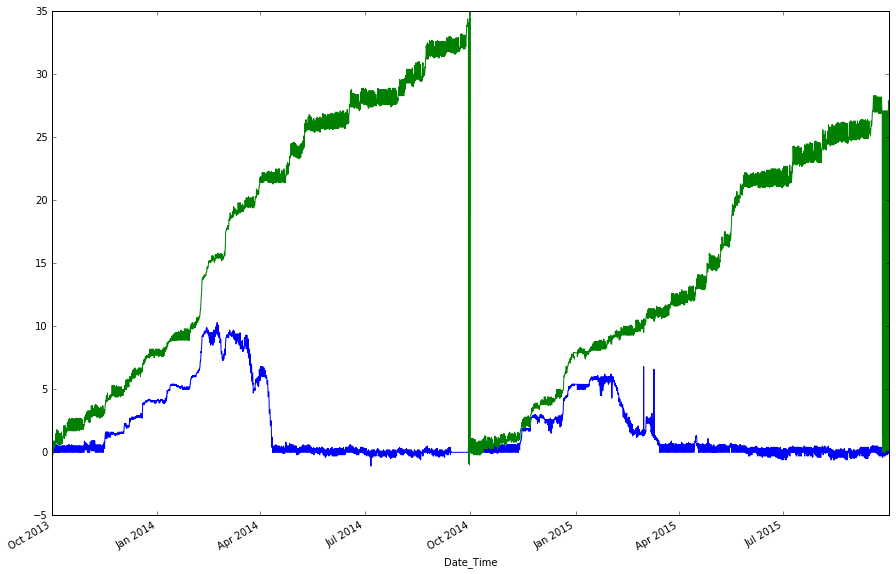

In [51]:
SNOTEL['WTEQ.I-1 (in) '].plot()
SNOTEL['PREC.I-1 (in) '].plot()

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\matplotlib\transforms.py:660: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


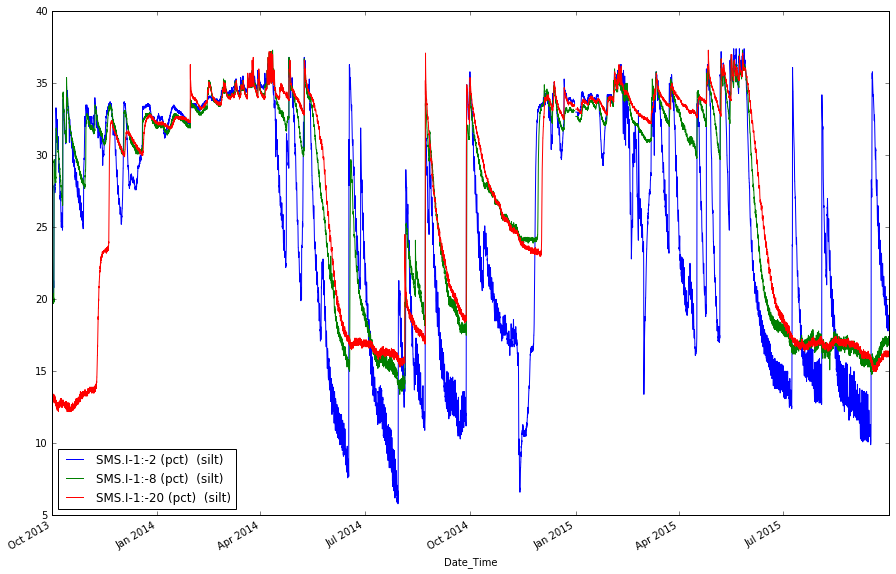

In [52]:
SNOTEL[[u'SMS.I-1:-2 (pct)  (silt)', u'SMS.I-1:-8 (pct)  (silt)', u'SMS.I-1:-20 (pct)  (silt)']].plot()

In [53]:
SNOTEL = SNOTEL.resample('1Min').mean()
SNOTEL = SNOTEL.interpolate(method='time', limit=90)
SNOTEL = SNOTEL.resample('15Min').mean()

### SNODAS

https://nsidc.org/data/g02158

In [54]:
SNODAS = pd.read_csv(SNODAS_Data, index_col=0, parse_dates=True)

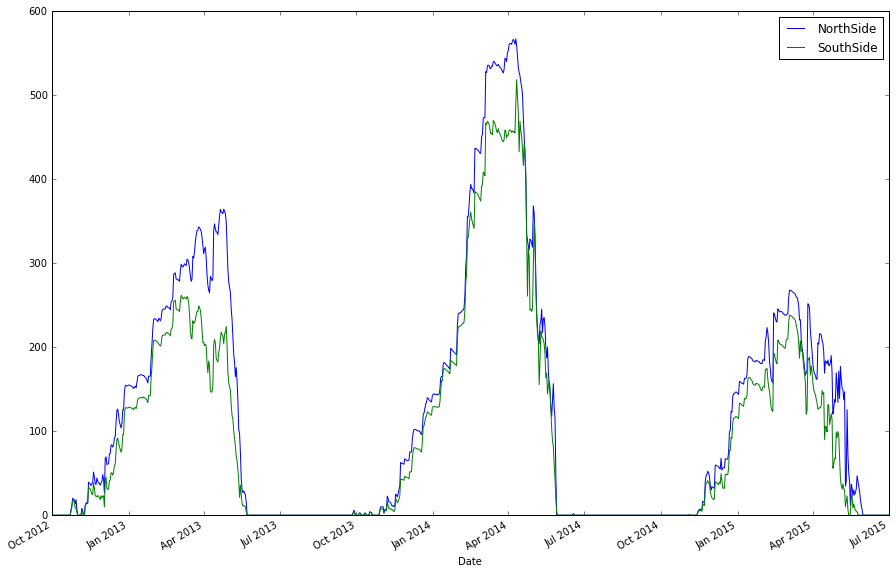

In [55]:
SNODAS[['NorthSide','SouthSide']].plot()
plt.savefig(rootlocal+'SNODAS.pdf')

In [56]:
SNODAS = SNODAS.resample('1Min').mean()
SNODAS = SNODAS.interpolate(method='time')
SNODAS = SNODAS.resample('15Min').mean()

### USU

Import hourly data downloaded from the Utah State University (USU) <a href=http://icewater.usu.edu/Data-Query>HydroServer</a>. These data include hourly barometric pressure, precipitation, and gage height measurements. The gage height measurements were recorded on the Little Bear River above and below the confluence of greater Davenport Creek. The path to the input file can be found in the [data sources](#Data-Sources) section.

In [57]:
USU_Avon_BP = pd.read_excel(USU_Data, 'Avon Barometric Pressure', index_col=0, 
                            na_values=['-9999',''], skiprows=0, parse_cols=[0,1])
USU_Avon_BP.columns = ['USU_Avon_BP_mmHg']

In [58]:
USU_SF_BP = pd.read_excel(USU_Data, 'South Fork Barometric Pressure', index_col=0,
                          na_values=['-9999',''], parse_cols=[0,1], skiprows=0)
USU_SF_BP.columns = ['USU_Avon_BP_mmHg']

In [59]:
USU_SF_PPT = pd.read_excel(USU_Data, 'South Fork Precipitation', index_col=0, 
                           na_values=['-9999',''], parse_cols=[0,1], skiprows=0)
USU_SF_PPT.columns = ['USU_SF_PPT_in']

In [60]:
USU_SF_AD = pd.read_excel(USU_Data, 'South Fork h Above Davenport', index_col=0, 
                          na_values=['-9999',''], parse_cols=[0,1], skiprows=0)
USU_SF_AD.columns = ['USU_SF_AD_h_ft']

In [61]:
USU_SF_BD = pd.read_excel(USU_Data, 'South Fork h Below Davenport', index_col=0, 
                          na_values=['-9999',''], parse_cols=1, skiprows=0)
USU_SF_BD.columns = ['USU_SF_BD_h_ft']

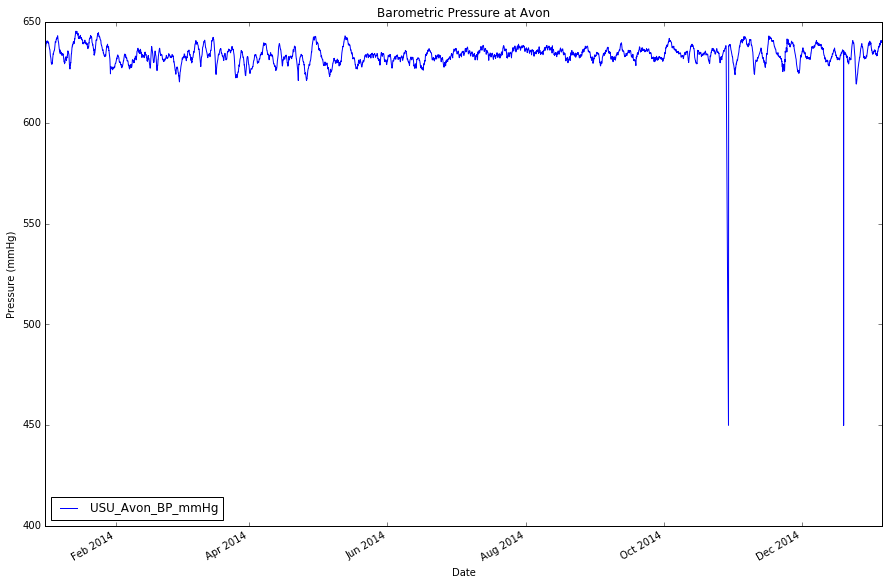

In [62]:
USU_Avon_BP.plot()
plt.title('Barometric Pressure at Avon')
plt.ylabel('Pressure (mmHg)')
plt.xlabel('Date')

In [63]:
USU_Avon_BP.columns

Index([u'USU_Avon_BP_mmHg'], dtype='object')

In [64]:
USU_Avon_BP = wt.smoother(USU_Avon_BP,'USU_Avon_BP_mmHg',100,4)

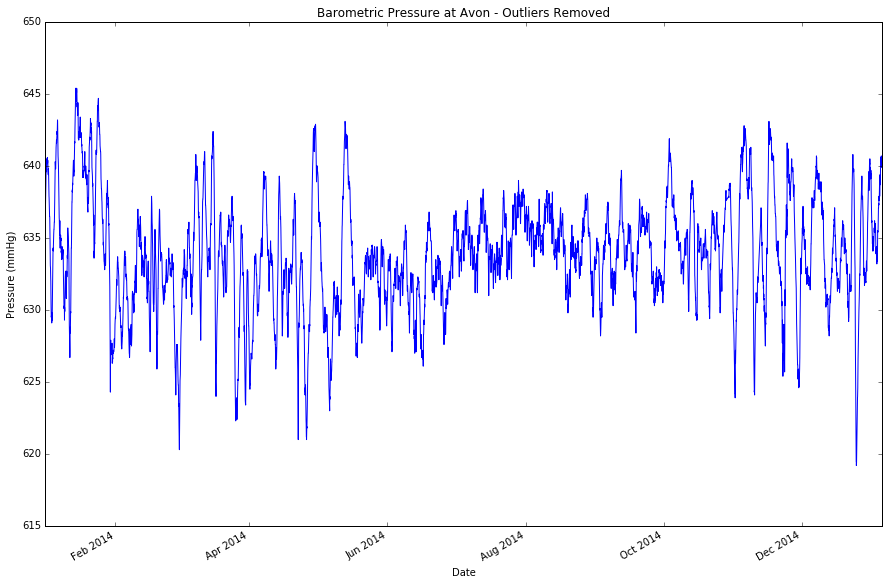

In [65]:
USU_Avon_BP['USU_Avon_BP_mmHg'].plot()
plt.title('Barometric Pressure at Avon - Outliers Removed')
plt.ylabel('Pressure (mmHg)')
plt.xlabel('Date')

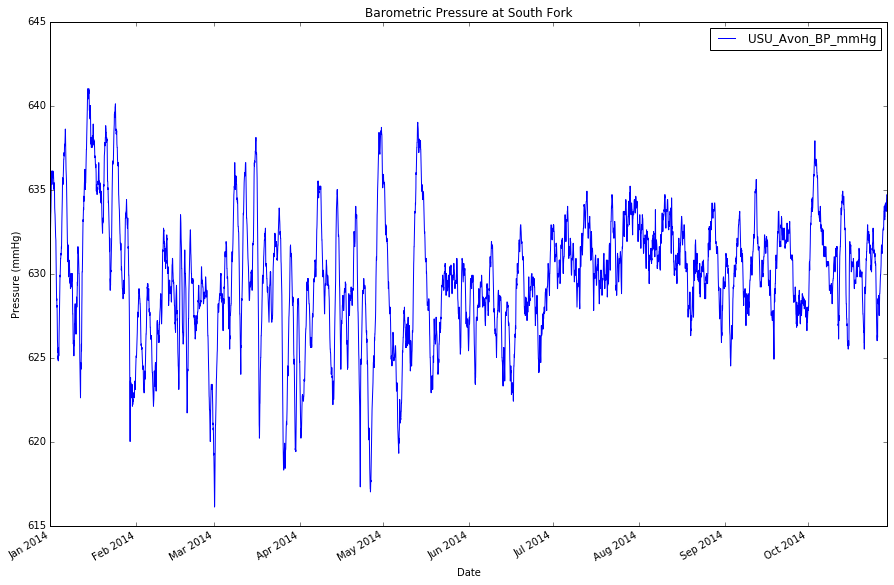

In [66]:
USU_SF_BP.plot()
plt.title('Barometric Pressure at South Fork')
plt.ylabel('Pressure (mmHg)')
plt.xlabel('Date')

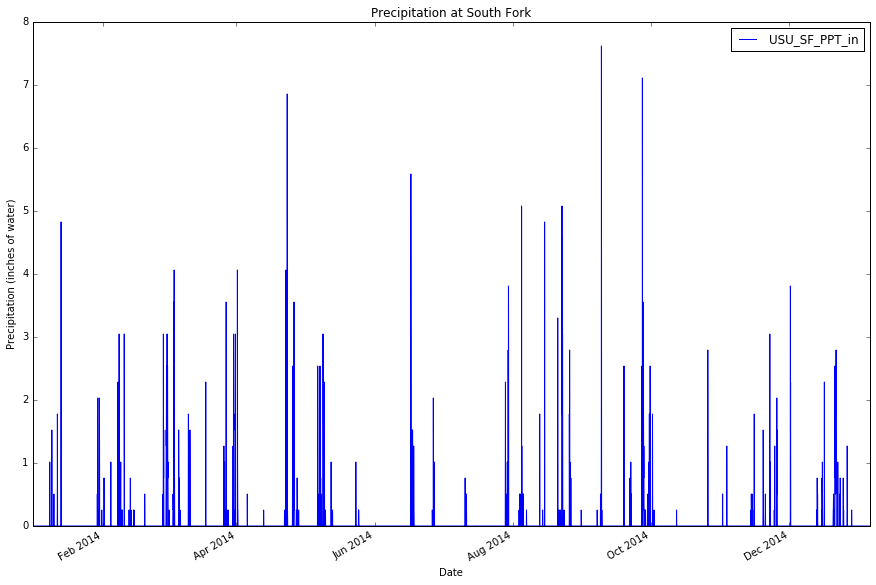

In [67]:
USU_SF_PPT.plot()
plt.title('Precipitation at South Fork')
plt.ylabel('Precipitation (inches of water)')
plt.xlabel('Date')

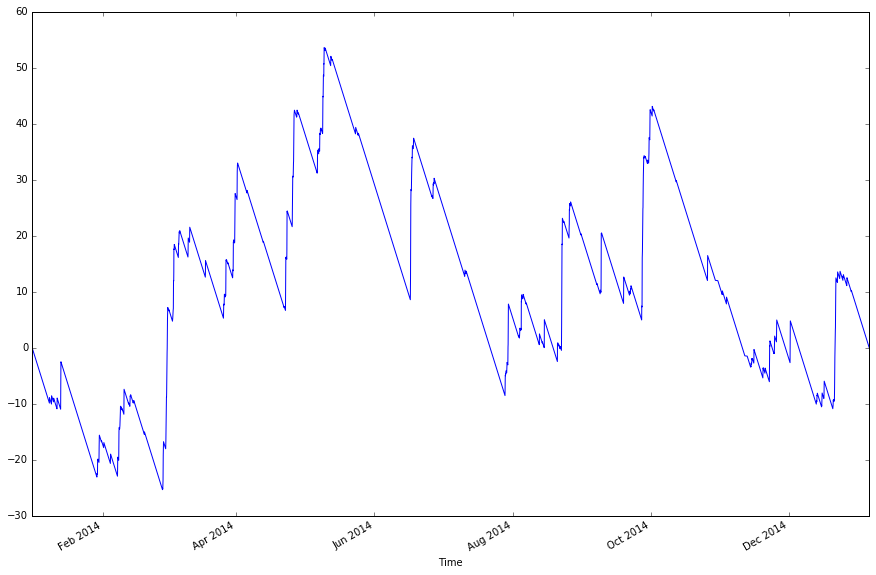

In [68]:
USU_SF_PPT['USU_PPT_CDM']=(USU_SF_PPT['USU_SF_PPT_in']-USU_SF_PPT['USU_SF_PPT_in'].mean()).cumsum()
USU_SF_PPT['USU_PPT_CDM'].plot()

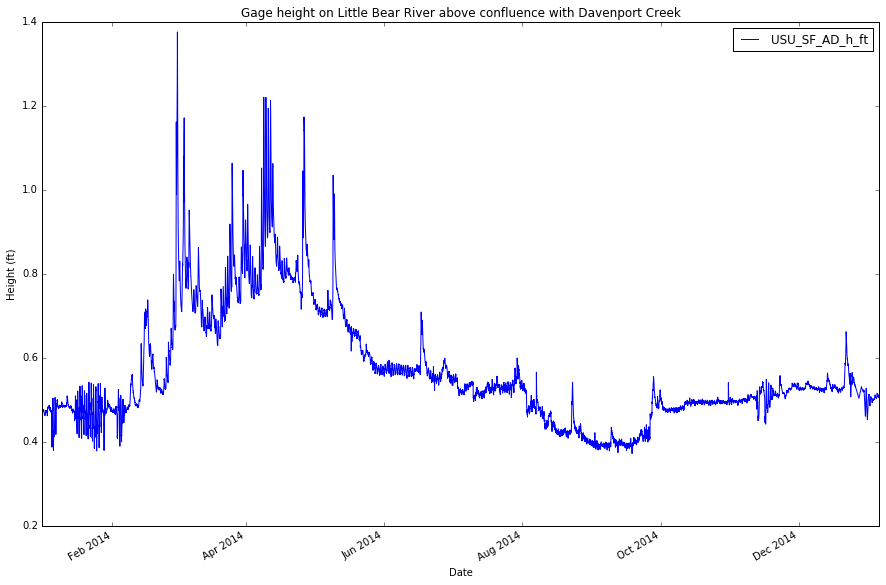

In [69]:
USU_SF_AD.plot()
plt.title('Gage height on Little Bear River above confluence with Davenport Creek')
plt.ylabel('Height (ft)')
plt.xlabel('Date')

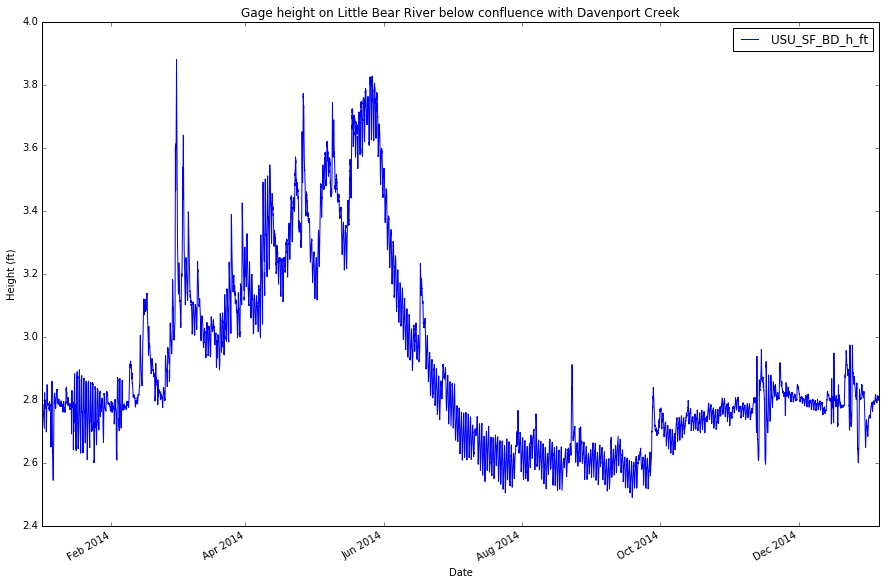

In [70]:
USU_SF_BD.plot()
plt.title('Gage height on Little Bear River below confluence with Davenport Creek')
plt.ylabel('Height (ft)')
plt.xlabel('Date')

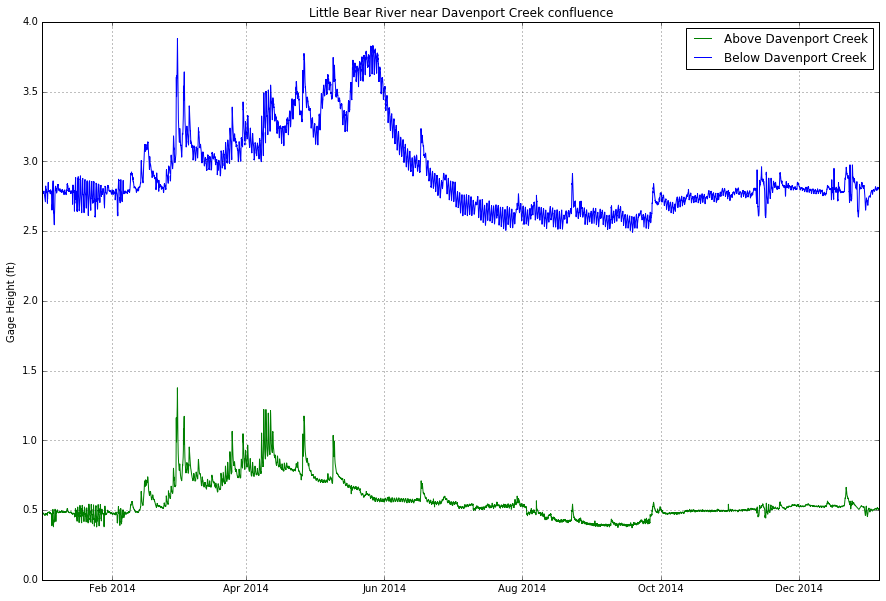

In [71]:
plt.figure()
x1 = USU_SF_AD.index.to_datetime()
y1 = USU_SF_AD['USU_SF_AD_h_ft']

x2 = USU_SF_BD.index.to_datetime()
y2 = USU_SF_BD['USU_SF_BD_h_ft']

plt.figure()
plt.title('Little Bear River near Davenport Creek confluence')
plt.plot(x1,y1,c='g', label='Above Davenport Creek')
plt.plot(x2,y2,c='b', label='Below Davenport Creek')
plt.ylabel('Gage Height (ft)') 
plt.legend(loc=0)
plt.grid()
plt.show()

In [72]:
# Combine imported worksheets into a single dataframe
USU = pd.merge(USU_Avon_BP, USU_SF_BP, left_index=True, right_index=True, how='outer')
USU = pd.merge(USU, USU_SF_PPT,  left_index=True, right_index=True, how='outer')
USU = pd.merge(USU, USU_SF_AD,  left_index=True, right_index=True, how='outer')
USU = pd.merge(USU, USU_SF_BD,  left_index=True, right_index=True, how='outer')

In [73]:
USU = USU.resample('1Min').mean()
USU = USU.interpolate(method='time', limit=90)
USU = USU.resample('15Min').mean()

In [74]:
del(USU_Avon_BP, USU_SF_PPT, USU_SF_AD, USU_SF_BD)

In [75]:
#USU = USU.drop(['dpUSU_Avon_BP_mmHg', 'maUSU_Avon_BP_mmHg', 'mstUSU_Avon_BP_mmHg'], axis=1)
list(USU.columns.values)

['USU_Avon_BP_mmHg_x',
 'USU_Avon_BP_mmHg_y',
 'USU_SF_PPT_in',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'USU_SF_BD_h_ft']

In [76]:
USUSNOTEL = pd.merge(USU,SNOTEL, left_index=True, right_index=True, how='outer')
Climate = pd.merge(USUSNOTEL, SNODAS, left_index=True, right_index=True, how='outer')

In [ ]:
#del (USU,SNOTEL)

## Upper Lefty's Spring

### Importing and Converting Upper Lefty's Spring Data

[To top of page](#top)

This weir was installed by the Powder Mountain Water and Sewer District. The weir has the longest record of monitoring for any of the non-developed sites in the study area. The weir is directly downstream of where the main Lefty's springhead emerges, so contribution from overland flow is negligible. This weir has notable seepage and underflow, and is not as "sharp-crested" as a calibrated steel weir, as it is constructed out of plywood and some type of advertisement board.

Import the transducer data collected by Loughlin Water at Upper Lefty's Spring weir. These data are nonvented and provide values of absolute head, so barometric pressure must be subtracted to determine the water head above the transducer. These data extend from 7/25/2014 12:15 to 12/16/2014 17:45.

Import the manual measurements collected at the weir. Import the depth of water at the v. Add the average difference measured between the v-depth and the actual depth (h), which is 0.16 inches. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=leftysman></a>

In [77]:
UL_manual = pd.read_excel(Upper_Leftys_Manual, 'Leftys', index_col=0, skiprows=1,
                          parse_cols=[0,1,2,3])
UL_manual.columns = ['UL_vdepth_in', 'UL_depth_in', 'UL_bucket_Q_gpm']
UL_manual['UL_vdepth_ft'] = UL_manual['UL_vdepth_in']/12
UL_manual['UL_vdepth_cm'] = UL_manual['UL_vdepth_in']*2.54
UL_manual = UL_manual.sort_index()
UL_manual = UL_manual[UL_manual.index.to_datetime()>pd.datetime(2014,7,25)]

The path to the input file can be found in the [data sources](#Data-Sources) section.<a id='leftys'></a>

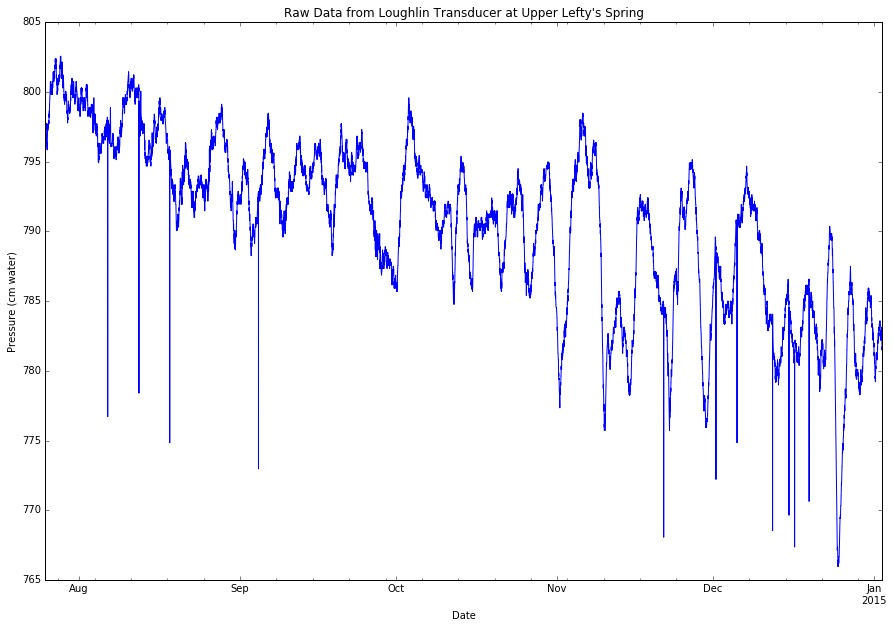

In [78]:
UL_LW = pd.read_csv(Upper_Leftys_Loughlin,
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, 
                    names=['dt','UL_LW_p_cm','UL_LW_t_C'], engine='python')
UL_LW['UL_LW_p_cm'].plot()

plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Raw Data from Loughlin Transducer at Upper Lefty\'s Spring')

Import and convert the more recent data

In [79]:
UL_LW2WL = pd.read_excel(Upper_Leftys_Loughlin_2, 'Lefty Spring WL DATA', index_col=0, skiprows=51, parse_cols=2,
                        names=['UL_LW_p_cm','UL_LW_t_C'])
UL_LW2BP = pd.read_excel(Upper_Leftys_Loughlin_2, 'Lefty Barometer DATA', index_col=0, skiprows=51, parse_cols=2,
                        names=['UL_BP_LW_p_cm','UL_BP_LW_t_C'])

In [80]:
#UL_LW = pd.concat([UL_LW2WL,UL_LW])

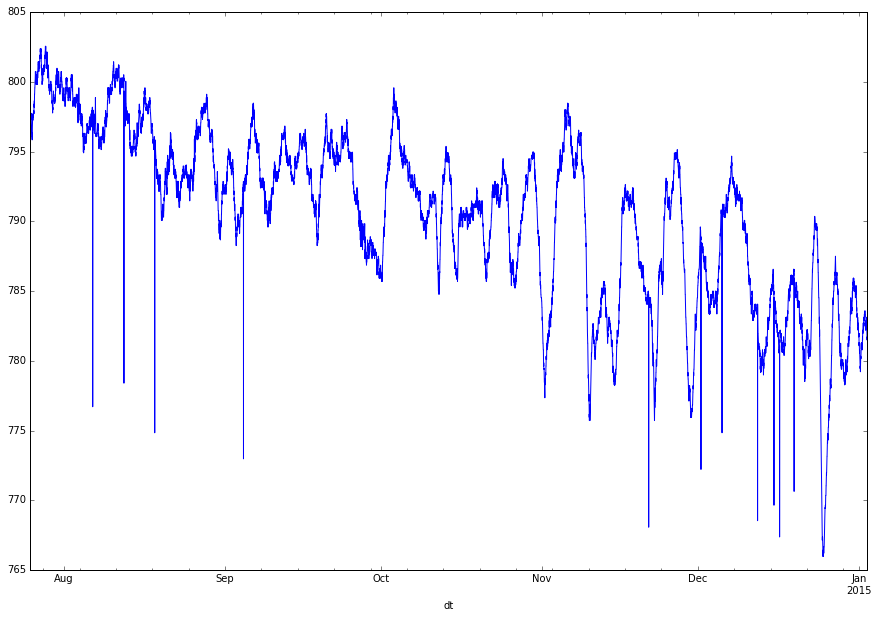

In [81]:
UL_LW['UL_LW_p_cm'].plot()

In [82]:
cm_ft = 30.48 #conversion from cm to ft
adjst = 0.22 # adjustment factor

UL_LW2BP[u'UL_BP_LW_p_ft'] = UL_LW2BP['UL_BP_LW_p_cm']/(cm_ft)
UL_LW2WL[u'UL_LW_p_ft'] = UL_LW2WL['UL_LW_p_cm']/(cm_ft)
UL_LW2 = pd.merge(UL_LW2WL, UL_LW2BP, left_index=True, right_index=True, how='left')
UL_LW2['UL_LW_h_ft'] = UL_LW2[u'UL_LW_p_ft'] - UL_LW2[u'UL_BP_LW_p_ft'] - 0.22
UL_LW2['UL_LW_Q_gpm'] = 1094.4*UL_LW2['UL_LW_h_ft']**2.5
UL_LW2['UL_LW_Q_lpm'] = 3.78541*UL_LW2['UL_LW_Q_gpm']

Remove obvious outliers created when the transducer was not in the water.

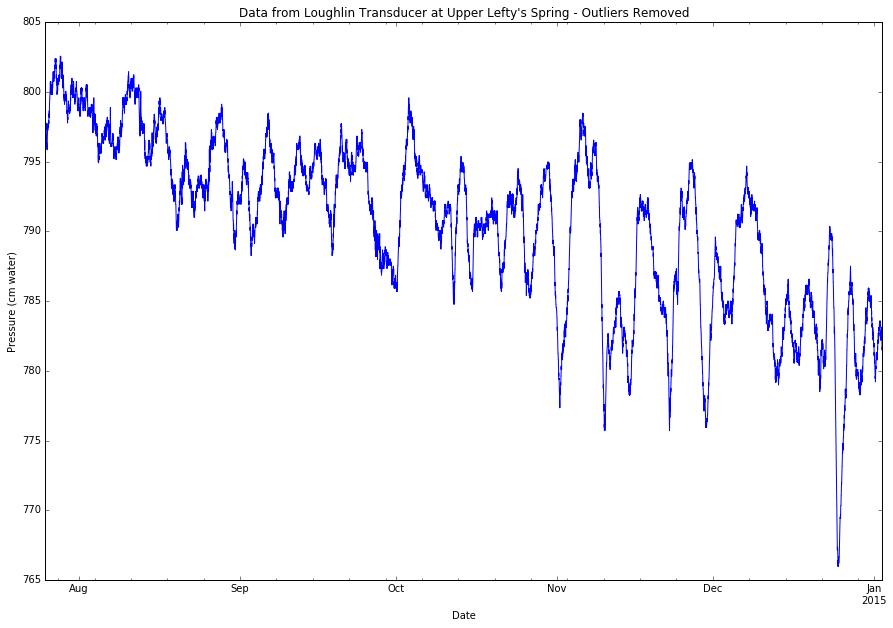

In [83]:
UL_LW = wt.smoother(UL_LW, 'UL_LW_p_cm', 50, 3)
UL_LW['UL_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Data from Loughlin Transducer at Upper Lefty\'s Spring - Outliers Removed')

Import the barometric pressure observations collected by Loughlin Water. The path to the input file can be found in the [data sources](#Data-Sources) section. <a id=leftysbp></a>

In [84]:
UL_BP_LW = pd.read_csv(Upper_Leftys_Barometer_Loughlin, index_col=0, skiprows=52, 
                       skipfooter=1, parse_dates=True, engine='python')
UL_BP_LW.columns = ['UL_BP_LW_p_cm','UL_BP_LW_t_C']
#UL_BP_LW = pd.concat([UL_BP_LW, UL_LW2BP])

Plot the barometric pressure and the nonvented transducer data to make sure they match.

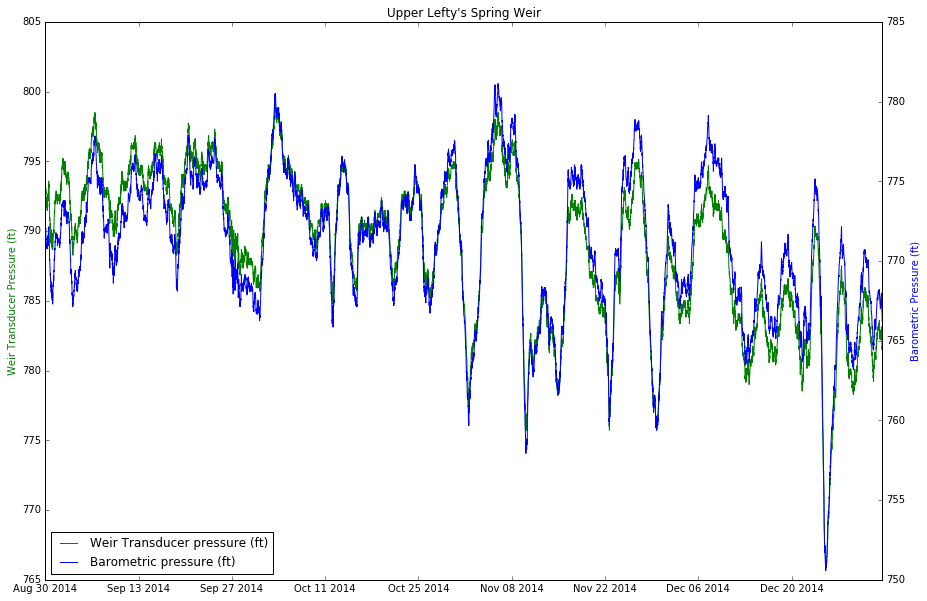

In [85]:
plt.figure()
x1 = UL_LW.index.to_datetime()
y1 = UL_LW['UL_LW_p_cm']

x2 = UL_BP_LW.index.to_datetime()
y2 = UL_BP_LW['UL_BP_LW_p_cm']

fig, ax1 = plt.subplots()
plt.title('Upper Lefty\'s Spring Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='g',label='Weir Transducer pressure (ft)')
ax1.set_xlim(left='8/30/2014',right=x1[-1])
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='g') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

Import the vented transducer data collected by Miranda Menzies and provided by John Files. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=leftysfiles></a>

(735551.6327430556, 735599.4660763888)

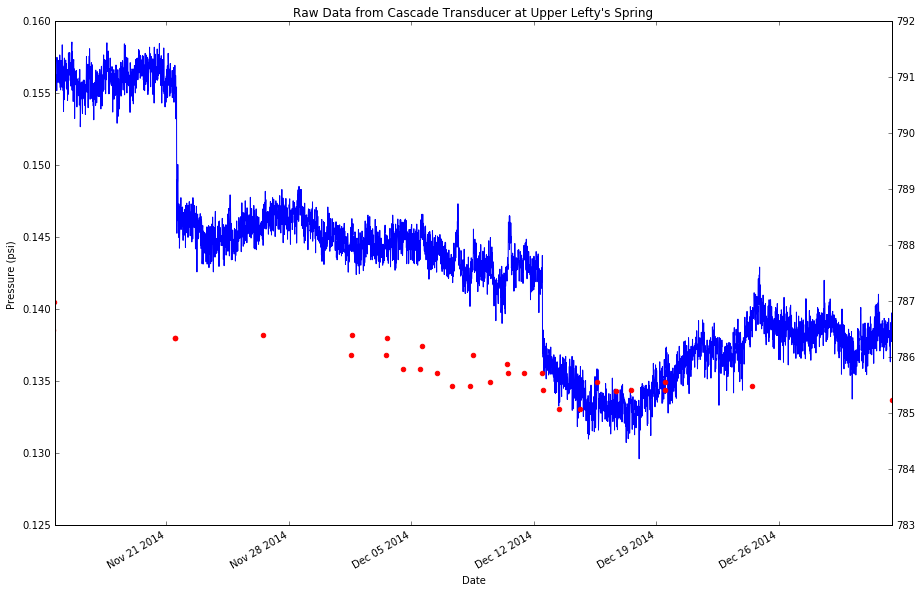

In [86]:
UL_JF = pd.read_csv(Upper_Leftys_John_Files, 
                     index_col=0, skiprows=91, skipfooter=1, usecols=[0,2,3], parse_dates=True, 
                     names=['dt','UL_JF_p_PSI','UL_JF_t_C'], engine='python')
#first 14 values are out of water
UL_JF = UL_JF[14:]
UL_JF['UL_JF_p_PSI'].plot()

plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Raw Data from Cascade Transducer at Upper Lefty\'s Spring')

plt.twinx()
x = UL_manual.index.to_datetime()
y = UL_manual.UL_vdepth_cm + 780
plt.scatter(x,y, color='red')
plt.xlim(UL_JF.index.min(), UL_JF.index.max())

In [87]:
def manualset(wellbaro, meas, manualfile, manmeas, outcolname = 'corr_wl'):
    '''
    INPUT
    -----
    wellbaro = Pandas DataFrame containing aligned Barometric and Level data
    meas = name of column in wellbaro dataframe that contains transducer water level data
    
    manualfile = Pandas DataFrame containing manual measurements
    manmeas = name of column in manualfile dataframe that contains manual measurements
    
    outcolname = name of output column for corrected data
    
    manual and transducer water level measurements should be in the same units
    
    RETURNS
    -------
    dataframe with outcolname field
    '''
    breakpoints = []
    bracketedwls = {}
    dtnm = wellbaro.index.name
    manualfile['julian'] = manualfile.index.to_julian_date() 

    for i in range(len(manualfile)):
        breakpoints.append(wt.fcl(wellbaro, manualfile.index.to_datetime()[i]).name)
    breakpoints = sorted(list(set(breakpoints)))

    for i in range(len(breakpoints)-1):
        # Break up pandas dataframe time series into pieces based on timing of manual measurements
        bracketedwls[i] = wellbaro.loc[(wellbaro.index.to_datetime() > breakpoints[i])&(wellbaro.index.to_datetime() < breakpoints[i+1])]
        if len(bracketedwls[i]) > 0:
            bracketedwls[i].loc[:,'julian'] = bracketedwls[i].index.to_julian_date()
    
            last_man = wt.fcl(manualfile,breakpoints[i+1])
            first_man = wt.fcl(manualfile,breakpoints[i])
            b = first_man[manmeas] - bracketedwls[i].ix[0, meas]
            m = (last_man[manmeas] - first_man[manmeas])/(last_man['julian'] - first_man['julian'])
            bracketedwls[i].loc[:,'datechange'] = bracketedwls[i].ix[:,'julian'] - bracketedwls[i].ix[0,'julian']
            bracketedwls[i].loc[:,'wldiff'] = bracketedwls[i].loc[:,meas]-bracketedwls[i].ix[0,meas]
            bracketedwls[i].loc[:,outcolname] = bracketedwls[i][['datechange',meas]].apply(lambda x: x[1]+(m*x[0]+b), 1)
        else:
            pass
    wellbarofixed = pd.concat(bracketedwls)
    wellbarofixed.reset_index(inplace=True)
    wellbarofixed.set_index(dtnm ,inplace=True)

    return wellbarofixed

In [88]:
UL_JF['UL_JF_p_ft'] = UL_JF['UL_JF_p_PSI']*2.307

In [89]:
man = UL_manual['UL_vdepth_ft'].to_frame()

In [90]:
UL_JF1 = wt.jumpfix(UL_JF,'UL_JF_p_PSI',0.005)

                     UL_JF_p_PSI  UL_JF_t_C  UL_JF_p_ft  deltaUL_JF_p_PSI  \
dt                                                                          
2014-11-21 14:11:09     0.145681   6.295593    0.336086         -0.009745   
2014-12-12 11:56:09     0.137371   6.258392    0.316915         -0.006363   

                        cumul  
dt                             
2014-11-21 14:11:09 -0.009745  
2014-12-12 11:56:09 -0.016108  


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\pandas\core\generic.py:5116: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication-0.2.13-py2.7.egg\wellapplication\transport.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The data have two tears in them, due to adjustments of the transducer locations over time. To accomodate, we search for these tears and use a for statement to remove them.

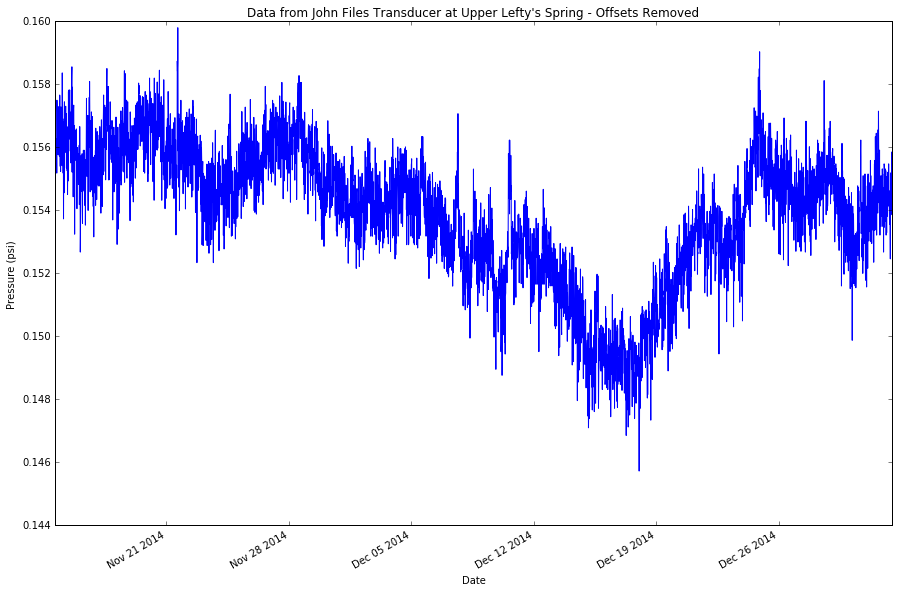

In [91]:
UL_JF1['UL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Data from John Files Transducer at Upper Lefty\'s Spring - Offsets Removed')

These data were collected every 15 minutes, but at odd times that do not align with the Loughlin data, so they have to be resampled and interpolated so that times are consistent and proper comparisons can be made.

In [92]:
UL_JF = UL_JF.resample('1Min').mean()
UL_JF = UL_JF.interpolate(method='time', limit=90)
UL_JF = UL_JF.resample('15Min').mean()

Merge the datasets to ease calculation, comparison, and visualization.

In [93]:
Leftys = pd.merge(UL_LW, UL_JF, left_index=True, right_index=True, how='outer')
Leftys = pd.merge(Leftys, UL_BP_LW, left_index=True, right_index=True, how='outer')

#Leftys = Leftys[pd.datetime(2014,7,25,12,15):pd.datetime(2014,12,16,17,45)]

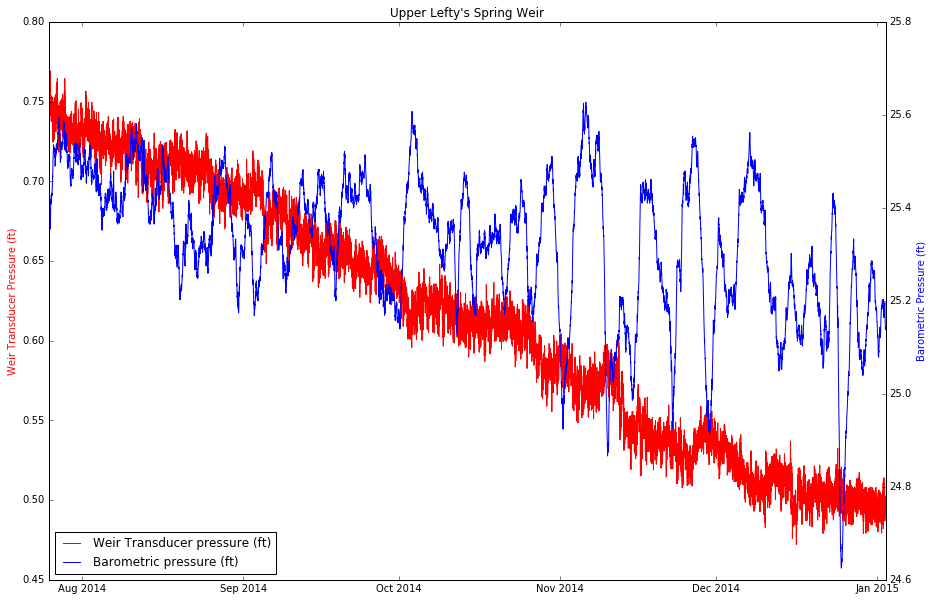

In [94]:
Leftys['UL_LW_p_ft'] =  (Leftys['UL_LW_p_cm'] - Leftys['UL_BP_LW_p_cm'])*0.0328084
Leftys['UL_BP_LW_p_ft'] = Leftys['UL_BP_LW_p_cm']*0.0328084

x = Leftys.index.to_datetime()
y1 = Leftys['UL_LW_p_ft']
y2 = Leftys['UL_BP_LW_p_ft']

fig, ax1 = plt.subplots()
plt.title('Upper Lefty\'s Spring Weir')
ax2 = ax1.twinx()
ax1.plot(x,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

We perform a moving average difference between the manual measurements and the transducer measurements to determine the calibration offset.  This is the difference in height from the transducer measure point and the bottom of the weir orifice.

In [95]:
meanDiff = rollmeandiff(UL_manual,'UL_vdepth_ft',Leftys,'UL_LW_p_ft',5)
print meanDiff
Leftys['UL_LW_h_ft'] = Leftys['UL_LW_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


-0.366


We repeat the average difference for the John Files data. First the units of PSI must be converted to feet of water.

In [96]:
Leftys['UL_JF_p_ft'] =  Leftys['UL_JF_p_PSI']*2.307
meanDiff = rollmeandiff(UL_manual,'UL_vdepth_ft',Leftys,'UL_JF_p_ft',5)
print meanDiff
Leftys['UL_JF_h_ft'] = Leftys['UL_JF_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


-0.163


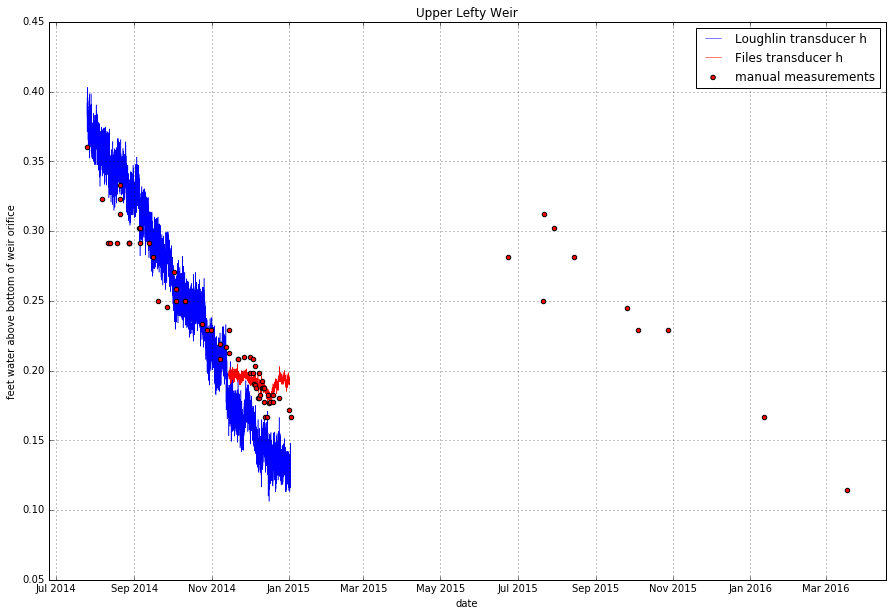

In [97]:
plt.figure()

x = Leftys.index.to_datetime()
y = Leftys['UL_LW_h_ft']

x1 = UL_manual.index.to_datetime()
y1 = UL_manual['UL_vdepth_ft']

y2 = Leftys['UL_JF_h_ft']

plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer h')
plt.plot(x, y2, zorder=2, c='red', linewidth=0.5, label='Files transducer h')
plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
plt.title('Upper Lefty Weir')
plt.ylabel('feet water above bottom of weir orifice')
plt.xlabel('date')
plt.grid()
plt.legend(scatterpoints=1)

In [98]:
#LWLeftysAdj = manualset(Leftys,'UL_LW_h_ft',UL_manual,'UL_vdepth_ft', 'UL_LW_adj_h_ft')


In [99]:
#JFLeftysAdj = manualset(Leftys, 'UL_JF_h_ft', UL_manual, 'UL_vdepth_ft', 'UL_JF_adj_h_ft')

In [100]:
#LeftysAdj = pd.merge(LWLeftysAdj, JFLeftysAdj, left_index=True, right_index=True, how='outer')
#Leftys = pd.merge(Leftys, LeftysAdj, left_index=True, right_index=True, how='left')

In [101]:
#x = LWLeftysAdj.index.to_datetime()
#y = LWLeftysAdj['corr_wl']

#x1 = UL_manual.index.to_datetime()
#y1 = UL_manual['UL_vdepth_ft']

#x2 = JFLeftysAdj.index.to_datetime()
#y2 = JFLeftysAdj['UL_JF_adj_h_ft']

#plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer h')
#plt.plot(x2, y2, zorder=2, c='red', linewidth=0.5, label='Files transducer h')
#plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
#plt.title('Upper Lefty Weir')
#plt.ylabel('feet water above bottom of weir orifice')
#plt.xlabel('date')
#plt.grid()
#plt.legend(scatterpoints=1)

In [102]:
UL_manual.columns

Index([u'UL_vdepth_in', u'UL_depth_in', u'UL_bucket_Q_gpm', u'UL_vdepth_ft',
       u'UL_vdepth_cm'],
      dtype='object')

Once the transducer data were aligned with manual readings, we converted the height of water above the bottom of the weir orifice to discharge in both gpm and cfs.

To do this, we used equations from: U.S. Bureau of Reclamation, 2001, Water Measurement Manual - A water resources technical publication: online, http://www.usbr.gov/pmts/hydraulics_lab/pubs/wmm/.

For 90$^\circ$ v-notch weirs, the equation to calculate discharge from h is:
$$
Q= 1122\cdot h^{\frac{5}{2}}
$$
<ul>
  <li>h = feet above bottom of weir orifice</li>
  <li>Q = discharge in gpm</li>
</ul>

In [103]:
Leftys['UL_LW_Q_gpm'] = 1122*Leftys['UL_LW_h_ft']**(2.5)
meanDiff = rollmeandiff(UL_manual,'UL_bucket_Q_gpm',Leftys,'UL_LW_Q_gpm',5)
print meanDiff
Leftys['UL_LW_Q_gpm'] = Leftys['UL_LW_Q_gpm'] + meanDiff
Leftys['UL_LW_Q_cfs'] = 0.00222800926*Leftys['UL_LW_Q_gpm']

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


16.189


In [104]:
Leftys['UL_JF_Q_gpm'] = 1122*Leftys['UL_JF_h_ft']**(2.5)
meanDiff = rollmeandiff(UL_manual,'UL_bucket_Q_gpm',Leftys,'UL_JF_Q_gpm',5)
print meanDiff
Leftys['UL_JF_Q_gpm'] = Leftys['UL_JF_Q_gpm'] + meanDiff
Leftys['UL_JF_Q_cfs'] = 0.00222800926*Leftys['UL_JF_Q_gpm']

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


17.208


In [105]:
def recession(df, Q, st, end=[datetime.now().year,datetime.now().month, datetime.now().day], unit='gpm', excs=[0,0,0], excf=[0,0,0]):
    '''
    Creates recession curve and modeled output to describe spring and streamflow recession.
    
    INPUT
    -----
    df = dataframe with spring discharge data
    Q = string indicating discharge field in df in units of gpm
    st = start date to examine data in [YYYY, MM, DD] format, where values are integers in an array
    end = end date to examine data
    unit = preferred units to use in analysis; defaults to gpm; can convert to lpm
    excs = begin date of exclusion period
    excf = end date of exclusion period
    
    OUTPUT
    ------
    popt = alpha value for recession curve
    x1 = days from start of recession
    x2 = dates of recession curve analysis
    y1 = points used for recession curve analysis
    y2 = recession curve values
    Plot of recession curve
    
    '''
    from datetime import timedelta
    def fitit(x,y,Q):
        from scipy.optimize import curve_fit
        def func(x, c):
            return Q*np.exp(-1*c*x)

        popt, pcov = curve_fit(func, x, y, p0=(1e-1))#, bounds = [0,40000], method='trf')
        return popt, pcov
    
    if len(st) == 3 and len(end) == 3:
        df1 = df[(df.index >= pd.datetime(st[0],st[1],st[2]))&(df.index <= pd.datetime(end[0],end[1],end[2]))]
    else:
        df1 = df[(df.index >= pd.datetime(st[0],st[1],st[2],st[3],st[4]))&(df.index <= pd.datetime(end[0],end[1],end[2],st[3],st[4]))]

    
    if excs[0]==0:
        pass
    else:
        if len(excs)==3:
            df1 = df1[(df1.index < pd.datetime(excs[0],excs[1],excs[2]))|(df1.index > pd.datetime(excf[0],excf[1],excf[2]))]
        else:
            df1 =  df1[(df1.index < pd.datetime(excs[0],excs[1],excs[2],excs[3],excs[4]))|(df1.index > pd.datetime(excf[0],excf[1],excf[2],excf[3],excf[4]))]

    
    
    if unit=='lpm':
        df1[Q+'lpm'] = 3.78541*df1[Q]
        df1[Q] = df1[Q+'lpm'] 
        Qlab='Discharge (lpm)'
    else:
        Qlab = 'Discharge (gpm)'
    
    df2 = df1.dropna(subset=[Q])
    
    y1 = df2[Q]
    x1 = (df2.index.to_julian_date() - df2.index.to_julian_date()[0])#.days
    popt1,pcov1 = fitit(x1, y1, y1[0])
    x2 = [df2.index[0] + timedelta(i) for i in x1]
    y2 = [y1[0]*np.exp(-1*popt1[0]*i) for i in x1]

    return popt1,x1,x2,y1,y2

Plot the resulting discharge values and the manual discharge measurements to see how they compare. 

0.546420256589
0.380427494236
0.563257237278


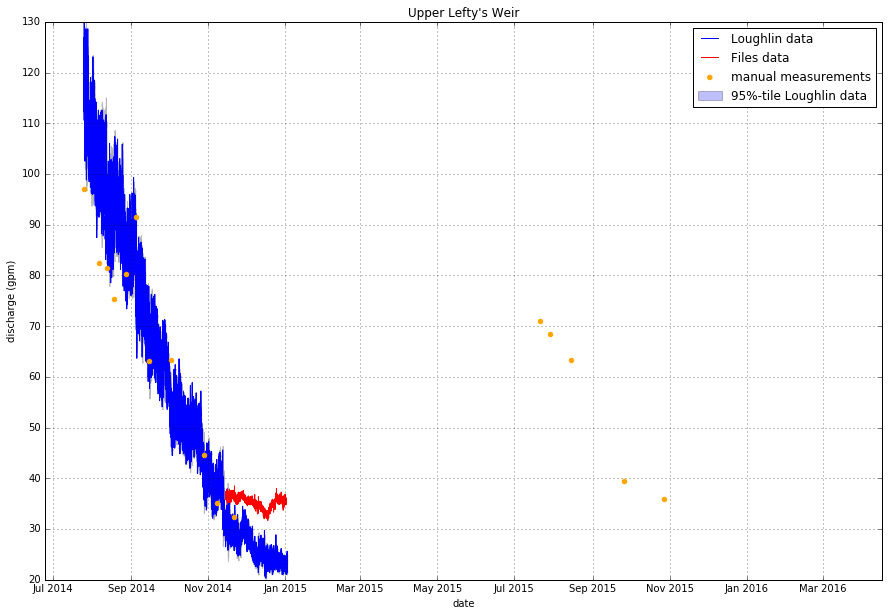

In [106]:
Leftys = Leftys[Leftys.index > pd.datetime(2014,7,20)]

rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')

plt.figure()
x = Leftys.index.to_datetime()
y1 = Leftys['UL_LW_Q_gpm']
y2 = Leftys['UL_JF_Q_gpm']
x3 = UL_manual.index.to_datetime()
y3 = UL_manual['UL_bucket_Q_gpm']

print y1.corr(y2, method='pearson')
print y1.corr(y2, method='kendall')
print y1.corr(y2, method='spearman')

y4 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).mean()
y6 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).std()
y9 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).quantile(0.95)
y10 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).quantile(0.05)
y7 = y4+y6*2
y8 = y4-y6*2

Jy4 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).mean()
Jy6 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).std()
Jy9 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).quantile(0.95)
Jy10 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).quantile(0.05)
Jy7 = Jy4+Jy6*2
Jy8 = Jy4-Jy6*2


plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='Files data')
plt.scatter(x3,y3, color='orange', zorder=3, label='manual measurements' )
plt.fill_between(x, y8, y7, alpha=0.25, zorder=1, label= '95%-tile Loughlin data')
plt.title('Upper Lefty\'s Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
plt.yticks(np.arange(0, 140.0, 10))
plt.ylim(20.0, 130.0)
plt.legend( scatterpoints=1)

### Upper Lefty's Recession Analysis

Conduct Recession Analysis with non-test data

In [107]:
Leftys[Leftys.index>pd.datetime(2014,11,14,15,0)]['UL_JF_Q_gpm']

2014-11-14 15:15:00    36.528508
2014-11-14 15:30:00    36.666891
2014-11-14 15:45:00    36.445599
2014-11-14 16:00:00    36.469291
2014-11-14 16:15:00    36.608766
2014-11-14 16:30:00    36.645672
2014-11-14 16:45:00    36.444432
2014-11-14 17:00:00    36.538051
2014-11-14 17:15:00    36.504154
2014-11-14 17:30:00    36.205245
2014-11-14 17:45:00    36.966010
2014-11-14 18:00:00    37.195855
2014-11-14 18:15:00    36.747986
2014-11-14 18:30:00    36.464262
2014-11-14 18:45:00    36.953070
2014-11-14 19:00:00    36.930962
2014-11-14 19:15:00    36.963946
2014-11-14 19:30:00    36.619157
2014-11-14 19:45:00    36.970811
2014-11-14 20:00:00    36.638398
2014-11-14 20:15:00    36.609008
2014-11-14 20:30:00    37.058904
2014-11-14 20:45:00    36.795378
2014-11-14 21:00:00    36.434654
2014-11-14 21:15:00    36.542503
2014-11-14 21:30:00    37.201175
2014-11-14 21:45:00    37.409767
2014-11-14 22:00:00    36.698556
2014-11-14 22:15:00    36.248366
2014-11-14 22:30:00    36.432593
          

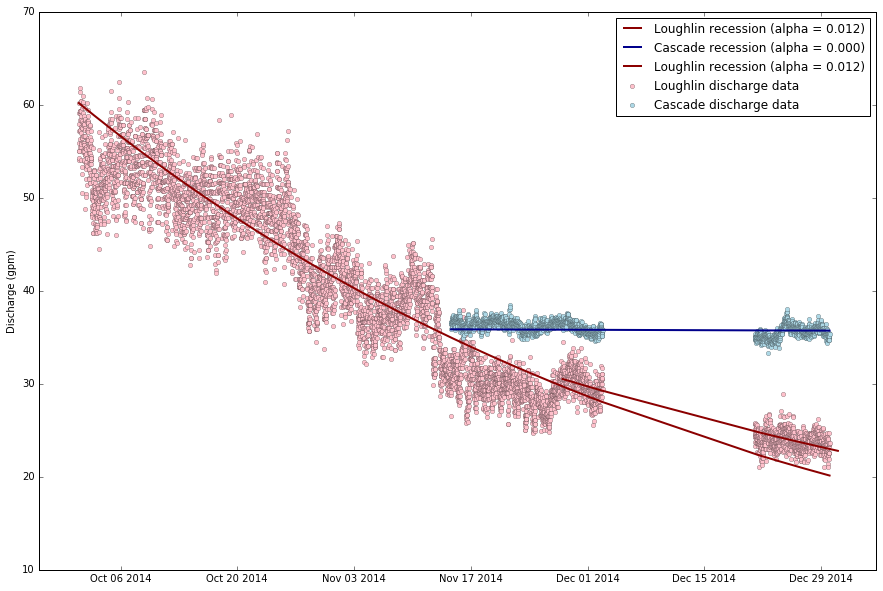

In [108]:
lalph, x1, x2, y1, y2 = recession(Leftys, 'UL_LW_Q_gpm', [2014,10,1],[2014,12,30],'gpm',[2014,12,2,19,0],[2014,12,21,0,0])
jalph, jx1, jx2, jy1, jy2 = recession(Leftys, 'UL_JF_Q_gpm', [2014,10,1],[2014,12,30],'gpm',[2014,12,2,19,0],[2014,12,21,0,0])

plt.figure()
plt.plot(x2,y2,color='darkred', lw=2, label='Loughlin recession (alpha = %.3f)'%lalph)
plt.scatter(x2,y1,color='pink',edgecolor='black',lw=0.2, label='Loughlin discharge data')
plt.plot(jx2,jy2,color='darkblue', lw=2, label='Cascade recession (alpha = %.3f)'%jalph)
plt.scatter(jx2,jy1,color='lightblue',edgecolor='black',lw=0.2, label='Cascade discharge data')

poptc, x1c, x2c, y1c, y2c = recession(Leftys, 'UL_LW_Q_gpm', [2014,11,28],[2014,12,31],'gpm',[2014,12,2,19,0],[2014,12,21,0,0])
plt.plot(x2c,y2c,color='darkred', lw=2, label='Loughlin recession (alpha = %.3f)'%lalph)

plt.legend(scatterpoints=1)
plt.ylabel('Discharge (gpm)')

(array([ 0.00957529]), array([ 0.00904892]))
Average Loughlin moving window (2-day) standard deviation = 2.53108977099
Average Cascade moving window (2-day) standard deviation = 0.366222946772


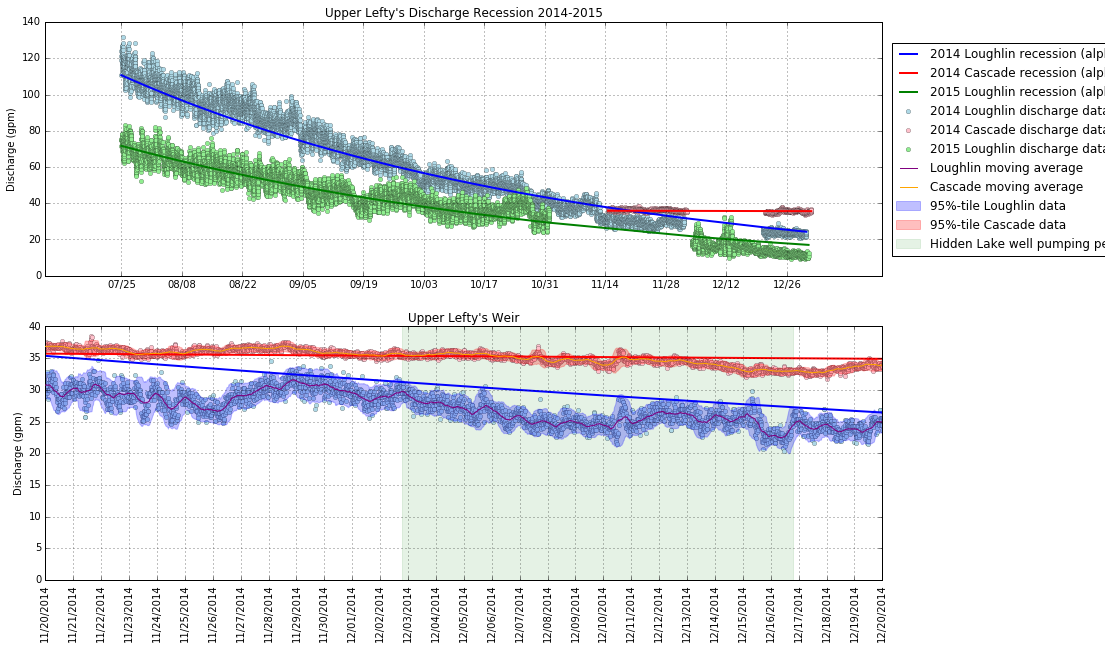

In [110]:
from datetime import timedelta
popt, x1, x2, y1, y2 = recession(Leftys, 'UL_LW_Q_gpm', [2014,7,25],[2014,12,31],
                                 'gpm',[2014,12,2,19,0],[2014,12,21,0,0])
poptb, x1b, x2b, y1b, y2b = recession(UL_LW2, 'UL_LW_Q_gpm', [2015,7,25],[2015,12,31],
                                     'gpm',[2015,11,1],[2015,12,4])
poptc, x1c, x2c, y1c, y2c = recession(Leftys, 'UL_JF_Q_gpm', [2014,11,14,15,0],[2014,12,31,0,0],
                                      'gpm',[2014,12,2,19,0],[2014,12,21,0,0])
print(popt,poptb)
x3 = [pd.datetime(2014,7,25) + timedelta(i) for i in x1]
x4 = [pd.datetime(2014,7,25) + timedelta(i) for i in x1b]
x5 = [pd.datetime(2014,11,14,15,0) + timedelta(i) for i in x1c]
#x6 = [pd.datetime(2014,12,18) + timedelta(i) for i in x1d]

f, ax = plt.subplots(2)

ax[0].scatter(x3,y1, label = '2014 Loughlin discharge data', edgecolor='black', lw=0.2, color='lightblue')
ax[0].scatter(x5,y1c, label = '2014 Cascade discharge data', edgecolor='black', lw=0.2, color='pink')
ax[0].scatter(x4,y1b, label = '2015 Loughlin discharge data', edgecolor='black', lw=0.2, color='lightgreen')
ax[0].plot(x3,y2, color='blue', lw=2, label=r'2014 Loughlin recession (alpha = %.2f)'%popt)
ax[0].plot(x5,y2c, color='red', lw=2, label=r'2014 Cascade recession (alpha = %.4f)'%poptc)
ax[0].plot(x4,y2b, color='green', lw=2, label=r'2015 Loughlin recession (alpha = %.2f)'%poptb)

dtrng1 = pd.date_range('7/25/2014','12/31/2014',freq='14D')
datelabels1 = [d.strftime('%m/%d') for d in dtrng1]
ax[0].set_xticks(dtrng1)
ax[0].set_xticklabels(datelabels1)
#ax[0].legend(scatterpoints=1)
ax[0].set_ylabel("Discharge (gpm)")
ax[0].grid()
ax[0].set_title('Upper Lefty\'s Discharge Recession 2014-2015')
#plt.savefig(figout+"Upper Leftys Discharge and recession over measurment period.svg")


#b
popt, x1, x2, y1, y2 = recession(Leftys, 'UL_LW_Q_gpm', [2014,7,25],[2014,12,31])
poptb, x1b, x2b, y1b, y2b = recession(Leftys, 'UL_JF_Q_gpm', [2014,7,25],[2014,12,31])

smallerL = Leftys[(Leftys.index >= pd.datetime(2014,11,18))&(Leftys.index <= pd.datetime(2014,12,22))]

sx2 = smallerL.index.to_datetime()
sy4 = smallerL['UL_LW_Q_gpm'].rolling(window=48, center=True).mean()
sy6 = smallerL['UL_LW_Q_gpm'].rolling(window=48, center=True).std()
sy7 = sy4+sy6*2
sy8 = sy4-sy6*2

Jy4 = smallerL['UL_JF_Q_gpm'].rolling(window=48, center=True).mean()
Jy6 = smallerL['UL_JF_Q_gpm'].rolling(window=48, center=True).std()
Jy7 = Jy4+Jy6*2
Jy8 = Jy4-Jy6*2

#plt.figure()
ax[1].scatter(x2,y1, label = '', edgecolor='black', lw=0.2, color='lightblue')
ax[1].scatter(x2b,y1b, label = '', edgecolor='black', lw=0.2, color='pink')
ax[1].plot(x2,y2, color='blue', lw=2, label='')
ax[1].plot(x2b,y2b, color='red', lw=2, label='')
ax[1].plot(sx2,sy4, color='purple', zorder=4, label='Loughlin moving average')
ax[1].plot(sx2,Jy4, color='orange', zorder=4, label='Cascade moving average')
ax[1].fill_between(sx2, sy8, sy7, alpha=0.25, zorder=1, color='blue',label= '95%-tile Loughlin data')
ax[1].fill_between(sx2, Jy8, Jy7, alpha=0.25, zorder=1, color='red',label= '95%-tile Cascade data')
ax[1].set_title('Upper Lefty\'s Weir')

ax[1].set_ylabel('Discharge (gpm)')
#ax[1].set_xlabel('date')
ax[1].grid()
ax[1].fill_between(pd.date_range('12/2/2014 19:00','12/16/2014 19:00'),0,150, color='green',
                 alpha=.1, label="Hidden Lake well pumping period", zorder=0)
dtrng = pd.date_range('11/20/2014','12/20/2014',freq='D')
datelabels = [d.strftime('%m/%d/%Y') for d in dtrng]
ax[1].set_xticks(dtrng)#,rotation=90)
ax[1].set_xticklabels(datelabels)
ax[1].set_ylim(0, 40.0)
ax[1].set_xlim('11/20/2014','12/20/2014')
plt.sca(ax[1])
plt.xticks(rotation=90)


#line = (s1,s2,l1,l2,s3,s4,f1,f2,f3)
#hand = (h1,h2,h3,h4,h5,h6,h7,h8,h9)

h1, l1 = ax[0].get_legend_handles_labels()
h2, l2 = ax[1].get_legend_handles_labels()

lns = h1+h2
labs = l1+l2

lgd = plt.figlegend(lns, labs, loc=2, scatterpoints=1, bbox_to_anchor=(0.82,0.85))

print("Average Loughlin moving window (2-day) standard deviation = " + str(y6.mean()))
print("Average Cascade moving window (2-day) standard deviation = " + str(Jy6.mean()))

plt.savefig(figout+"27 Upper Leftys Discharge and recession during test period.svg", 
            bbox_inches='tight')

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\pandas\core\indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Average Loughlin moving window (2-day) standard deviation = 1.11170495956
Average Cascade moving window (2-day) standard deviation = 0.367200595156


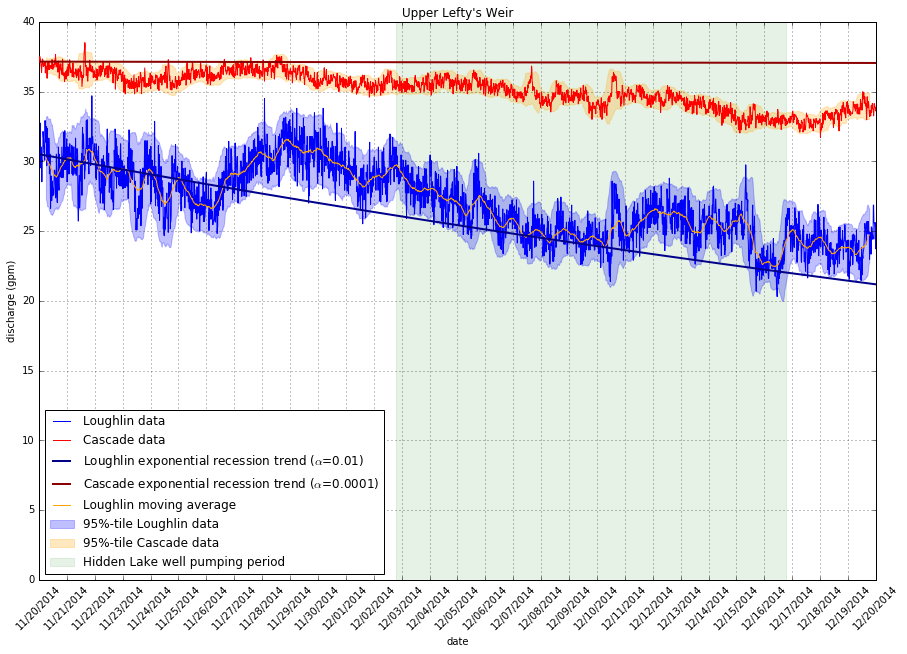

In [80]:

smallerL = Leftys[(Leftys.index >= pd.datetime(2014,11,20))&(Leftys.index <= pd.datetime(2014,12,20))]

xjules = smallerL.index.to_julian_date()
smallerL.loc[:,'rec'] = smallerL['UL_LW_Q_gpm'][0] - 0.5*(xjules-xjules[0]) 
smallerL.loc[:,'LWlogrecs'] = smallerL['UL_LW_Q_gpm'][0]*np.exp(-1*(xjules-xjules[0])*lalph[0])
smallerL.loc[:,'JFlogrecs'] = smallerL['UL_JF_Q_gpm'][0]*np.exp(-1*(xjules-xjules[0])*jalph[0])

x = Leftys.index.to_datetime()
x2 = smallerL.index.to_datetime()
y1 = Leftys['UL_LW_Q_gpm']
y2 = Leftys['UL_JF_Q_gpm']


y4 = smallerL['UL_LW_Q_gpm'].rolling(window=48, center=True).mean()
y6 = smallerL['UL_LW_Q_gpm'].rolling(window=48, center=True).std()
y7 = y4+y6*2
y8 = y4-y6*2

Jy4 = smallerL['UL_JF_Q_gpm'].rolling(window=48, center=True).mean()
Jy6 = smallerL['UL_JF_Q_gpm'].rolling(window=48, center=True).std()
Jy7 = Jy4+Jy6*2
Jy8 = Jy4-Jy6*2

plt.figure()
plt.plot(x,y1, color='blue', zorder=2, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=3, label='Cascade data')
plt.plot(smallerL.index, smallerL.LWlogrecs, color='darkblue', 
         lw=2, label=r'Loughlin exponential recession trend ($\alpha$=%.2f)'%lalph, zorder=10)
plt.plot(x2, smallerL.JFlogrecs, color='darkred', 
         lw=2, zorder=10, label=r'Cascade exponential recession trend ($\alpha$=%.4f)'%jalph)
plt.plot(x2,y4, color='orange', zorder=4, label='Loughlin moving average')
plt.fill_between(x2, y8, y7, alpha=0.25, zorder=1, color='blue',label= '95%-tile Loughlin data')
plt.fill_between(x2, Jy8, Jy7, alpha=0.25, zorder=1, color='orange',label= '95%-tile Cascade data')
plt.title('Upper Lefty\'s Weir')

plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
plt.fill_between(pd.date_range('12/2/2014 19:00','12/16/2014 19:00'),0,150, color='green',
                 alpha=.1, label="Hidden Lake well pumping period", zorder=0)
#plt.yticks(np.arange(0, 40.0, 1))
dtrng = pd.date_range('11/20/2014','12/20/2014',freq='D')
datelabels = [d.strftime('%m/%d/%Y') for d in dtrng]
plt.xticks(dtrng,datelabels,rotation=45)
plt.ylim(0, 40.0)
plt.xlim('11/20/2014','12/20/2014')
plt.legend(loc=3, scatterpoints=1)

print("Average Loughlin moving window (2-day) standard deviation = " + str(y6.mean()))
print("Average Cascade moving window (2-day) standard deviation = " + str(Jy6.mean()))

plt.savefig(figout+"Upper Leftys Discharge and recession during test period.svg")

In [81]:
Leftys = pd.concat([Leftys, UL_LW2])
Leftys.sort_index(inplace=True)

In [82]:
UL_LW_old = pd.read_excel(Upper_Leftys_Loughlin_old,'Lefty Flow',index_col=0, names=['UL_LW_Q_gpm', 'UL_LW_ppt_in'])

In [83]:
UL_LW_old = UL_LW_old[UL_LW_old.index < datetime(2014,4,1)]

In [84]:
Leftys = pd.concat([Leftys, UL_LW_old])
Leftys.sort_index(inplace=True)

0.546420256589
0.380427494236
0.563257237278


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=True).mean()


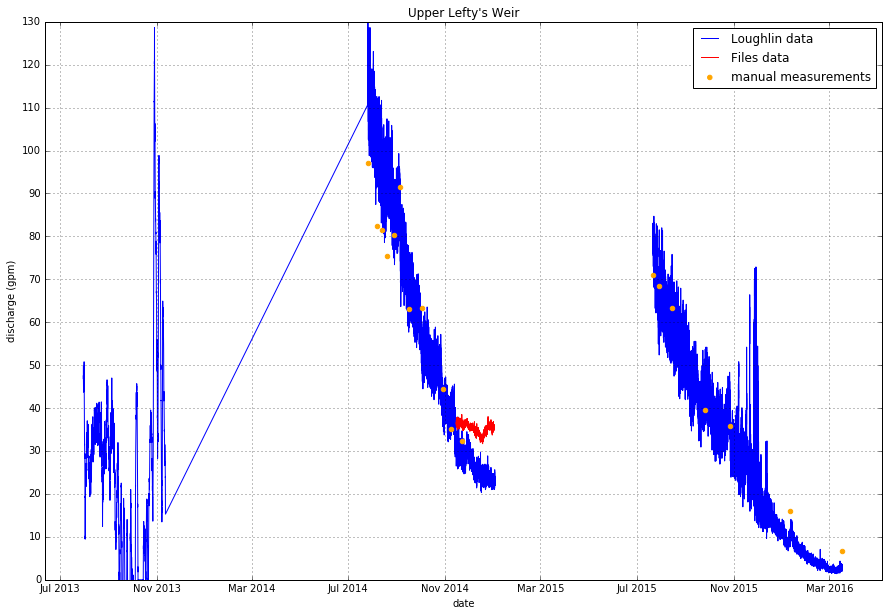

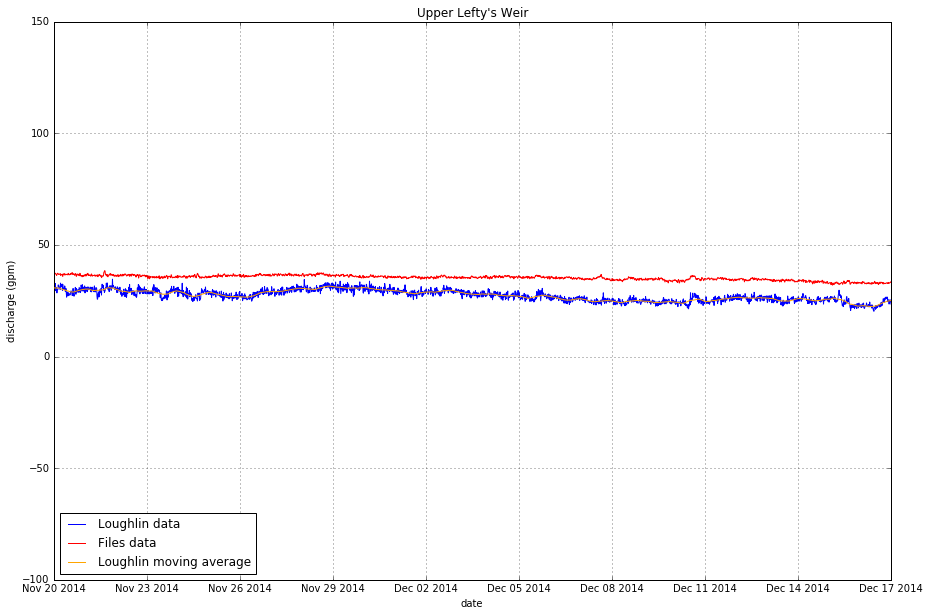

In [85]:
plt.figure()
x = Leftys.index.to_datetime()
y1 = Leftys['UL_LW_Q_gpm']
y2 = Leftys['UL_JF_Q_gpm']
x3 = UL_manual.index.to_datetime()
y3 = UL_manual['UL_bucket_Q_gpm']

print y1.corr(y2, method='pearson')
print y1.corr(y2, method='kendall')
print y1.corr(y2, method='spearman')

y4 = pd.rolling_mean(Leftys['UL_LW_Q_gpm'], window=48, center=True)

plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='Files data')
plt.scatter(x3,y3, color='orange', zorder=3, label='manual measurements' )
plt.title('Upper Lefty\'s Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
plt.yticks(np.arange(0, 140.0, 10))
plt.ylim(0.0, 130.0)
plt.legend( scatterpoints=1)

plt.figure()
plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='Files data')
plt.plot(x,y4, color='orange', zorder=3, label='Loughlin moving average')
plt.title('Upper Lefty\'s Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
#plt.yticks(np.arange(0, 40.0, 1))
#plt.ylim(4.0, 24.0)
plt.xlim('11/20/2014','12/17/2014')
plt.legend(loc=3, scatterpoints=1)

In [86]:
#Leftys = Leftys.drop(['UL_LW_p_cm','dpUL_LW_p_cm', 'maUL_LW_p_cm', 'mstUL_LW_p_cm', 'UL_JF_p_PSI', 'UL_JF_dp_PSI', 'UL_BP_LW_p_cm',
 #                    'UL_LW_p_ft','UL_LW_h_ft', 'UL_JF_p_ft', 'UL_JF_h_ft'],axis=1)

In [87]:
Leftys = nodups(Leftys, Climate)

In [88]:
list(Leftys.columns.values)

['UL_BP_LW_p_cm',
 'UL_BP_LW_p_ft',
 'UL_BP_LW_t_C',
 'UL_JF_Q_cfs',
 'UL_JF_Q_gpm',
 'UL_JF_t_C',
 'UL_LW_Q_cfs',
 'UL_LW_Q_gpm',
 'UL_LW_Q_lpm',
 'UL_LW_t_C']

In [89]:
All = pd.merge(Climate, Leftys, right_index=True, left_index=True, how='outer')

In [90]:
list(All.columns.values)

['USU_Avon_BP_mmHg_x',
 'USU_Avon_BP_mmHg_y',
 'USU_SF_PPT_in',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'USU_SF_BD_h_ft',
 'Site Id',
 'WTEQ.I-1 (in) ',
 'PREC.I-1 (in) ',
 'TOBS.I-1 (degC) ',
 'SNWD.I-1 (in) ',
 'SMS.I-1:-2 (pct)  (silt)',
 'SMS.I-1:-8 (pct)  (silt)',
 'SMS.I-1:-20 (pct)  (silt)',
 'STO.I-1:-2 (degC) ',
 'STO.I-1:-8 (degC) ',
 'STO.I-1:-20 (degC) ',
 'SAL.I-1:-2 (gram) ',
 'SAL.I-1:-8 (gram) ',
 'SAL.I-1:-20 (gram) ',
 'RDC.I-1:-2 (unit) ',
 'RDC.I-1:-8 (unit) ',
 'RDC.I-1:-20 (unit) ',
 'BATT.I-1 (volt) ',
 'Unnamed: 20',
 'SForkWolfCreek',
 'OtherQuartzite',
 'NorthForkofWolfCreek',
 'LeftysCreek',
 'JamesPeakFork',
 'HiddenLakeFork',
 'CobabeCreek',
 'NorthSide',
 'SouthSide',
 'UL_BP_LW_p_cm',
 'UL_BP_LW_p_ft',
 'UL_BP_LW_t_C',
 'UL_JF_Q_cfs',
 'UL_JF_Q_gpm',
 'UL_JF_t_C',
 'UL_LW_Q_cfs',
 'UL_LW_Q_gpm',
 'UL_LW_Q_lpm',
 'UL_LW_t_C']

### Comparing the Data

[To top of page](#top)

The two datasets are definately different in tems of the amount of small-scale variability.  The Loughlin data show greater variability, perhaps due to an incomplete removal of barometric pressure effects.

                            OLS Regression Results                            
Dep. Variable:            UL_JF_Q_gpm   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     1954.
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:43:46   Log-Likelihood:                -6291.3
No. Observations:                4593   AIC:                         1.259e+04
Df Residuals:                    4591   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          29.9248      0.124    241.522      

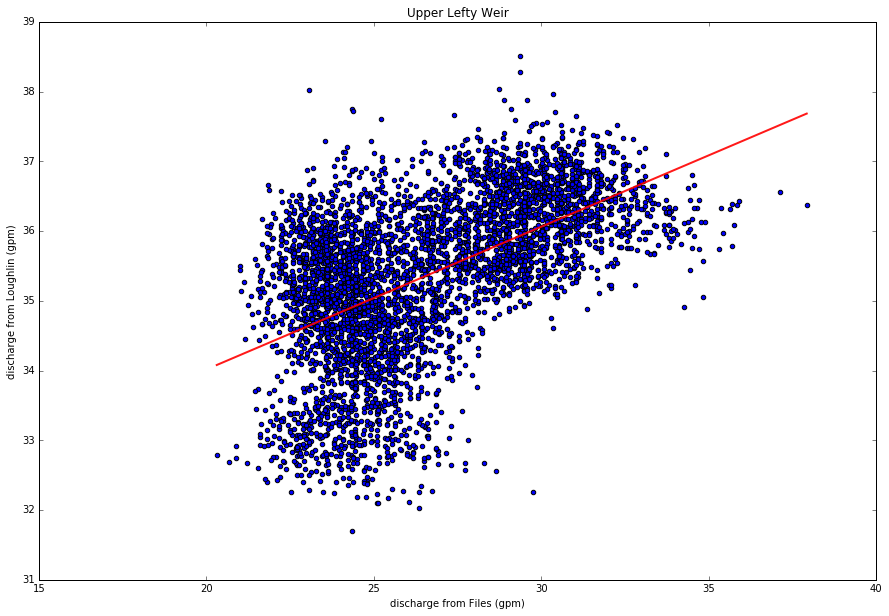

In [91]:
import statsmodels.api as sm

LeftyShortJF = Leftys[np.isfinite(Leftys)]
LeftyShortJF =LeftyShortJF[np.isfinite(LeftyShortJF['UL_LW_Q_gpm'])]
LeftyShortJF =LeftyShortJF[np.isfinite(LeftyShortJF['UL_JF_Q_gpm'])]

x0 = LeftyShortJF['UL_LW_Q_gpm']
x = sm.add_constant(x0)
y = LeftyShortJF['UL_JF_Q_gpm']

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Upper Lefty Weir')
plt.ylabel('discharge from Loughlin (gpm)')
plt.xlabel('discharge from Files (gpm)')

In [92]:
LeftyShortJF.to_csv(rootlocal + "/LeftysShort.csv")

2014-07-25 12:30:00
2016-03-17 13:15:00
                            OLS Regression Results                            
Dep. Variable:            UL_LW_Q_gpm   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 3.037e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:43:49   Log-Likelihood:            -1.6186e+05
No. Observations:               36580   AIC:                         3.237e+05
Df Residuals:                   36578   BIC:                         3.237e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       

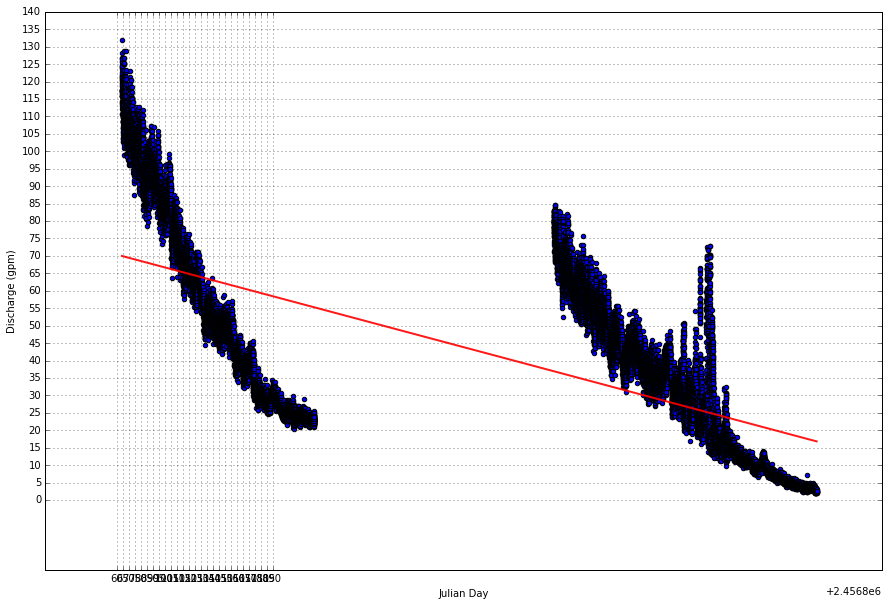

In [93]:
LeftyShortJF = Leftys[(np.isfinite(Leftys['UL_LW_Q_gpm']))&(Leftys.index.to_datetime()>pd.datetime(2014,1,20))]

print(min(LeftyShortJF.index))
print(max(LeftyShortJF.index))

x0 = LeftyShortJF.index.to_julian_date()[:-20*24*4]
x = sm.add_constant(x0)
y = LeftyShortJF['UL_LW_Q_gpm'][:-20*24*4]

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')
plt.xlabel('Julian Day')
plt.ylabel('Discharge (gpm)')
#plt.xlim(2456860,2456990)
plt.xticks(np.arange(2456860,2456995, 5))
plt.yticks(np.arange(0,145, 5))
plt.grid()

The long-term seasonal trend in the transducer data show a decrease of discharge of 0.72 gallons per minute per day. The decline in discharge is not perfectly linear, and tapers off as time progresses.

2673
2673
                            OLS Regression Results                            
Dep. Variable:            UL_JF_Q_gpm   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3536.
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:43:50   Log-Likelihood:                -2190.6
No. Observations:                2673   AIC:                             4385.
Df Residuals:                    2671   BIC:                             4397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.932e+05   3247.970     59.47

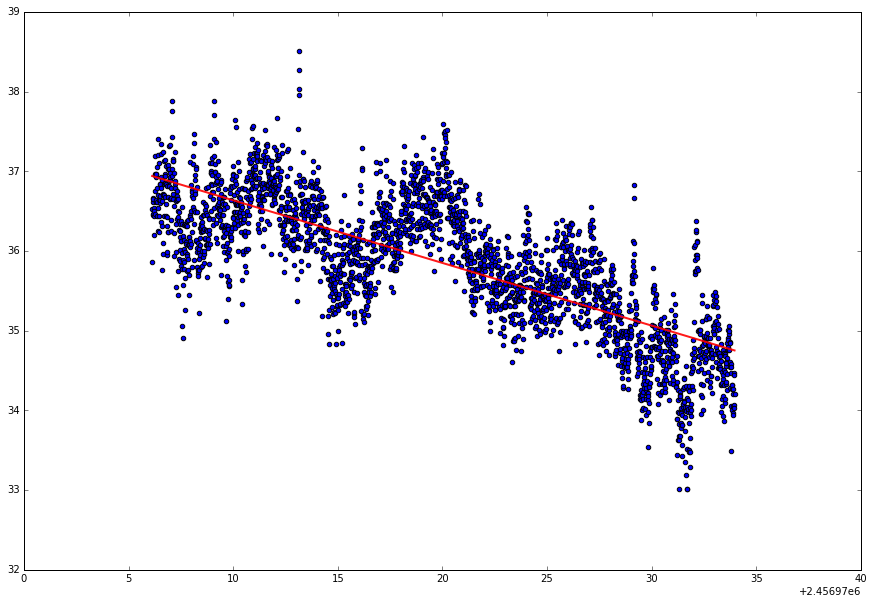

In [94]:
LeftyShortJF = Leftys[np.isfinite(Leftys['UL_JF_Q_gpm'])]

x0 = LeftyShortJF.index.to_julian_date()[:-20*24*4]
x = sm.add_constant(x0)
y = LeftyShortJF['UL_JF_Q_gpm'][:-20*24*4]

print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

In [95]:
#del (Climate,Leftys,LeftyShortJF)

## Lower Lefty's Spring

### Importing and Converting Lower Lefty's Spring Data

[To top of page](#top)

Import the transducer data collected by Loughlin Water at Upper Lefty's Spring weir. These data are nonvented and provide values of absolute head, so barometric pressure must be subtracted to determine the water head above the transducer. These data extend from 12/3/2014 15:30 to 12/19/2014 11:45. The path to the input file can be found in the [data sources](#Data-Sources) section. <a id=lower></a>

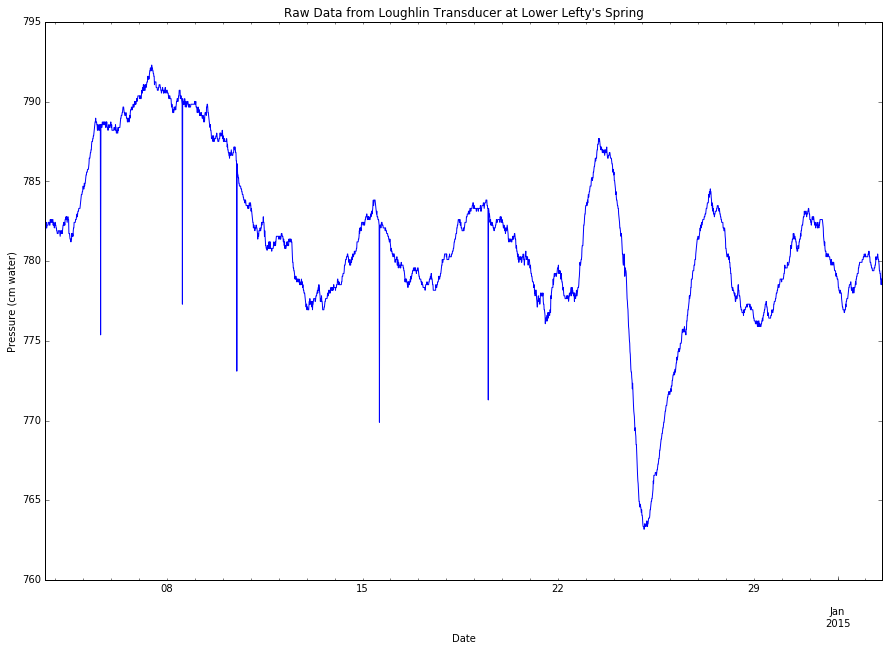

In [96]:
LL_LW = pd.read_csv(Lower_Leftys_Loughlin,
                    index_col=0, skiprows=54, skipfooter=1, parse_dates=True, 
                    names=['dt','LL_LW_p_cm','LL_LW_t_C'], engine='python')
LL_LW['LL_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Raw Data from Loughlin Transducer at Lower Lefty\'s Spring')

Remove obvious outliers created when the transducer was not in the water.

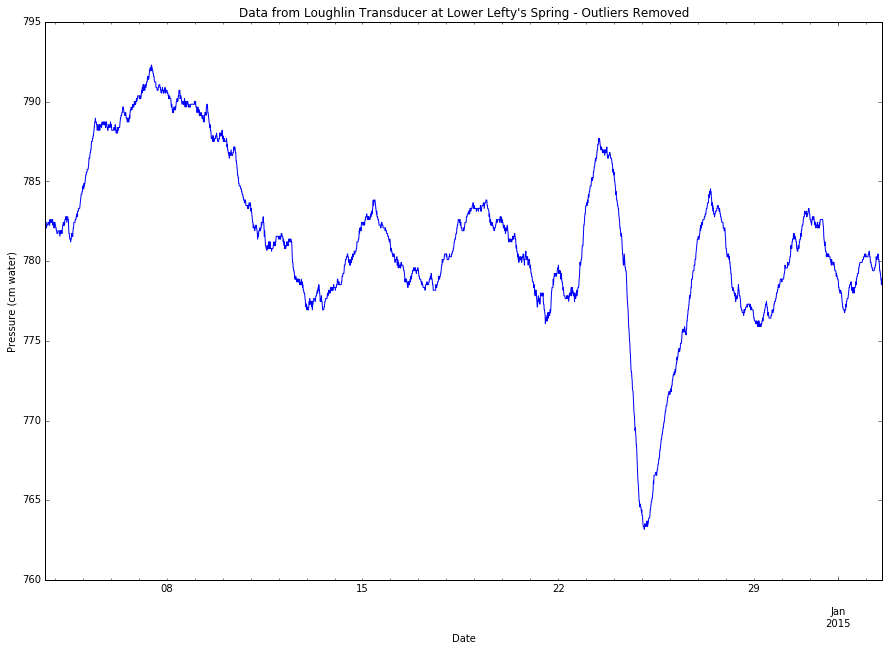

In [97]:
LL_LW = wt.smoother(LL_LW, 'LL_LW_p_cm', 50, 3)
LL_LW['LL_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Data from Loughlin Transducer at Lower Lefty\'s Spring - Outliers Removed')

Import the Upper Leftys barometric pressure data to remove barometric influence from the weir transducer data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=leftysbp1></a>

In [98]:
UL_BP_LW = pd.read_csv(Upper_Leftys_Barometer_Loughlin, 
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, names=['dt','UL_BP_LW_p_cm','UL_BP_LW_t_C'], 
                    engine='python')

Plot the barometric pressure and the nonvented transducer data to make sure they match.

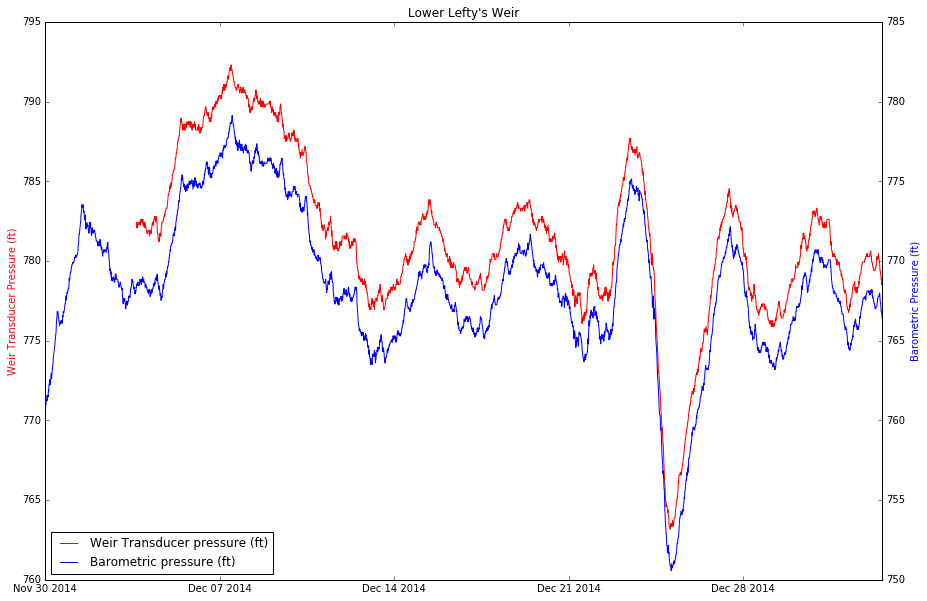

In [99]:
plt.figure()
x1 = LL_LW.index.to_datetime()
y1 = LL_LW['LL_LW_p_cm']

x2 = UL_BP_LW.index.to_datetime()
y2 = UL_BP_LW['UL_BP_LW_p_cm']

fig, ax1 = plt.subplots()
plt.title('Lower Lefty\'s Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [100]:
LowLeftys = pd.merge(LL_LW, UL_BP_LW, left_index=True, right_index=True, how='outer')
LowLeftys['LL_LW_p_ft'] =(LowLeftys['LL_LW_p_cm'] - LowLeftys['UL_BP_LW_p_cm'])*0.0328084
LowLeftys['UL_BP_LW_p_ft'] = LowLeftys['UL_BP_LW_p_cm']*0.0328084

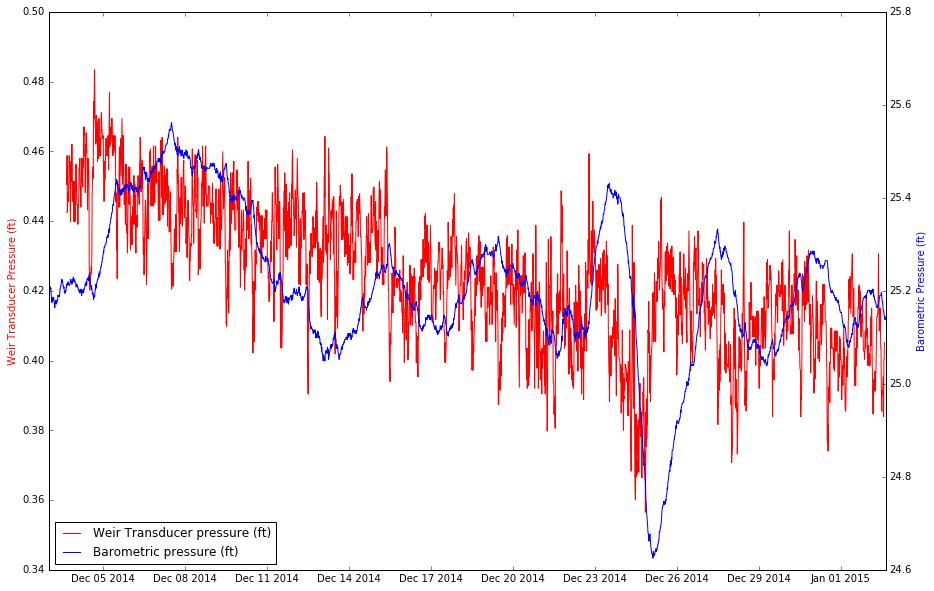

In [101]:
x = LowLeftys.index.to_datetime()
y1 = LowLeftys['LL_LW_p_ft']
y2 = LowLeftys['UL_BP_LW_p_ft']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('12/3/2014',LowLeftys.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

Import data from John Files. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=fileslower></a>

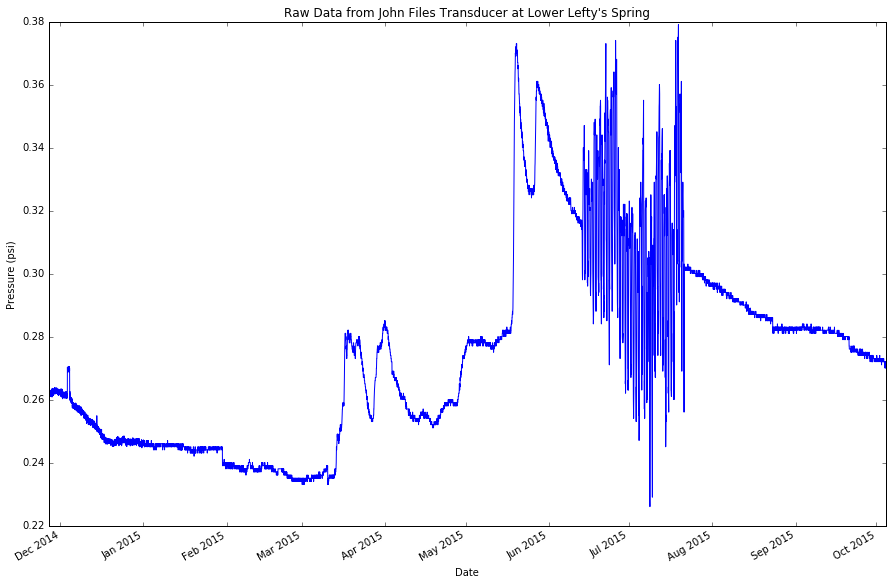

In [102]:
LL_JF = pd.read_csv(Lower_Leftys_John_Files, 
                     index_col=0, skiprows=91, skipfooter=1, usecols=[0,2,3], parse_dates=True, 
                     names=['dt','LL_JF_p_PSI','LL_JF_t_C'], engine='python')
LL_JF2 = pd.read_csv(Lower_Leftys_John_Files2,
                     index_col=0, skiprows=74, skipfooter=1, usecols=[0,2,3], parse_dates=True, 
                     names=['dt','LL_JF_p_PSI','LL_JF_t_C'], engine='python')
LL_JF3 = pd.read_csv(Lower_Leftys_John_Files3,
                     index_col=0, skiprows=79, skipfooter=1, usecols=[0,2,3], parse_dates=True, 
                     names=['dt','LL_JF_p_PSI','LL_JF_t_C'], engine='python')



LL_JF = pd.concat([LL_JF,LL_JF2,LL_JF3])
LL_JF.drop_duplicates(inplace=True)
LL_JF.sort_index(inplace=True)
plt.figure()
LL_JF['LL_JF_p_PSI'].plot()
#LL_JF2['LL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Raw Data from John Files Transducer at Lower Lefty\'s Spring')

In [103]:
LL_JF1 = LL_JF[(LL_JF.index < datetime(2015,6,10))]
LL_JF1 = wt.jumpfix(LL_JF1,'LL_JF_p_PSI',0.005)
LL_JF2 = LL_JF[(LL_JF.index > datetime(2015,7,25))]
LL_JF2 = wt.jumpfix(LL_JF2,'LL_JF_p_PSI',0.003)
LL_JF = pd.concat([LL_JF1,LL_JF2])

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication-0.2.13-py2.7.egg\wellapplication\transport.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication-0.2.13-py2.7.egg\wellapplication\transport.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

                     LL_JF_p_PSI  LL_JF_t_C  deltaLL_JF_p_PSI     cumul
dt                                                                     
2014-12-03 15:50:18     0.269009   4.902679          0.007766  0.007766
2014-12-04 11:50:18     0.261264   5.033936         -0.008671 -0.000905
2015-01-30 10:52:10     0.239000   5.009000         -0.005000 -0.005905
2015-03-10 15:52:10     0.234000   5.780000         -0.005000 -0.010905
2015-05-18 21:52:00     0.311000   5.028000          0.006000 -0.004905
2015-05-18 22:52:00     0.317000   5.066000          0.006000  0.001095
2015-05-18 23:52:00     0.323000   5.078000          0.006000  0.007095
2015-05-19 00:52:00     0.330000   5.094000          0.007000  0.014095
2015-05-19 01:52:00     0.335000   5.103000          0.005000  0.019095
2015-05-19 03:52:00     0.346000   5.108000          0.007000  0.026095


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication-0.2.13-py2.7.egg\wellapplication\transport.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\wellapplication-0.2.13-py2.7.egg\wellapplication\transport.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                     LL_JF_p_PSI  LL_JF_t_C  deltaLL_JF_p_PSI  cumul
dt                                                                  
2015-08-02 19:52:00        0.294      5.187            -0.003 -0.003
2015-08-23 10:52:00        0.282      5.270            -0.004 -0.007


In [104]:
LL_JF = LL_JF[(LL_JF.index < datetime(2015,6,10))|(LL_JF.index > datetime(2015,7,25))]
LL_JF = wt.jumpfix(LL_JF,'LL_JF_p_PSI',0.005)

                     LL_JF_p_PSI  LL_JF_t_C  deltaLL_JF_p_PSI  newVal  \
dt                                                                      
2015-07-25 00:52:00        0.301      5.107          0.007095   0.301   

                        cumul  
dt                             
2015-07-25 00:52:00  0.007095  


In [105]:
LL_JF.loc[datetime(2015,7,25):,'LL_JF_p_PSI'] = LL_JF['LL_JF_p_PSI'].apply(lambda x: x-0.019,1)

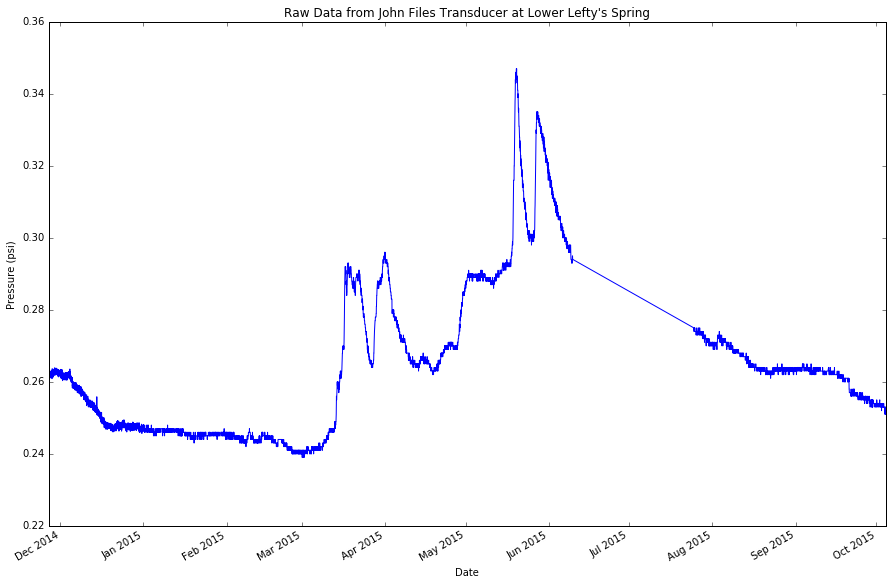

In [106]:
plt.figure()
LL_JF['LL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Raw Data from John Files Transducer at Lower Lefty\'s Spring')

Remove outliers from John Files data.

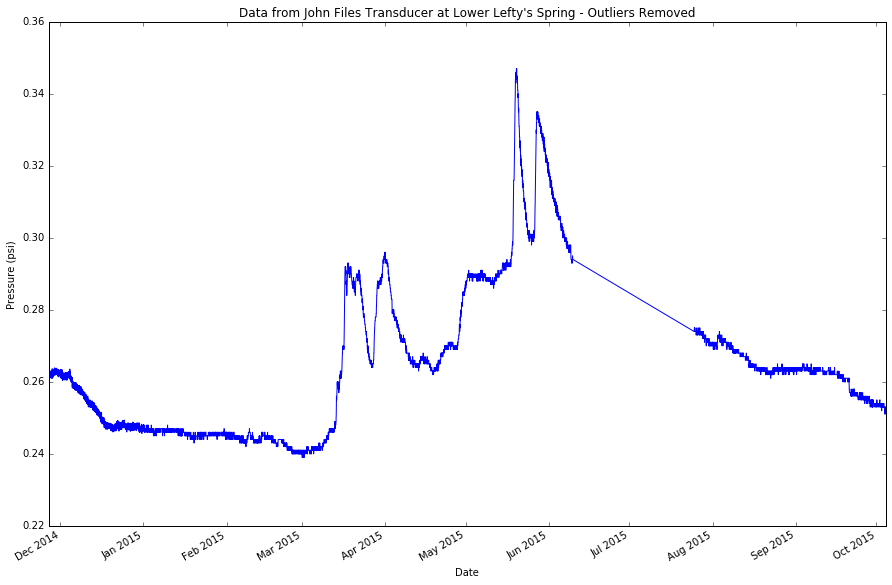

In [107]:
LL_JF = wt.smoother(LL_JF, 'LL_JF_p_PSI', 200, 3)
LL_JF['LL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Data from John Files Transducer at Lower Lefty\'s Spring - Outliers Removed')

Resample and interpolate John Files data to match interval and timing of Loughlin data.

In [108]:
LL_JF = LL_JF.resample('1Min', how='mean')
LL_JF = LL_JF.interpolate(method='time', limit=480)
LL_JF = LL_JF.resample('15Min', how='mean', base=0)

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [109]:
LowLeftys = pd.merge(LowLeftys, LL_JF, left_index=True, right_index=True, how='outer')

Import the manually readings for Lower Lefty's weir. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=lowerman></a>

In [110]:
LL_manual = pd.read_excel(Lower_Leftys_Manual, 'LowerLeftys', index_col=0, names = ['LL_vdepth_in', 'LL_man_source'],
                          parse_cols= 2, 
                          skiprows=0, skip_footer=0)

In [111]:
LL_manual['LL_vdepth_ft'] = LL_manual['LL_vdepth_in']/12
LL_manual = LL_manual.sort_index()
LL_manual = LL_manual[ LL_manual.index.to_datetime()>pd.datetime(2014,7,25)]
print LL_manual

                     LL_vdepth_in LL_man_source  LL_vdepth_ft
date_time                                                    
2014-11-21 13:57:00        4.0000             C      0.333333
2014-11-26 15:30:00        4.0000             C      0.333333
2014-12-01 13:48:00        3.7500             C      0.312500
2014-12-01 14:26:00        4.0000             C      0.333333
2014-12-03 12:48:00        3.7500             L      0.312500
2014-12-03 12:48:00        3.8400             C      0.320000
2014-12-03 15:20:00        3.8750             L      0.322917
2014-12-04 12:00:00        4.0000             C      0.333333
2014-12-05 12:25:00        4.0000             C      0.333333
2014-12-05 12:40:00        3.8750             L      0.322917
2014-12-06 11:10:00        3.6000             C      0.300000
2014-12-07 08:00:00        3.4800             C      0.290000
2014-12-08 08:20:00        3.6000             C      0.300000
2014-12-08 13:07:00        3.8125             L      0.317708
2014-12-

In [112]:
LowLeftys.columns

Index([u'LL_LW_p_cm', u'LL_LW_t_C', u'UL_BP_LW_p_cm', u'UL_BP_LW_t_C',
       u'LL_LW_p_ft', u'UL_BP_LW_p_ft', u'LL_JF_p_PSI', u'LL_JF_t_C',
       u'deltaLL_JF_p_PSI', u'newVal'],
      dtype='object')

In [113]:
LowLeftys['LL_JF_p_ft'] = LowLeftys['LL_JF_p_PSI']*2.307
meanDiff = rollmeandiff(LL_manual,'LL_vdepth_ft',LowLeftys,'LL_JF_p_ft',5)
print meanDiff
LowLeftys['LL_JF_h_ft'] = LowLeftys['LL_JF_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


-0.274


In [114]:
meanDiff = rollmeandiff(LL_manual,'LL_vdepth_ft',LowLeftys,'LL_LW_p_ft',5)
print meanDiff
LowLeftys['LL_LW_h_ft'] = LowLeftys['LL_LW_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


-0.062


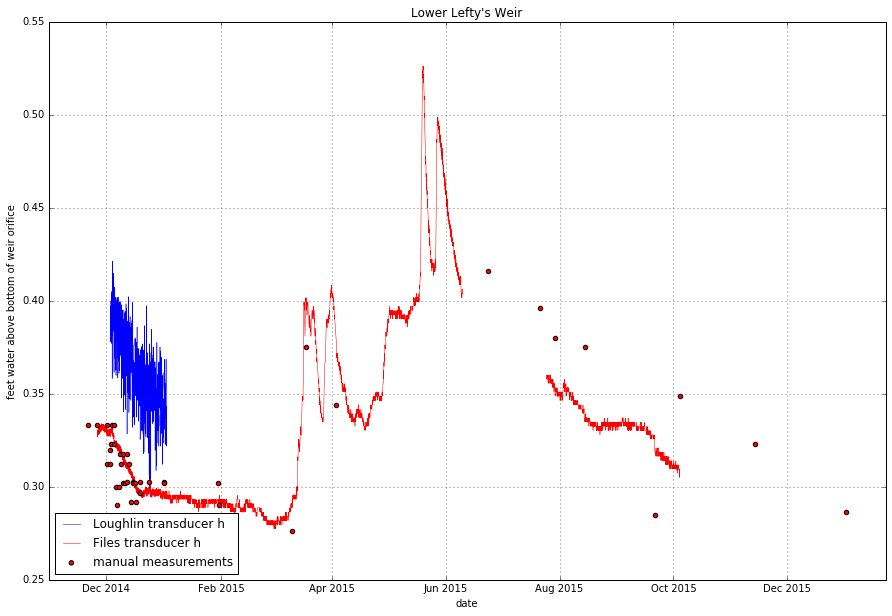

In [115]:

plt.figure()

x = LowLeftys.index.to_datetime()
y = LowLeftys['LL_LW_h_ft']

x1 = LL_manual.index.to_datetime()
y1 = LL_manual['LL_vdepth_ft']

y2 = LowLeftys['LL_JF_h_ft']

#x3 = 

plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer h')
plt.plot(x, y2, zorder=2, c='red', linewidth=0.5, label='Files transducer h')
plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
plt.title('Lower Lefty\'s Weir')
plt.ylabel('feet water above bottom of weir orifice')
plt.xlabel('date')
plt.grid()
#plt.yticks(np.arange(0, 1.0, 0.05))
#plt.ylim(0.3, 1.0)
plt.legend(loc=3, scatterpoints=1)


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:           LL_vdepth_ft   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     13.56
Date:                Wed, 15 Jun 2016   Prob (F-statistic):            0.00131
Time:                        07:44:41   Log-Likelihood:                 77.588
No. Observations:                  24   AIC:                            -151.2
Df Residuals:                      22   BIC:                            -148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3682.6505   1000.053      3.682      0.0

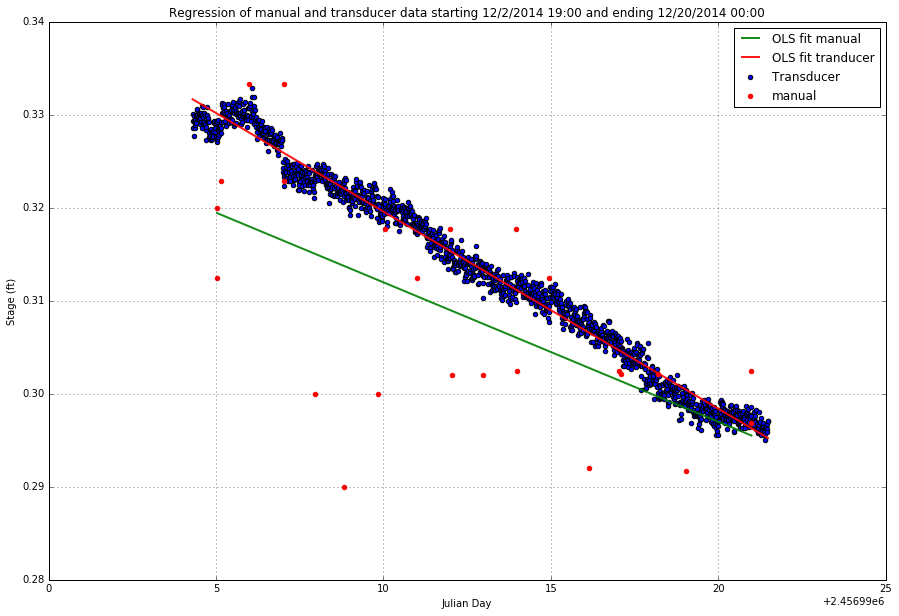

In [116]:
import statsmodels.api as sm
LowLeftFilt = LowLeftys[(LowLeftys.index < pd.datetime(2014,12,20))&(LowLeftys.index > pd.datetime(2014,12,2,19,0))]

x0 = LowLeftFilt.index.to_julian_date()
x = sm.add_constant(x0)
y = LowLeftFilt['LL_JF_h_ft']

plt.figure()
plt.scatter(x0,y,label ='Transducer')

LL_manual_filt = LL_manual[(LL_manual.index < pd.datetime(2014,12,20))&(LL_manual.index > pd.datetime(2014,12,2,19,0))]
LL_manual_filt['LL_vdepth_adj_ft'] = LL_manual_filt['LL_vdepth_ft']-(LL_manual_filt.index.to_julian_date() - LL_manual_filt.index.to_julian_date()[0])*-0.002

x01 = LL_manual_filt.index.to_julian_date()
x1 = sm.add_constant(x01)
y1 = LL_manual_filt.LL_vdepth_ft



plt.scatter(x01,y1, color='red',label='manual')

est = sm.OLS(y1, x1)
est = est.fit()
print est.summary()

x_prime1 = np.linspace(x01.min(),x01.max(),100)[:, np.newaxis]
x_prime1 = sm.add_constant(x_prime1)
y_hat1 = est.predict(x_prime1)

plt.plot(x_prime1[:, 1], y_hat1, c='green', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit manual')

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit tranducer')
plt.xlabel('Julian Day')
plt.ylabel('Stage (ft)')
plt.legend(scatterpoints=1)
plt.title('Regression of manual and transducer data starting 12/2/2014 19:00 and ending 12/20/2014 00:00')
#plt.xlim(2456860,2456990)
#plt.xticks(np.arange(2456860,2456995, 5))
#plt.yticks(np.arange(0,145, 5))
plt.grid()
plt.savefig(figout+"LL_test_recession_w_manual.svg")

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


                            OLS Regression Results                            
Dep. Variable:           LL_vdepth_ft   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.15
Date:                Wed, 15 Jun 2016   Prob (F-statistic):           0.000369
Time:                        07:44:42   Log-Likelihood:                 83.857
No. Observations:                  26   AIC:                            -163.7
Df Residuals:                      24   BIC:                            -161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3712.9142    896.582      4.141      0.0

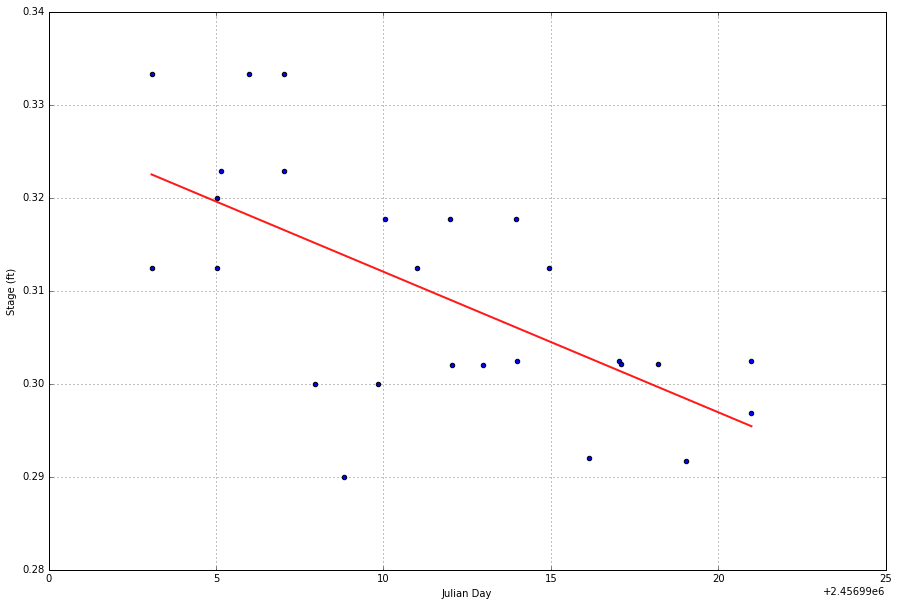

In [117]:
LL_manual_filt = LL_manual[(LL_manual.index < pd.datetime(2014,12,20))&(LL_manual.index > pd.datetime(2014,12,1))]
LL_manual_filt['LL_vdepth_adj_ft'] = LL_manual_filt['LL_vdepth_ft']-(LL_manual_filt.index.to_julian_date() - LL_manual_filt.index.to_julian_date()[0])*-0.002

x0 = LL_manual_filt.index.to_julian_date()
x = sm.add_constant(x0)
y = LL_manual_filt.LL_vdepth_ft

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')
plt.xlabel('Julian Day')
plt.ylabel('Stage (ft)')
#plt.xlim(2456860,2456990)
#plt.xticks(np.arange(2456860,2456995, 5))
#plt.yticks(np.arange(0,145, 5))
plt.grid()

date_time
2014-12-01 13:48:00    0.312500
2014-12-01 14:26:00    0.333386
2014-12-03 12:48:00    0.316417
2014-12-03 12:48:00    0.323917
2014-12-03 15:20:00    0.327044
2014-12-04 12:00:00    0.339183
2014-12-05 12:25:00    0.341218
2014-12-05 12:40:00    0.330822
2014-12-06 11:10:00    0.309781
2014-12-07 08:00:00    0.301517
2014-12-08 08:20:00    0.313544
2014-12-08 13:07:00    0.331651
2014-12-09 11:54:00    0.328342
2014-12-10 11:55:00    0.335551
2014-12-10 12:53:00    0.319924
2014-12-11 11:07:00    0.321776
2014-12-12 11:02:00    0.339478
2014-12-12 11:38:00    0.324319
2014-12-13 10:42:00    0.336242
2014-12-14 15:03:00    0.318104
2014-12-15 12:48:00    0.330417
2014-12-15 14:32:00    0.330144
2014-12-16 16:56:00    0.332344
2014-12-17 12:36:00    0.323600
2014-12-19 11:29:00    0.338307
2014-12-19 11:51:00    0.332712
Name: LL_vdepth_adj_ft, dtype: float64
0.000103382198966
0.0101677037214
26
0.326624679487


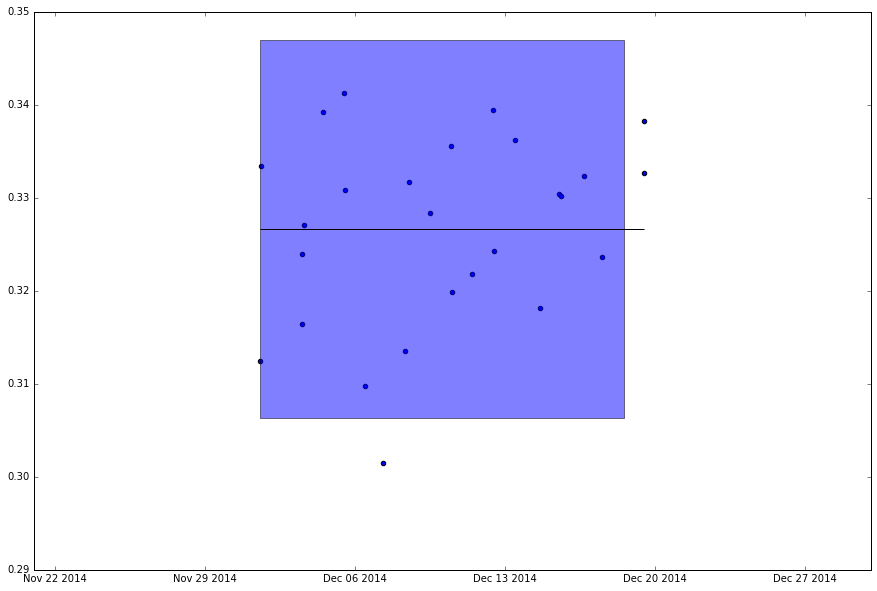

In [118]:
x = LL_manual_filt.index
y = LL_manual_filt.LL_vdepth_adj_ft
print(y)
plt.scatter(x,y)
err = (y.std())*2
print(y.var())
print(y.std())
print(y.count())
print(y.mean())
plt.hlines(y.mean(),LL_manual_filt.index.min(),LL_manual_filt.index.max())
plt.fill_between(pd.date_range(LL_manual_filt.index.min(),LL_manual_filt.index.max(),freq='1D'),y.mean()+err, y.mean()-err, alpha=0.5)

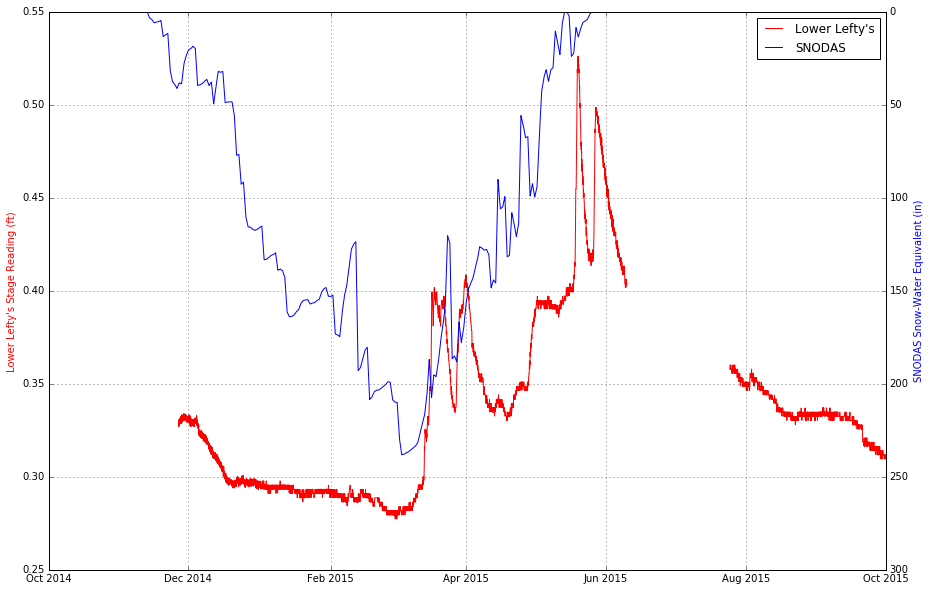

In [119]:
x1 = SNODAS.index.to_datetime()
y1 = SNODAS[u'SouthSide']

x = LowLeftys.index.to_datetime()
y2 = LowLeftys['LL_JF_h_ft']

fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(x,y2,color='red',label='Lower Lefty\'s')

ax2 = ax.twinx()
lns2 = ax2.plot(x1,y1,color='blue',label='SNODAS')
ax2.set_ylim(300,0)
plt.xlim('10/1/2014','10/1/2015')
xtic = ['10/1/2014','11/1/2014','12/1/2014','1/1/2015','2/1/2015','3/1/2015','4/1/2015','5/1/2015', 
          '6/1/2015','7/1/2015','8/1/2015','9/1/2015','10/1/2015']
xlabs = ['10/1/2014','11/1/2014','12/1/2014','1/1/2015','2/1/2015','3/1/2015','4/1/2015','5/1/2015', 
          '6/1/2015','7/1/2015','8/1/2015','9/1/2015','10/1/2015']
#plt.xticks(xtic, xlabs, rotation=45)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_ylabel('Lower Lefty\'s Stage Reading (ft)', color='red')
ax2.set_ylabel('SNODAS Snow-Water Equivalent (in)', color='blue')
ax.grid()

plt.savefig(rootlocal+'LowerLeftysLongterm.pdf')



Once the transducer data were aligned with manual readings, we converted the height of water above the bottom of the weir orifice to discharge in both gpm and cfs.

To do this, we used equations from: U.S. Bureau of Reclamation, 2001, Water Measurement Manual - A water resources technical publication: online, http://www.usbr.gov/pmts/hydraulics_lab/pubs/wmm/.

For 90$^\circ$ v-notch weirs, the equation to calculate discharge from h is:
$$
Q= 1122\cdot h^{\frac{5}{2}}
$$
<ul>
  <li>h = feet above bottom of weir orifice</li>
  <li>Q = discharge in gpm</li>
</ul>

In [120]:
LowLeftys['LL_LW_Q_gpm'] = 1122*LowLeftys['LL_LW_h_ft']**2.5
LowLeftys['LL_JF_Q_gpm'] = 1122*LowLeftys['LL_JF_h_ft']**2.5
LowLeftys['LL_JF_Q_cfs'] = 0.00222800926*LowLeftys['LL_JF_Q_gpm']
LowLeftys['LL_LW_Q_cfs'] = 0.00222800926*LowLeftys['LL_LW_Q_gpm']
LowLeftys['LL_LW_Q_lpm'] = LowLeftys['LL_LW_Q_gpm']*3.78541
LowLeftys['LL_JF_Q_lpm'] = LowLeftys['LL_JF_Q_gpm']*3.78541

In [121]:
LowLeftys.describe()

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


LL_LW_p_cm    LL_LW_t_C  UL_BP_LW_p_cm  UL_BP_LW_t_C   LL_LW_p_ft  \
count  2875.000000  2875.000000   15469.000000  15469.000000  2875.000000   
mean    781.381658     5.021077     771.930240      6.910033     0.423847   
std       5.200128     0.138778       4.591432      8.970277     0.019850   
min     763.183000     4.080000     750.575000    -19.060000     0.356529   
25%            NaN          NaN            NaN           NaN          NaN   
50%            NaN          NaN            NaN           NaN          NaN   
75%            NaN          NaN            NaN           NaN          NaN   
max     792.292000     7.893000     781.125000     35.880000     0.483366   

       UL_BP_LW_p_ft   LL_JF_p_PSI     LL_JF_t_C  deltaLL_JF_p_PSI  \
count   15469.000000  25638.000000  25638.000000      25638.000000   
mean       25.325796      0.264932      5.058129          0.000005   
std         0.150638      0.020838      0.286575          0.000595   
min        24.625165      0.238998      4.157676         -0.003751   
25%              NaN           NaN           NaN               NaN   
50%              NaN           NaN           NaN               NaN   
75%              NaN           NaN           NaN               NaN   
max        25.627461      0.346843      6.293840          0.006623   

             newVal    LL_JF_p_ft    LL_JF_h_ft   LL_LW_h_ft  LL_LW_Q_gpm  \
count  25638.000000  25638.000000  25638.000000  2875.000000  2875.000000   
mean       0.270014      0.611197      0.337197     0.361847    88.868357   
std        0.022161      0.048072      0.048072     0.019850    12.117804   
min        0.238998      0.551369      0.277369     0.294529    52.821725   
25%             NaN           NaN           NaN          NaN          NaN   
50%             NaN           NaN           NaN          NaN          NaN   
75%             NaN           NaN           NaN          NaN          NaN   
max        0.346843      0.800166      0.526166     0.421366   129.312940   

        LL_JF_Q_gpm   LL_JF_Q_cfs  LL_LW_Q_cfs  LL_LW_Q_lpm   LL_JF_Q_lpm  
count  25638.000000  25638.000000  2875.000000  2875.000000  25638.000000  
mean      76.979662      0.171511     0.198000   336.403166    291.399582  
std       30.366787      0.067657     0.026999    45.870857    114.950738  
min       45.460925      0.101287     0.117687   199.951887    172.088239  
25%             NaN           NaN          NaN          NaN           NaN  
50%             NaN           NaN          NaN          NaN           NaN  
75%             NaN           NaN          NaN          NaN           NaN  
max      225.320344      0.502016     0.288110   489.502496    852.929882

                            OLS Regression Results                            
Dep. Variable:            LL_JF_Q_gpm   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.010e+05
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:44:45   Log-Likelihood:                -2029.1
No. Observations:                1823   AIC:                             4062.
Df Residuals:                    1821   BIC:                             4073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.458e+06   7735.552    317.769      0.0

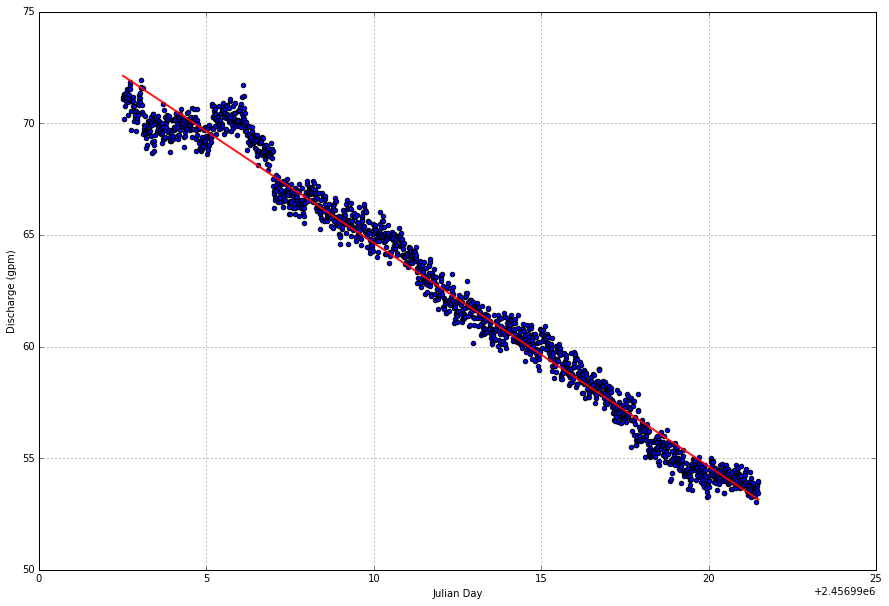

In [122]:
LowLeftFilt = LowLeftys[(LowLeftys.index < pd.datetime(2014,12,20))&(LowLeftys.index > pd.datetime(2014,12,1))]
#x = LowLeftFilt.index.to_datetime()
#y = LowLeftFilt['LL_LW_Q_gpm']

x1 = LL_manual.index.to_datetime()
y1 = LL_manual['LL_vdepth_ft']

y2 = LowLeftFilt['LL_JF_Q_gpm']

#plt.plot(x,y2)

x0 = LowLeftFilt.index.to_julian_date()
x = sm.add_constant(x0)
y = LowLeftFilt['LL_JF_Q_gpm']

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')
plt.xlabel('Julian Day')
plt.ylabel('Discharge (gpm)')
#plt.xlim(2456860,2456990)
#plt.xticks(np.arange(2456860,2456995, 5))
#plt.yticks(np.arange(0,145, 5))
plt.grid()



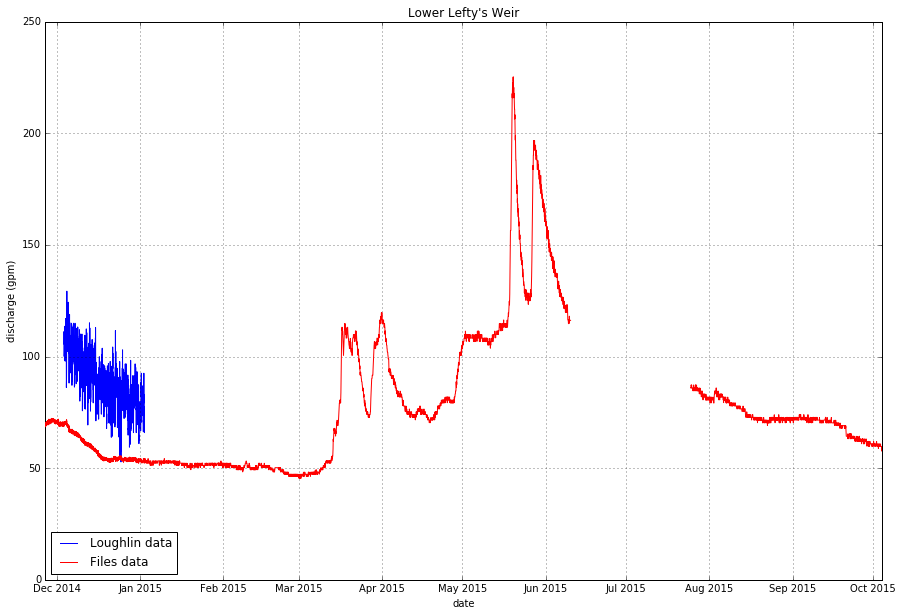

In [123]:
plt.figure()
x = LowLeftys.index.to_datetime()
y1 = LowLeftys['LL_LW_Q_gpm']
y2 = LowLeftys['LL_JF_Q_gpm']

plt.figure()

plt.plot(x,y1, color='blue', zorder=2, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=3, label='Files data')


plt.title('Lower Lefty\'s Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()

plt.legend(loc=3, scatterpoints=1)

plt.savefig(figout + "16_LowerLeftys.svg")

### Lower Lefty's Analysis

In [124]:
LowLeftysDaily = LowLeftys.dropna(subset=['LL_JF_Q_lpm'])
LowLeftysDaily = LowLeftysDaily.resample('1H').mean()
print(len(LowLeftysDaily))

7483


In [125]:
def fitit(x,y,Q):
    from scipy.optimize import curve_fit
    def func(x, c):
        return Q*np.exp(-1*c*x)

    popt, pcov = curve_fit(func, x, y, p0=(1e-1))#, bounds = [0,40000], method='trf')
    return popt, pcov

In [126]:
#LowLeftysDaily = LowLeftysDaily[LowLeftysDaily.index > pd.datetime(2015,1,1,0,0)]
#print(len(LowLeftysDaily))

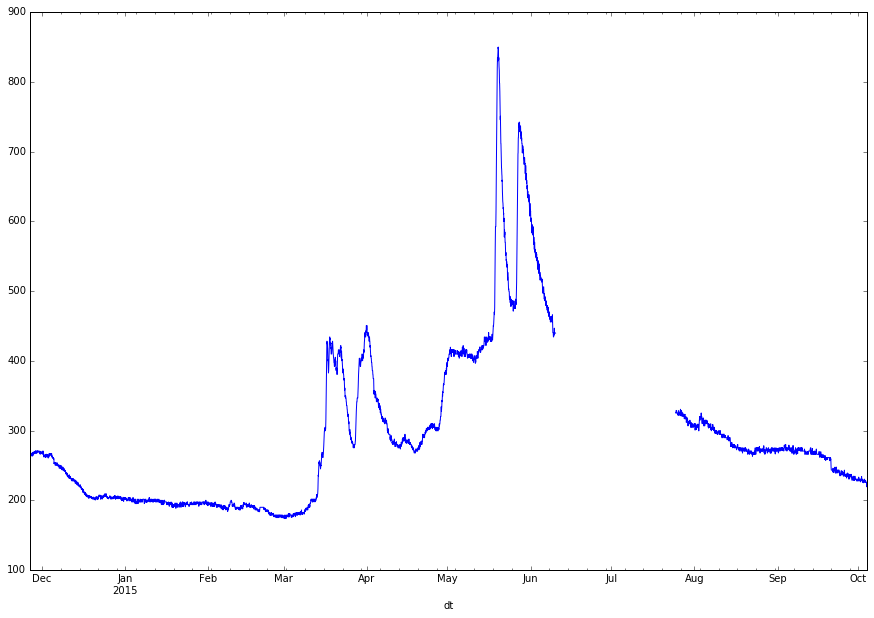

In [127]:
LowLeftysDaily['LL_JF_Q_lpm'].plot()

In [128]:
recession(LowLeftys,'LL_JF_Q_gpm',[2015,6,2],[2015,6,12])
recession(LowLeftys,'LL_JF_Q_gpm',[2015,7,1])

(array([ 0.00475639]),
 Float64Index([            0.0, 0.0104166665114, 0.0208333334886,
                       0.03125, 0.0416666665114, 0.0520833334886,
                        0.0625, 0.0729166665114, 0.0833333334886,
                       0.09375,
               ...
                 71.3229166665,   71.3333333335,        71.34375,
                 71.3541666665,   71.3645833335,          71.375,
                 71.3854166665,   71.3958333335,        71.40625,
                 71.4166666665],
              dtype='float64', length=6857),
 [Timestamp('2015-07-25 00:45:00'),
  Timestamp('2015-07-25 00:59:59.999987'),
  Timestamp('2015-07-25 01:15:00.000013'),
  Timestamp('2015-07-25 01:30:00'),
  Timestamp('2015-07-25 01:44:59.999987'),
  Timestamp('2015-07-25 02:00:00.000013'),
  Timestamp('2015-07-25 02:15:00'),
  Timestamp('2015-07-25 02:29:59.999987'),
  Timestamp('2015-07-25 02:45:00.000013'),
  Timestamp('2015-07-25 03:00:00'),
  Timestamp('2015-07-25 03:14:59.999987'),
  Times

In [129]:
recession(LowLeftys,'LL_JF_Q_gpm',[2015,7,1])

(array([ 0.00475639]),
 Float64Index([            0.0, 0.0104166665114, 0.0208333334886,
                       0.03125, 0.0416666665114, 0.0520833334886,
                        0.0625, 0.0729166665114, 0.0833333334886,
                       0.09375,
               ...
                 71.3229166665,   71.3333333335,        71.34375,
                 71.3541666665,   71.3645833335,          71.375,
                 71.3854166665,   71.3958333335,        71.40625,
                 71.4166666665],
              dtype='float64', length=6857),
 [Timestamp('2015-07-25 00:45:00'),
  Timestamp('2015-07-25 00:59:59.999987'),
  Timestamp('2015-07-25 01:15:00.000013'),
  Timestamp('2015-07-25 01:30:00'),
  Timestamp('2015-07-25 01:44:59.999987'),
  Timestamp('2015-07-25 02:00:00.000013'),
  Timestamp('2015-07-25 02:15:00'),
  Timestamp('2015-07-25 02:29:59.999987'),
  Timestamp('2015-07-25 02:45:00.000013'),
  Timestamp('2015-07-25 03:00:00'),
  Timestamp('2015-07-25 03:14:59.999987'),
  Times

In [130]:
recession(LowLeftys,'LL_JF_Q_gpm',[2014,12,20],[2015,2,18])

(array([ 0.00104346]),
 Float64Index([            0.0, 0.0104166665114, 0.0208333334886,
                       0.03125, 0.0416666665114, 0.0520833334886,
                        0.0625, 0.0729166665114, 0.0833333334886,
                       0.09375,
               ...
                      59.90625,   59.9166666665,   59.9270833335,
                       59.9375,   59.9479166665,   59.9583333335,
                      59.96875,   59.9791666665,   59.9895833335,
                          60.0],
              dtype='float64', length=5758),
 [Timestamp('2014-12-20 00:00:00'),
  Timestamp('2014-12-20 00:14:59.999987'),
  Timestamp('2014-12-20 00:30:00.000013'),
  Timestamp('2014-12-20 00:45:00'),
  Timestamp('2014-12-20 00:59:59.999987'),
  Timestamp('2014-12-20 01:15:00.000013'),
  Timestamp('2014-12-20 01:30:00'),
  Timestamp('2014-12-20 01:44:59.999987'),
  Timestamp('2014-12-20 02:00:00.000013'),
  Timestamp('2014-12-20 02:15:00'),
  Timestamp('2014-12-20 02:29:59.999987'),
  Times

0.546420256589
0.380427494236
0.563257237278


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

2.44576720271
0.373096365189


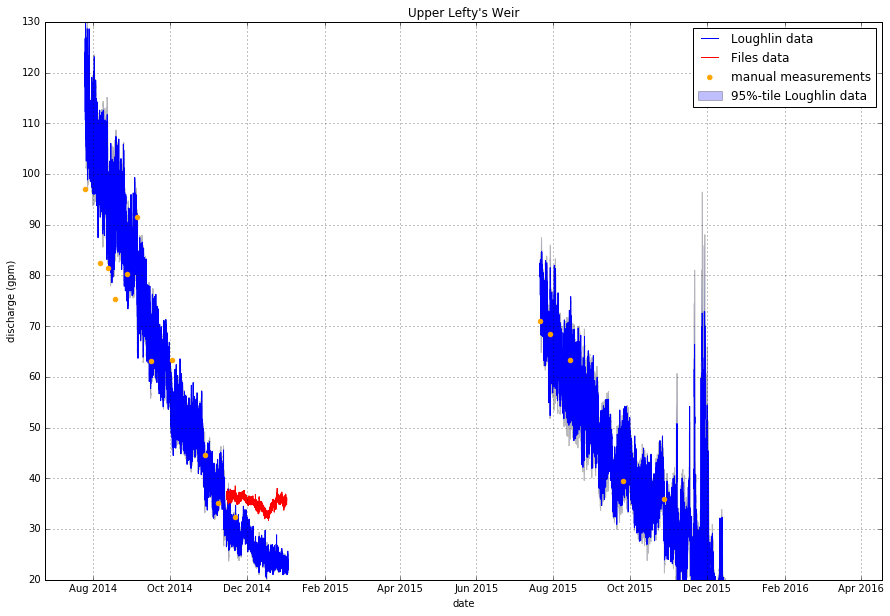

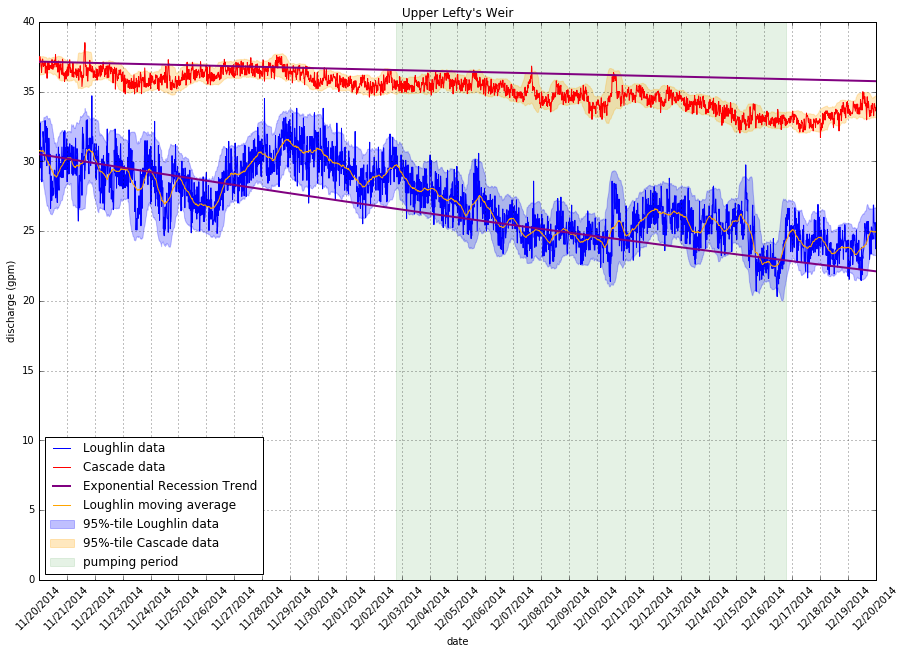

In [131]:
Leftys = Leftys[Leftys.index > pd.datetime(2014,7,20)]

rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')

plt.figure()
x = Leftys.index.to_datetime()
y1 = Leftys['UL_LW_Q_gpm']
y2 = Leftys['UL_JF_Q_gpm']
x3 = UL_manual.index.to_datetime()
y3 = UL_manual['UL_bucket_Q_gpm']

print y1.corr(y2, method='pearson')
print y1.corr(y2, method='kendall')
print y1.corr(y2, method='spearman')

y4 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).mean()
y6 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).std()
y9 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).quantile(0.95)
y10 = Leftys['UL_LW_Q_gpm'].rolling(window=48, center=True).quantile(0.05)
y7 = y4+y6*2
y8 = y4-y6*2

Jy4 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).mean()
Jy6 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).std()
Jy9 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).quantile(0.95)
Jy10 = Leftys['UL_JF_Q_gpm'].rolling(window=48, center=True).quantile(0.05)
Jy7 = Jy4+Jy6*2
Jy8 = Jy4-Jy6*2


plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='Files data')
plt.scatter(x3,y3, color='orange', zorder=3, label='manual measurements' )
plt.fill_between(x, y8, y7, alpha=0.25, zorder=1, label= '95%-tile Loughlin data')
plt.title('Upper Lefty\'s Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
plt.yticks(np.arange(0, 140.0, 10))
plt.ylim(20.0, 130.0)
plt.legend( scatterpoints=1)



smallerL = Leftys[(Leftys.index >= pd.datetime(2014,11,20))&(Leftys.index <= pd.datetime(2014,12,20))]

xjules = smallerL.index.to_julian_date()
smallerL['rec'] = smallerL['UL_LW_Q_gpm'][0] - 0.5*(xjules-xjules[0]) 
smallerL['LWlogrecs'] = smallerL['UL_LW_Q_gpm'][0]*np.exp(-1*(xjules-xjules[0])*0.01072784)
smallerL['JFlogrecs'] = smallerL['UL_JF_Q_gpm'][0]*np.exp(-1*(xjules-xjules[0])*0.00128222)
#plt.figure()
#plt.plot(smallerL.index, smallerL.logrecs)

plt.figure()
#plt.plot(smallerL.index, smallerL.rec, label='linear recession trend')
plt.plot(x,y1, color='blue', zorder=2, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=3, label='Cascade data')
plt.plot(smallerL.index, smallerL.LWlogrecs, color='purple', lw=2, label='Exponential Recession Trend', zorder=10)
plt.plot(smallerL.index, smallerL.JFlogrecs, color='purple', lw=2, zorder=10, label='')
plt.plot(x,y4, color='orange', zorder=4, label='Loughlin moving average')
plt.fill_between(x, y8, y7, alpha=0.25, zorder=1, color='blue',label= '95%-tile Loughlin data')
plt.fill_between(x, Jy8, Jy7, alpha=0.25, zorder=1, color='orange',label= '95%-tile Cascade data')
plt.title('Upper Lefty\'s Weir')

plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
plt.fill_between(pd.date_range('12/2/2014 19:00','12/16/2014 19:00'),0,150, color='green',alpha=.1,label="pumping period", zorder=0)
#plt.yticks(np.arange(0, 40.0, 1))
dtrng = pd.date_range('11/20/2014','12/20/2014',freq='D')
datelabels = [d.strftime('%m/%d/%Y') for d in dtrng]
plt.xticks(dtrng,datelabels,rotation=45)
plt.ylim(0, 40.0)
plt.xlim('11/20/2014','12/20/2014')
plt.legend(loc=3, scatterpoints=1)
print(y6.mean())
print(Jy6.mean())
plt.savefig(figout+"Upper Leftys Discharge and recession during test period.svg")

(285.11653005926837, 0.0)
[ 0.00048082]


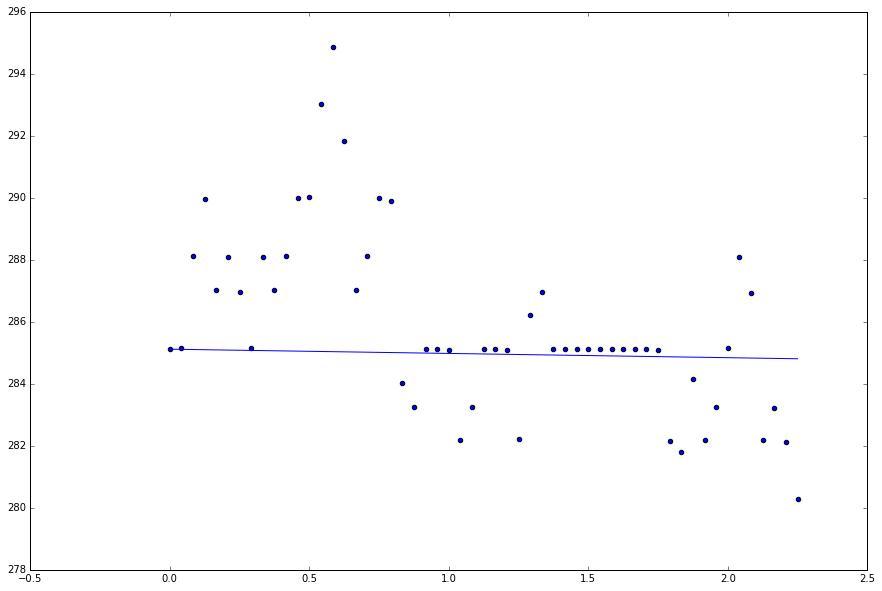

In [132]:
start = 3335
stop = 3390
y1 = LowLeftysDaily['LL_JF_Q_lpm'][start:stop]
x1 = ((LowLeftysDaily.index.dayofyear+(LowLeftysDaily.index.hour/24.0))-(LowLeftysDaily.index.dayofyear[start]+(LowLeftysDaily.index.hour[start]/24.0)))[start:stop]
print(y1[0],x1[0])
popt1,pcov1 = fitit(x1, y1, y1[0])
plt.scatter(x1,y1)
plt.plot(x1,[y1[0]*np.exp(-1*popt1[0]*i) for i in x1])
print(popt1)

-17.181830775676644

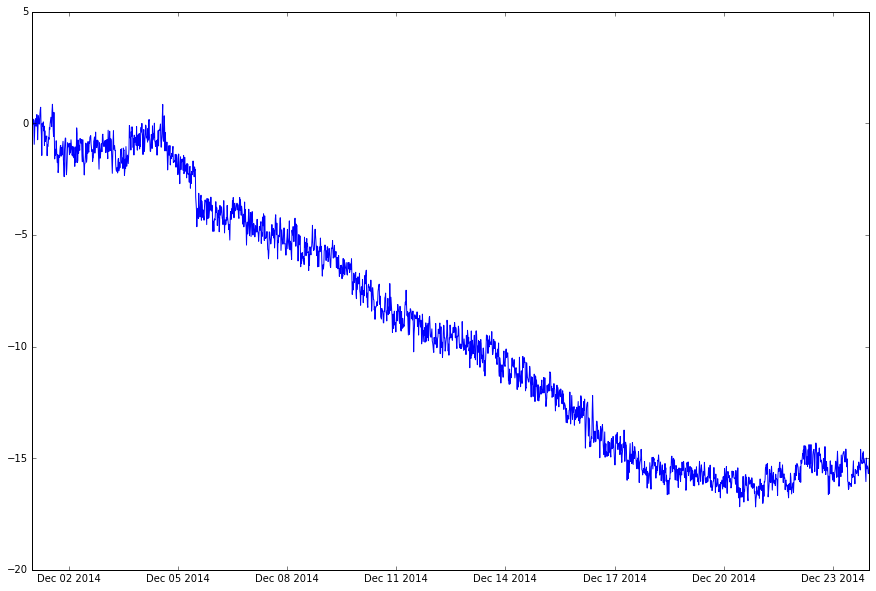

In [133]:
popt, x1, x2, y1, y2 = recession(LowLeftys,'LL_JF_Q_gpm',[2014,12,1],[2014,12,24])
corr = [y1[i] - y1[0]*np.exp(-1*0.001*x1[i]) for i in range(len(x1))]
plt.plot(x2,corr)
#plt.plot(x2,y1)
np.min(corr)

(291.86439858089938, 0.0)
[-0.03022125]


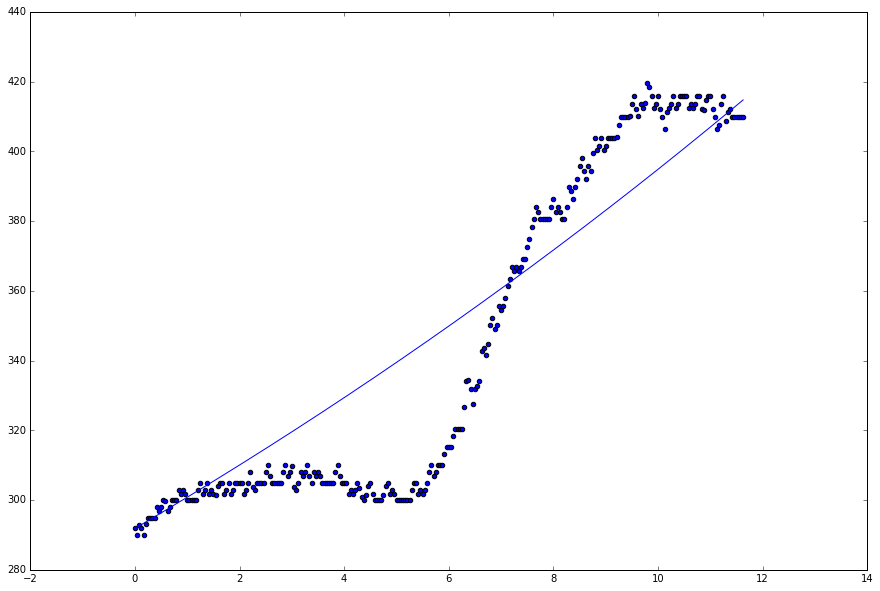

In [134]:
start = 3520
stop = 3800
y1 = LowLeftysDaily['LL_JF_Q_lpm'][start:stop]
x1 = ((LowLeftysDaily.index.dayofyear+(LowLeftysDaily.index.hour/24.0))-(LowLeftysDaily.index.dayofyear[start]+(LowLeftysDaily.index.hour[start]/24.0)))[start:stop]
print(y1[0],x1[0])
popt1,pcov1 = fitit(x1, y1, y1[0])
plt.scatter(x1,y1)
plt.plot(x1,[y1[0]*np.exp(-1*popt1[0]*i) for i in x1])
print(popt1)

(294.90440304562281, 0.0)
[ 0.00420503]


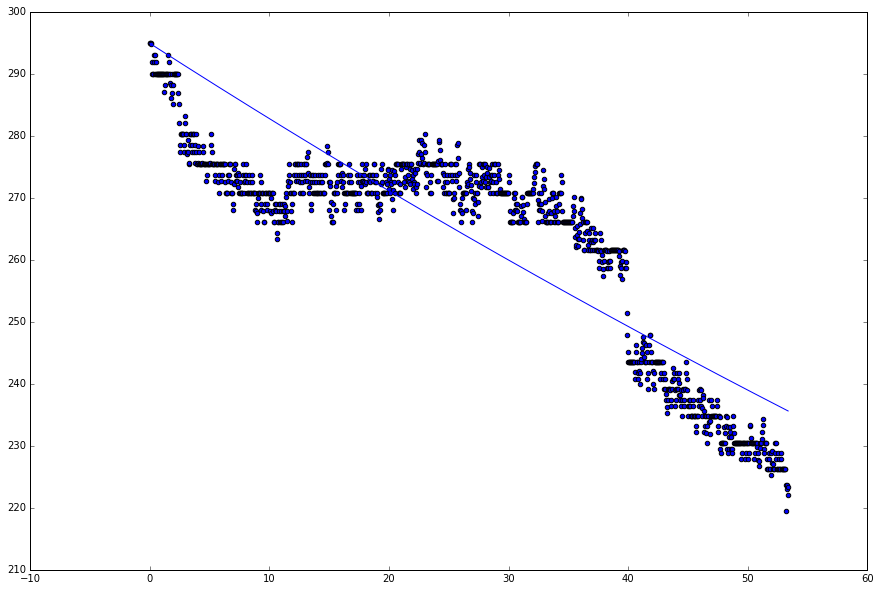

In [135]:
start = 6200
stop = -1
y1 = LowLeftysDaily['LL_JF_Q_lpm'][start:stop]
x1 = ((LowLeftysDaily.index.dayofyear+(LowLeftysDaily.index.hour/24.0))-(LowLeftysDaily.index.dayofyear[start]+(LowLeftysDaily.index.hour[start]/24.0)))[start:stop]
print(y1[0],x1[0])
popt1,pcov1 = fitit(x1, y1, y1[0])
plt.scatter(x1,y1)
plt.plot(x1,[y1[0]*np.exp(-1*popt1[0]*i) for i in x1])
print(popt1)

                            OLS Regression Results                            
Dep. Variable:            LL_JF_Q_gpm   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 3.419e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:44:55   Log-Likelihood:                -14043.
No. Observations:                6187   AIC:                         2.809e+04
Df Residuals:                    6185   BIC:                         2.810e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7.272e+05   3932.442    184.926      0.0

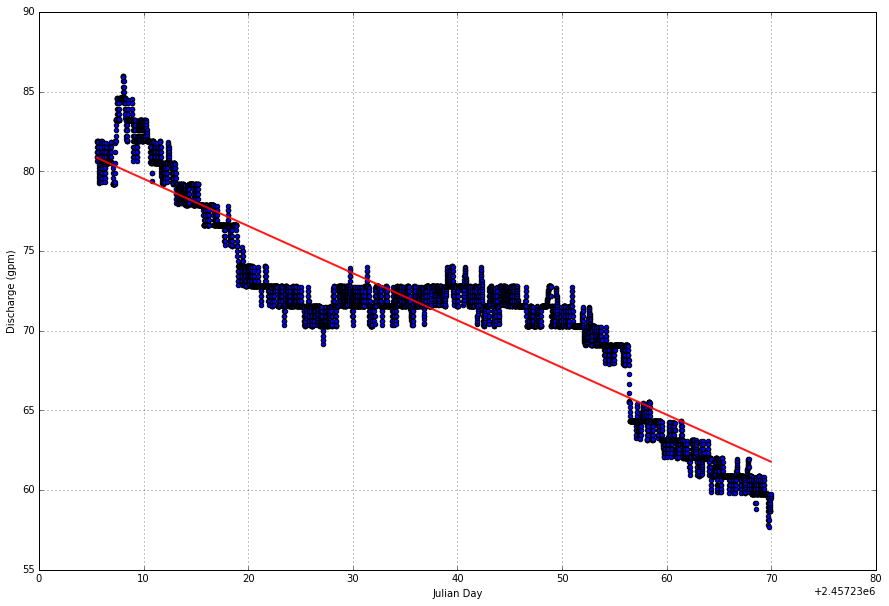

In [136]:
LowLeft = LowLeftys[(LowLeftys.index.to_datetime()>pd.datetime(2015,8,1))]
x0 = LowLeft.index.to_julian_date()
x = sm.add_constant(x0)
y = LowLeft['LL_JF_Q_gpm']

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')
plt.xlabel('Julian Day')
plt.ylabel('Discharge (gpm)')
#plt.xlim(2456860,2456990)
#plt.xticks(np.arange(2456860,2456995, 5))
#plt.yticks(np.arange(0,145, 5))
plt.grid()

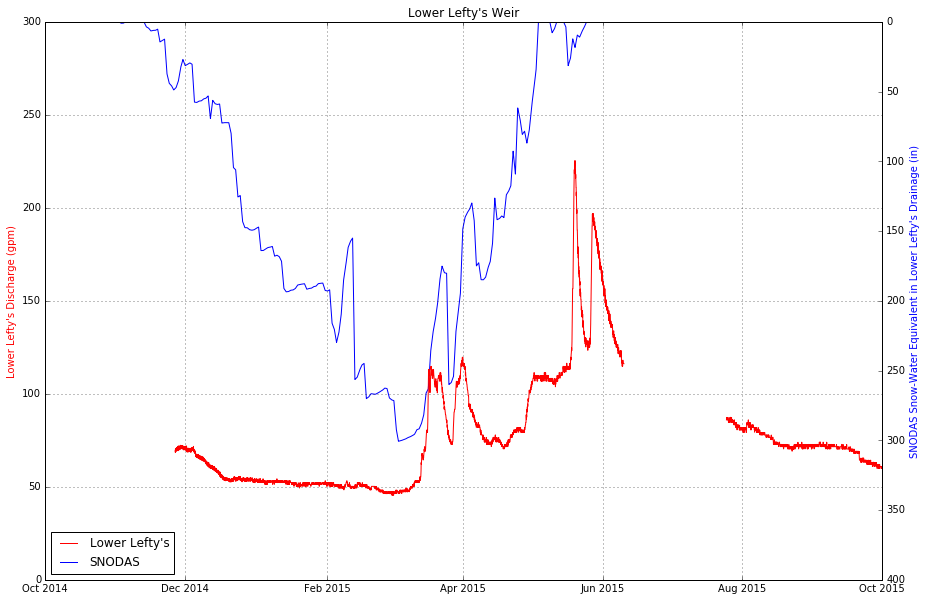

In [137]:
plt.figure()
x = LowLeftys.index.to_datetime()
y = LowLeftys['LL_JF_Q_gpm']

x1 = SNODAS.index.to_datetime()
y1 = SNODAS[u'LeftysCreek']


fig = plt.figure()
plt.title('Lower Lefty\'s Weir')
ax = fig.add_subplot(111)
lns1 = ax.plot(x,y, zorder=10, color='red',label='Lower Lefty\'s')

ax2 = ax.twinx()
lns2 = ax2.plot(x1,y1, zorder=2, color='blue',label='SNODAS')
plt.xlim('10/1/2014','10/1/2015')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3)
ax.set_ylim(0,300)
ax.set_ylabel('Lower Lefty\'s Discharge (gpm)',color='red')
ax2.set_ylabel('SNODAS Snow-Water Equivalent in Lower Lefty\'s Drainage (in)',color='blue')
ax2.set_ylim(400,0)
plt.xlabel('date')
ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2 
ax.patch.set_visible(False) # hide the 'canvas' 
ax.grid()
plt.savefig(rootlocal+"LowerLeftysLongterm.pdf")

71
71
                            OLS Regression Results                            
Dep. Variable:           UL_man_Q_gpm   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7.475
Date:                Wed, 15 Jun 2016   Prob (F-statistic):            0.00794
Time:                        07:44:57   Log-Likelihood:                -301.78
No. Observations:                  71   AIC:                             607.6
Df Residuals:                      69   BIC:                             612.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.086e+05   3.97e+04      2.735   

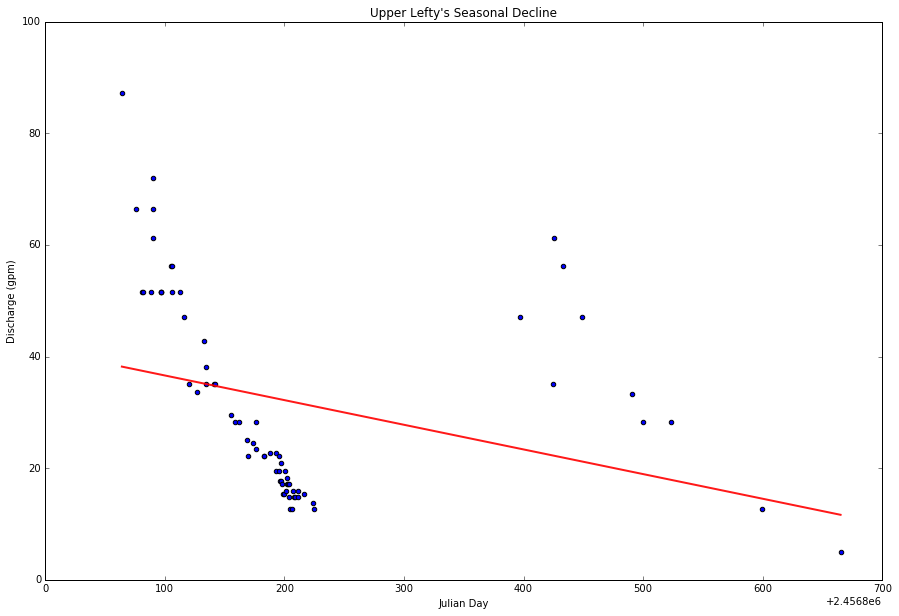

In [138]:
UL_manual['UL_man_Q_gpm'] = 1122*UL_manual['UL_vdepth_ft']**2.5
UL_man_V = UL_manual.dropna(subset=['UL_man_Q_gpm'])

plt.figure()
x0 = UL_man_V.index.to_julian_date()
y = UL_man_V['UL_man_Q_gpm']

x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Upper Lefty\'s Seasonal Decline')
plt.ylabel('Discharge (gpm)')
plt.xlabel('Julian Day')

2014-07-25 12:30:00
2016-03-17 13:45:00
       UL_vdepth_in  UL_depth_in  UL_bucket_Q_gpm  UL_vdepth_ft  UL_vdepth_cm  \
count     18.000000    18.000000        18.000000     18.000000     18.000000   
mean       3.139333     3.398750        58.209720      0.261611      7.973907   
std        0.722151     0.777438        26.044901      0.060179      1.834265   
min        1.375000     1.560000         6.668387      0.114583      3.492500   
25%        2.750000     2.940000        36.841428      0.229167      6.985000   
50%        3.375000     3.743750        63.341782      0.281250      8.572500   
75%        3.593750     4.005000        79.077274      0.299479      9.128125   
max        4.320000     4.400000        97.014925      0.360000     10.972800   

       UL_man_Q_gpm  
count     18.000000  
mean      42.833340  
std       20.584716  
min        4.986508  
25%       28.207947  
50%       47.067831  
75%       55.092634  
max       87.246720  
18
18
                          

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


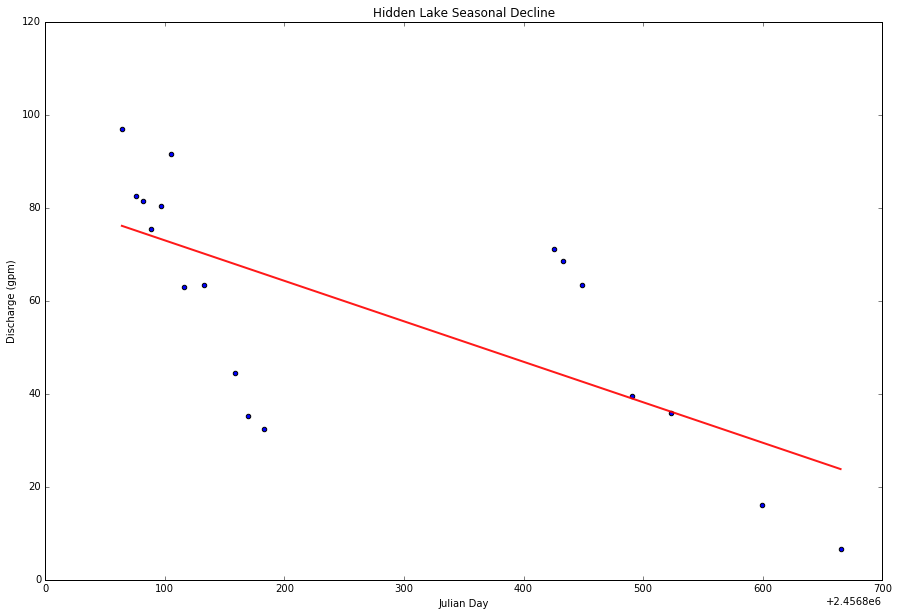

In [139]:
plt.figure()
UL_man = UL_manual.dropna(subset=['UL_bucket_Q_gpm'])
x0 = UL_man.index.to_julian_date()
y = UL_man['UL_bucket_Q_gpm']

print min(UL_man.index)
print max(UL_man.index)
print UL_man.describe()

x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Hidden Lake Seasonal Decline')
plt.ylabel('Discharge (gpm)')
plt.xlabel('Julian Day')

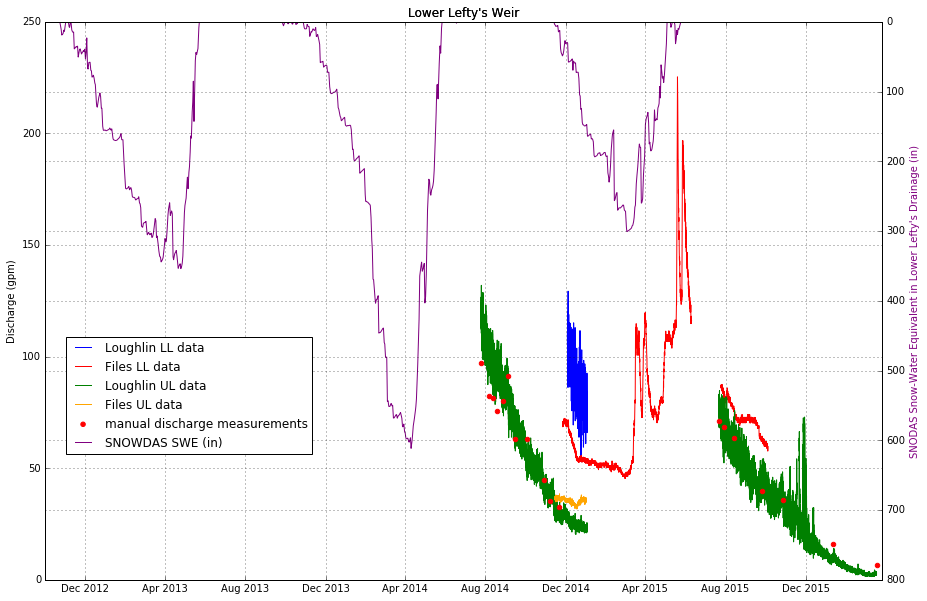

In [140]:
plt.figure()
x = LowLeftys.index.to_datetime()
y1 = LowLeftys['LL_LW_Q_gpm']
y2 = LowLeftys['LL_JF_Q_gpm']

x5 = UL_manual.index.to_datetime()
y5 = UL_manual['UL_bucket_Q_gpm']

x6 = SNODAS.index.to_datetime()
y6 = SNODAS[u'LeftysCreek']

x2 = Leftys.index.to_datetime()
y3 = Leftys['UL_LW_Q_gpm']
y4 = Leftys['UL_JF_Q_gpm']
#y3 = pd.rolling_mean(LowLeftys['LL_LW_Q_gpm'], window=86, center=True)
#y4 = pd.rolling_mean(LowLeftys['LL_JF_Q_gpm'], window=48, center=True)

fig = plt.figure()
plt.title('Lower Lefty\'s Weir')
ax = fig.add_subplot(111)

#lns1 = ax.plot(x,y, zorder=10, color='red',label='Lower Lefty\'s')

ax.scatter(x5,y5, color='red',zorder=5, label='manual discharge measurements')
ax.plot(x,y1, color='blue', zorder=2, label='Loughlin LL data')
ax.plot(x,y2, color='red', zorder=3, label='Files LL data')
ax.plot(x2,y3, color='green', linewidth=1, zorder=3, label='Loughlin UL data')
ax.plot(x2,y4, color='orange',  linewidth=1, zorder=4, label='Files UL data')
ax.set_ylim(0,250)
ax2 = ax.twinx()
ax2.plot(x6,y6, color = 'purple', label = 'SNOWDAS SWE (in)')
ax2.set_ylabel('SNODAS Snow-Water Equivalent in Lower Lefty\'s Drainage (in)',color='purple')
ax.set_ylabel('Discharge (gpm)')
ax2.set_ylim(800,0)
plt.xlabel('date')
ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2 
ax.patch.set_visible(False) # hide the 'canvas' 
ax.grid()
plt.title('Lower Lefty\'s Weir')
#plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

x_value = -0.1    #Offset by eye
y_value = 0.1
axbox = ax.get_position()
xpos = axbox.x0 + x_value
ypos = axbox.y0 + y_value

ax.legend(h1+h2, l1+l2, loc = (xpos, ypos), scatterpoints=1)
plt.savefig(rootlocal+"LowerLeftysMultLongTerm.pdf")

In [141]:
LowLeftysDrop = ['LL_LW_p_cm', 'dpLL_LW_p_cm', 'maLL_LW_p_cm', 'mstLL_LW_p_cm', 'UL_BP_LW_p_cm', 'LL_LW_p_ft', 
                            'LL_JF_p_PSI', 'LL_JF_dp_PSI', 'dpLL_JF_p_PSI', 'maLL_JF_p_PSI', 'mstLL_JF_p_PSI', 
                            'LL_JF_p_ft', 'LL_JF_h_ft', 'LL_LW_h_ft', 'UL_BP_LW_t_C', 'UL_BP_LW_p_ft']


In [142]:
LowLeftys = nodups(LowLeftys,All)

In [143]:
list(LowLeftys.columns.values)

['LL_LW_t_C',
 'LL_JF_t_C',
 'LL_LW_Q_gpm',
 'LL_JF_Q_gpm',
 'LL_JF_Q_cfs',
 'LL_LW_Q_cfs',
 'LL_LW_Q_lpm',
 'LL_JF_Q_lpm']

Merge existing datasets.

In [144]:
All = pd.merge(All, LowLeftys, left_index=True, right_index=True, how='outer')

In [145]:
list(All.columns.values)

['USU_Avon_BP_mmHg_x',
 'USU_Avon_BP_mmHg_y',
 'USU_SF_PPT_in',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'USU_SF_BD_h_ft',
 'Site Id',
 'WTEQ.I-1 (in) ',
 'PREC.I-1 (in) ',
 'TOBS.I-1 (degC) ',
 'SNWD.I-1 (in) ',
 'SMS.I-1:-2 (pct)  (silt)',
 'SMS.I-1:-8 (pct)  (silt)',
 'SMS.I-1:-20 (pct)  (silt)',
 'STO.I-1:-2 (degC) ',
 'STO.I-1:-8 (degC) ',
 'STO.I-1:-20 (degC) ',
 'SAL.I-1:-2 (gram) ',
 'SAL.I-1:-8 (gram) ',
 'SAL.I-1:-20 (gram) ',
 'RDC.I-1:-2 (unit) ',
 'RDC.I-1:-8 (unit) ',
 'RDC.I-1:-20 (unit) ',
 'BATT.I-1 (volt) ',
 'Unnamed: 20',
 'SForkWolfCreek',
 'OtherQuartzite',
 'NorthForkofWolfCreek',
 'LeftysCreek',
 'JamesPeakFork',
 'HiddenLakeFork',
 'CobabeCreek',
 'NorthSide',
 'SouthSide',
 'UL_BP_LW_p_cm',
 'UL_BP_LW_p_ft',
 'UL_BP_LW_t_C',
 'UL_JF_Q_cfs',
 'UL_JF_Q_gpm',
 'UL_JF_t_C',
 'UL_LW_Q_cfs',
 'UL_LW_Q_gpm',
 'UL_LW_Q_lpm',
 'UL_LW_t_C',
 'LL_LW_t_C',
 'LL_JF_t_C',
 'LL_LW_Q_gpm',
 'LL_JF_Q_gpm',
 'LL_JF_Q_cfs',
 'LL_LW_Q_cfs',
 'LL_LW_Q_lpm',
 'LL_JF_Q_lpm']

## Hidden Lake Spring

### Importing and Converting Hidden Lake Spring Data

[To top of page](#top)

Import the Hidden Lake weir data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hidden></a>

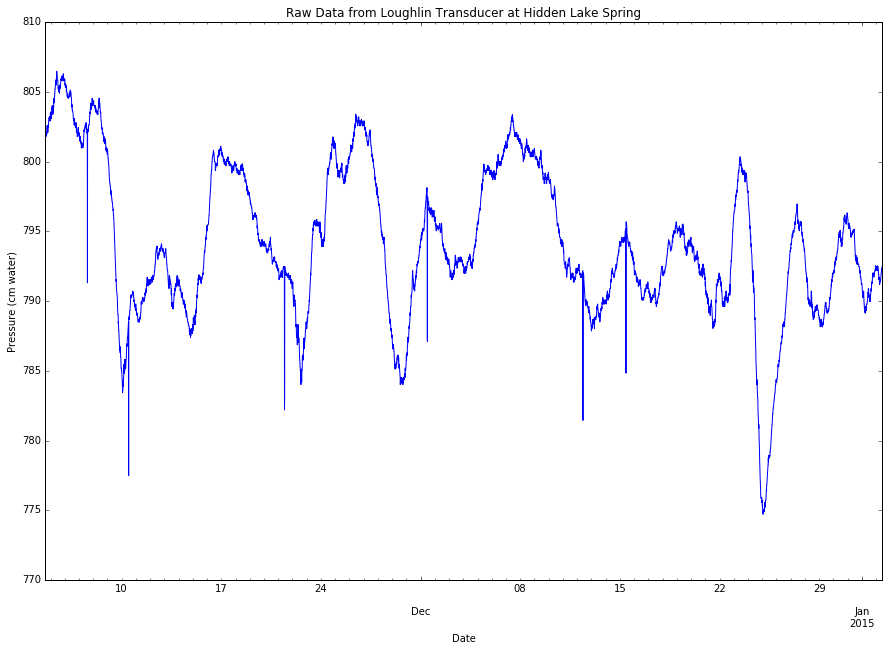

In [146]:
HL_LW = pd.read_csv(Hidden_Lake_Loughlin, 
                    index_col=0, skiprows=53, skipfooter=1, parse_dates=True, 
                    usecols=[0,1,2], names=['dt','HL_LW_p_cm','HL_LW_t_C'], engine='python')

HL_LW['HL_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Raw Data from Loughlin Transducer at Hidden Lake Spring')

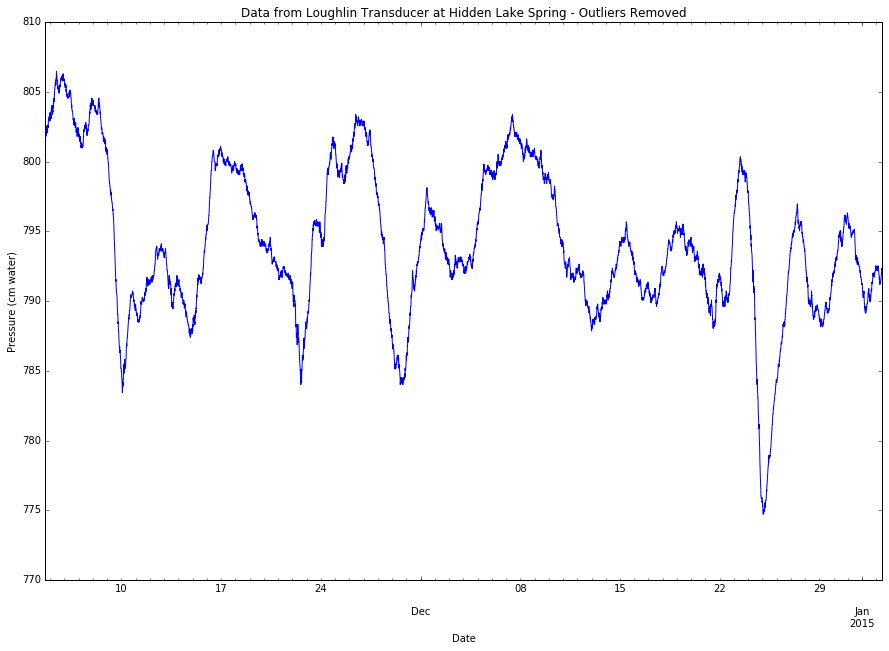

In [147]:
HL_LW = wt.smoother(HL_LW, 'HL_LW_p_cm', 50, 3)
HL_LW = wt.smoother(HL_LW, 'HL_LW_p_cm', 50, 3) # passed twice
HL_LW['HL_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Data from Loughlin Transducer at Hidden Lake Spring - Outliers Removed')

Import the Hidden Lake barometric pressure data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hiddenbp></a>

In [148]:
HL_BP_LW = pd.read_csv(Hidden_Lake_Barometer_Loughlin, 
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, names=['dt','HL_BP_LW_p_cm','HL_BP_LW_t_C'], 
                    engine='python')

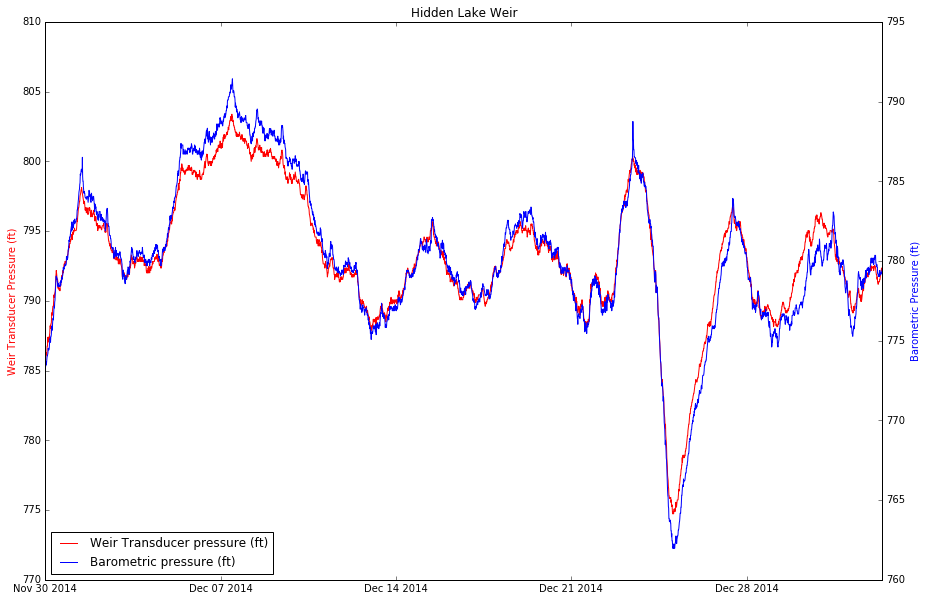

In [149]:
plt.figure()
x1 = HL_LW.index.to_datetime()
y1 = HL_LW['HL_LW_p_cm']

x2 = HL_BP_LW.index.to_datetime()
y2 = HL_BP_LW['HL_BP_LW_p_cm']

fig, ax1 = plt.subplots()
plt.title('Hidden Lake Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [150]:
HidLake = pd.merge(HL_LW, HL_BP_LW, left_index=True, right_index=True, how='outer')

HidLake['HL_LW_p_ft'] =(HidLake['HL_LW_p_cm'] - HidLake['HL_BP_LW_p_cm'])*0.0328084
HidLake['HL_BP_LW_p_ft'] = HidLake['HL_BP_LW_p_cm']*0.0328084

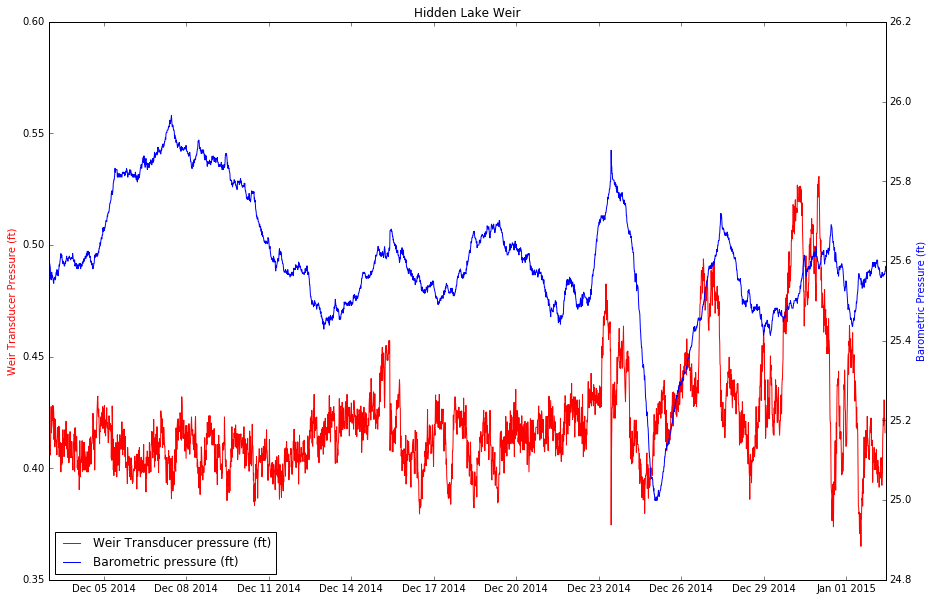

In [151]:
x = HidLake.index.to_datetime()
y1 = HidLake['HL_LW_p_ft']
y2 = HidLake['HL_BP_LW_p_ft']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Hidden Lake Weir')
ax1.plot(x,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('12/3/2014',HidLake.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

Import the Hidden Lake wier data from John Files. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hiddenfiles></a>

In [152]:
HL_JF = pd.read_csv(Hidden_Lake_John_Files, 
                     index_col=0, skiprows=89, skipfooter=1, usecols=[0,2,3], parse_dates=True, 
                     names=['dt','HL_JF_p_PSI','HL_JF_t_C'], engine='python')

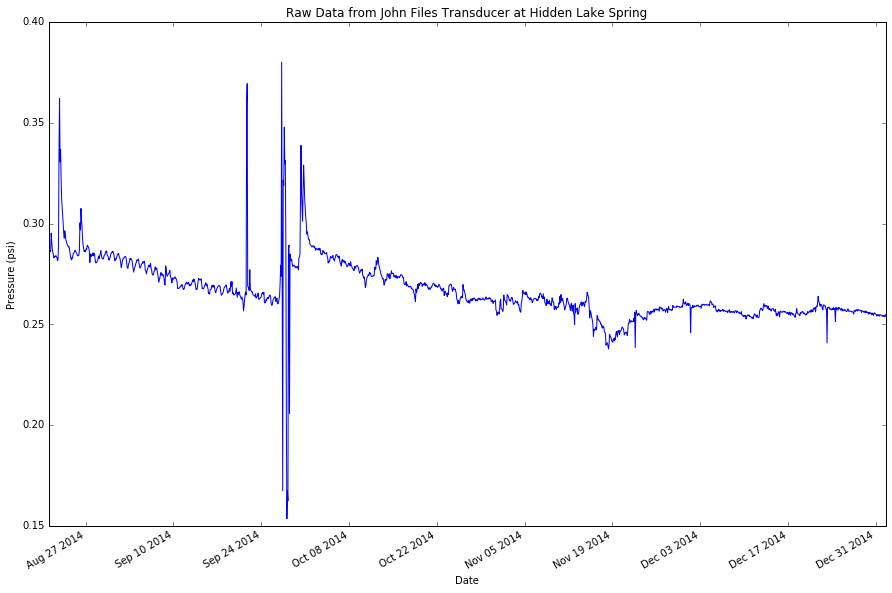

In [153]:
HL_JF['HL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Raw Data from John Files Transducer at Hidden Lake Spring')

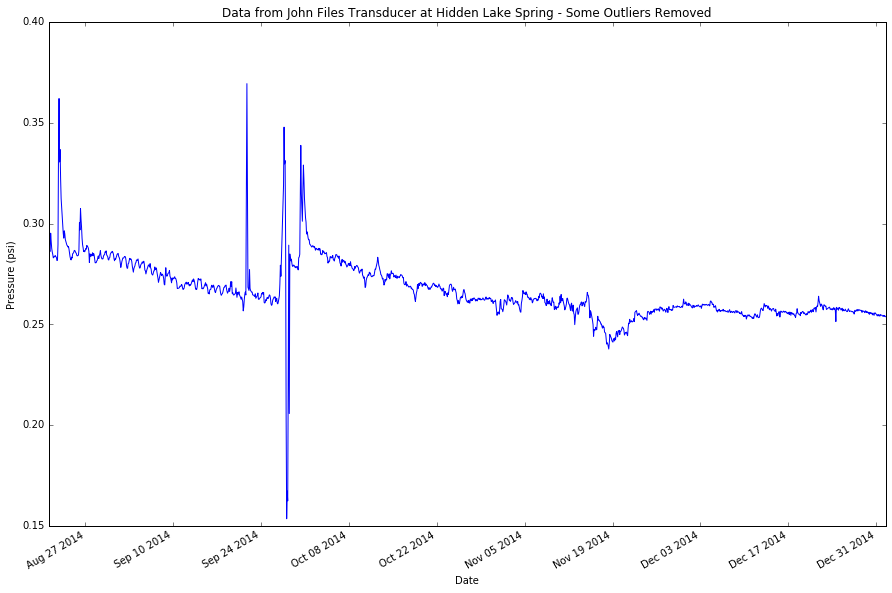

In [154]:
HL_JF = wt.smoother(HL_JF, 'HL_JF_p_PSI', 100, 3)
HL_JF['HL_JF_p_PSI'].plot()
plt.ylabel('Pressure (psi)')
plt.xlabel('Date')
plt.title('Data from John Files Transducer at Hidden Lake Spring - Some Outliers Removed')

In [155]:
HL_JF = HL_JF.resample('1Min', how='mean')
HL_JF = HL_JF.interpolate(method='time', limit=480)
HL_JF = HL_JF.resample('15Min', how='mean', base=0)

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [156]:
HidLake = pd.merge(HidLake, HL_JF, left_index=True, right_index=True, how='outer')

Import the manual data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hiddenman></a>

In [157]:
HL_manual = pd.read_excel(Hidden_Lake_Manual, 'HiddenLakeWeir', index_col=0, 
                          parse_cols=[0,1,2], skiprows=0, na_values=['NA',''],
                          names=['HL_vdepth_in','HL_depth_in'], skip_footer=0)
HL_manual['HL_offset_ft'] = (HL_manual['HL_depth_in']/12-HL_manual['HL_vdepth_in']/12).mean()
HL_manual['HL_depth_ft'] = HL_manual['HL_vdepth_in']/12+HL_manual['HL_offset_ft']
HL_manual = HL_manual.sort_index()
HL_manual = HL_manual[ HL_manual.index.to_datetime()>pd.datetime(2014,7,25)]
print HL_manual

                     HL_vdepth_in  HL_depth_in  HL_offset_ft  HL_depth_ft
date_time                                                                
2014-08-18 11:00:00        2.5000          NaN      0.167969     0.376302
2014-08-20 09:20:00        2.7500          NaN      0.167969     0.397135
2014-08-20 11:00:00        2.7500          NaN      0.167969     0.397135
2014-08-22 11:00:00        2.5000          NaN      0.167969     0.376302
2014-08-27 11:00:00        2.6250          NaN      0.167969     0.386719
2014-08-29 09:36:00        2.9000          NaN      0.167969     0.409635
2014-08-29 09:36:00        2.7500          NaN      0.167969     0.397135
2014-09-04 11:00:00        2.8125          NaN      0.167969     0.402344
2014-09-05 10:23:00        2.7500          NaN      0.167969     0.397135
2014-09-12 11:55:00        2.6250          NaN      0.167969     0.386719
2014-09-15 11:00:00        2.3750       4.4375      0.167969     0.365885
2014-09-19 08:15:00        2.5000     

In [158]:
meanDiff = rollmeandiff(HL_manual,'HL_depth_ft',HidLake,'HL_LW_p_ft',5)
print meanDiff
HidLake['HL_LW_h_ft'] = HidLake['HL_LW_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


-0.074


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


In [159]:
HidLake['HL_JF_p_ft'] = HidLake['HL_JF_p_PSI']*2.307
meanDiff = rollmeandiff(HL_manual,'HL_depth_ft',HidLake,'HL_JF_p_ft',5)
print meanDiff
HidLake['HL_JF_h_ft'] = HidLake['HL_JF_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


-0.247


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


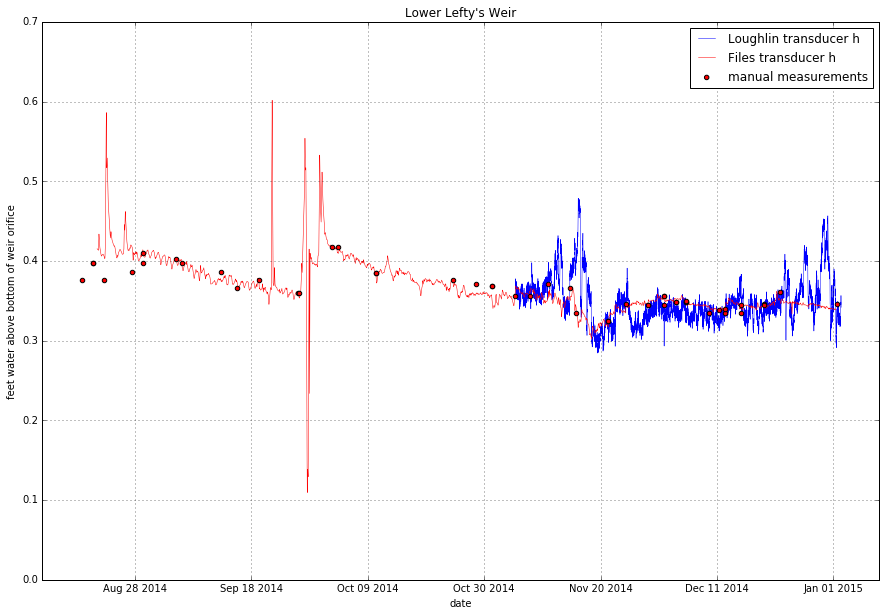

In [160]:
plt.figure()

x = HidLake.index.to_datetime()
y = HidLake['HL_LW_h_ft']

x1 = HL_manual.index.to_datetime()
y1 = HL_manual['HL_depth_ft']

y2 = HidLake['HL_JF_h_ft']

plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer h')
plt.plot(x, y2, zorder=2, c='red', linewidth=0.5, label='Files transducer h')
plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
plt.title('Lower Lefty\'s Weir')
plt.ylabel('feet water above bottom of weir orifice')
plt.xlabel('date')
plt.grid()
plt.legend(scatterpoints=1)


Once the transducer data were aligned with manual readings, we converted the height of water above the bottom of the weir orifice to discharge in both gpm and cfs.

To do this, we used equations from: U.S. Bureau of Reclamation, 2001, Water Measurement Manual - A water resources technical publication: online, http://www.usbr.gov/pmts/hydraulics_lab/pubs/wmm/.

For 90$^\circ$ v-notch weirs, the equation to calculate discharge from h is:
$$
Q= 1122\cdot h^{\frac{5}{2}}
$$
<ul>
  <li>h = feet above bottom of weir orifice</li>
  <li>Q = discharge in gpm</li>
</ul>

In [161]:
HidLake['HL_LW_Q_gpm'] = 1122*HidLake['HL_LW_h_ft']**2.5
HidLake['HL_JF_Q_gpm'] = 1122*HidLake['HL_JF_h_ft']**2.5
HidLake['HL_JF_Q_cfs'] = 0.00222800926*HidLake['HL_JF_Q_gpm']
HidLake['HL_LW_Q_cfs'] = 0.00222800926*HidLake['HL_LW_Q_gpm']

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=86,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=True).mean()


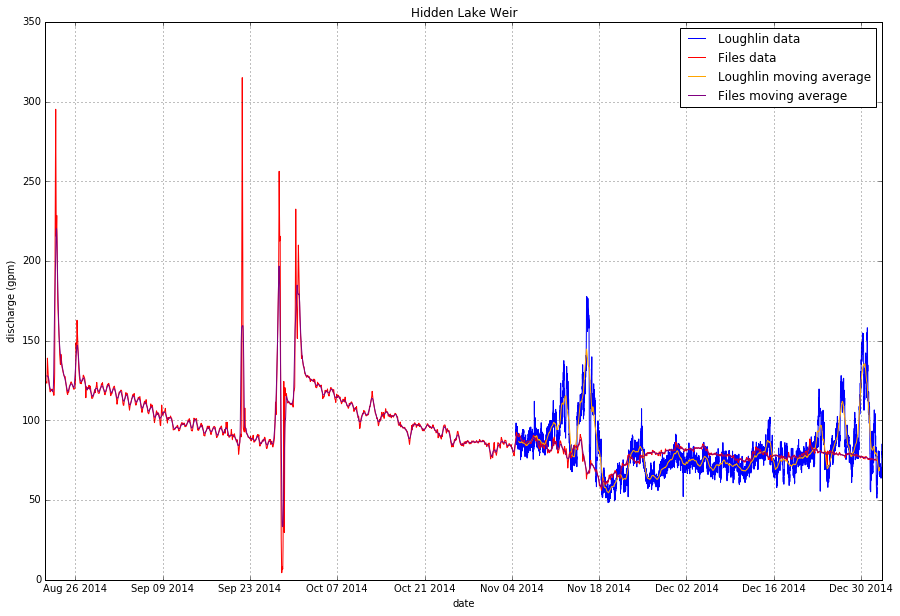

In [162]:
plt.figure()
x = HidLake.index.to_datetime()
y1 = HidLake['HL_LW_Q_gpm']
y2 = HidLake['HL_JF_Q_gpm']

y3 = pd.rolling_mean(HidLake['HL_LW_Q_gpm'], window=86, center=True)
y4 = pd.rolling_mean(HidLake['HL_JF_Q_gpm'], window=48, center=True)

plt.figure()
plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='Files data')
plt.plot(x,y3, color='orange', zorder=3, label='Loughlin moving average')
plt.plot(x,y4, color='purple', zorder=4, label='Files moving average')
plt.title('Hidden Lake Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()

plt.legend()

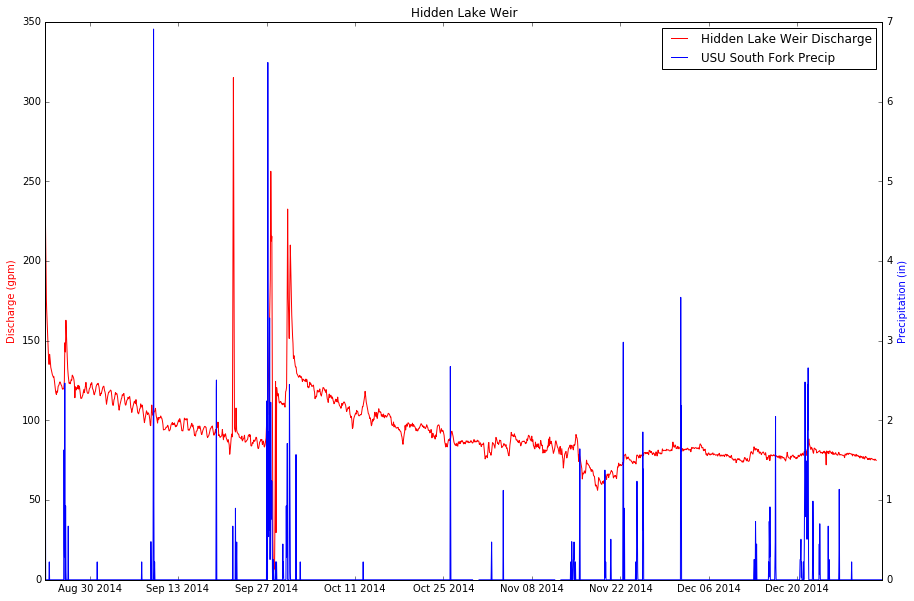

In [163]:

x1 = HidLake.index.to_datetime()
x2 = All.index.to_datetime()

y1 = HidLake['HL_JF_Q_gpm']
y2 = All['USU_SF_PPT_in']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Hidden Lake Weir')
ax1.plot(x1,y1,c='r',label='Hidden Lake Weir Discharge')
ax1.set_ylabel('Discharge (gpm)', color='r') 
ax2.set_ylabel('Precipitation (in)', color='b') 
ax2.plot(x2,y2,c='b',label='USU South Fork Precip')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('8/23/2014',HidLake.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=0)

plt.show()
plt.savefig(rootlocal+"HiddenLakeWeir.pdf")

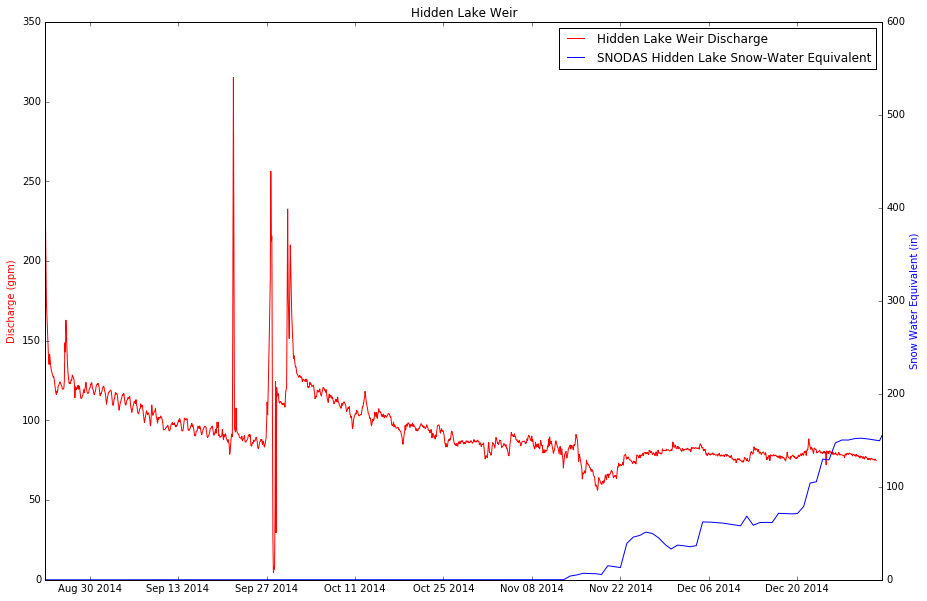

In [164]:

x1 = HidLake.index.to_datetime()
x2 = SNODAS.index.to_datetime()

y1 = HidLake['HL_JF_Q_gpm']
y2 = SNODAS['HiddenLakeFork']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Hidden Lake Weir')
ax1.plot(x1,y1,c='r',label='Hidden Lake Weir Discharge')
ax1.set_ylabel('Discharge (gpm)', color='r') 
ax2.set_ylabel('Snow Water Equivalent (in)', color='b') 
ax2.plot(x2,y2,c='b',label='SNODAS Hidden Lake Snow-Water Equivalent')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('8/23/2014',HidLake.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=0)

plt.show()
plt.savefig(rootlocal+"HiddenLakeWeir2.pdf")

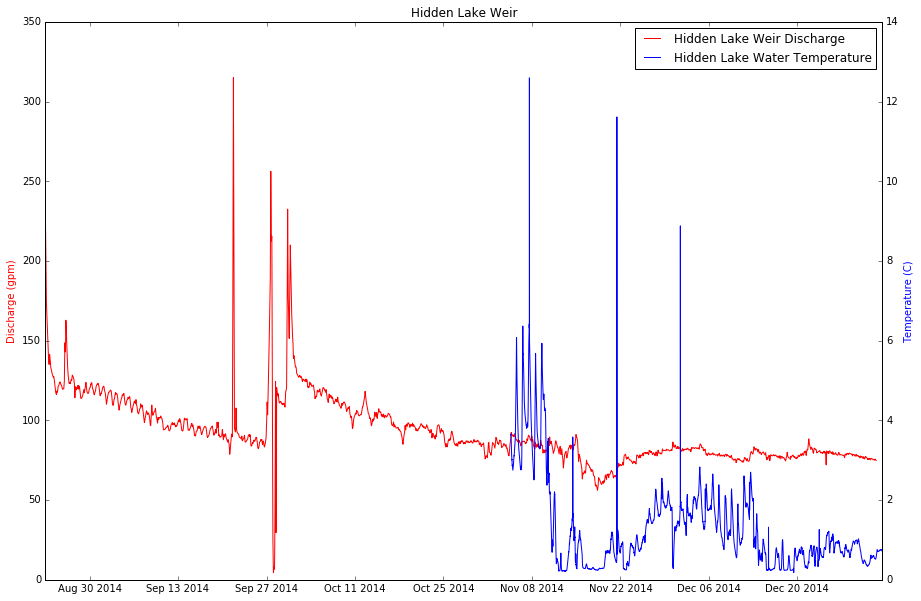

In [165]:
x1 = HidLake.index.to_datetime()
x2 = HidLake.index.to_datetime()

y1 = HidLake['HL_JF_Q_gpm']
y2 = HidLake['HL_LW_t_C']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Hidden Lake Weir')
ax1.plot(x1,y1,c='r',label='Hidden Lake Weir Discharge')
ax1.set_ylabel('Discharge (gpm)', color='r') 
ax2.set_ylabel('Temperature (C)', color='b') 
ax2.plot(x2,y2,c='b',label='Hidden Lake Water Temperature')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('8/23/2014',HidLake.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=0)

plt.show()

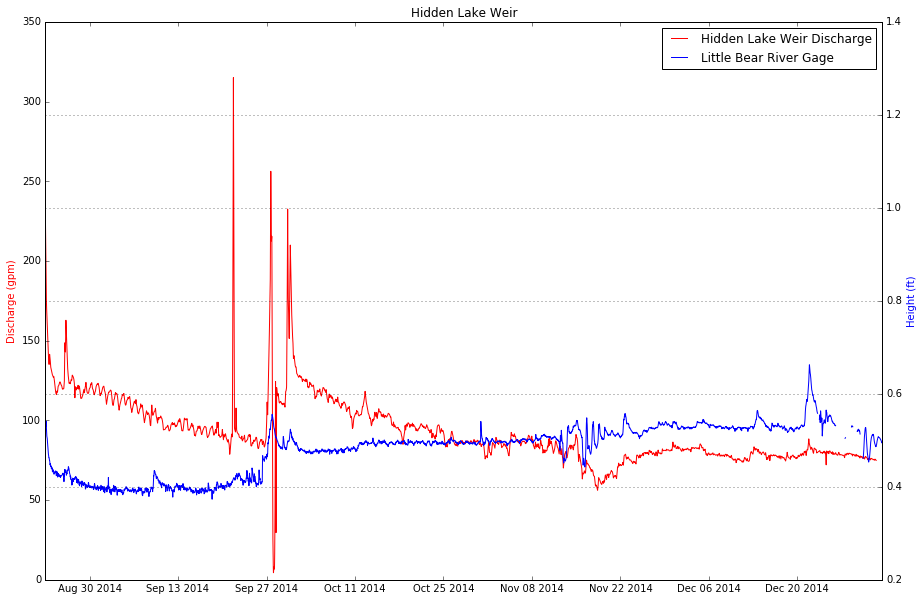

In [166]:
x1 = HidLake.index.to_datetime()
x2 = All.index.to_datetime()

y1 = HidLake['HL_JF_Q_gpm']
y2 = All['USU_SF_AD_h_ft']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Hidden Lake Weir')
ax1.plot(x1,y1,c='r',label='Hidden Lake Weir Discharge')
ax1.set_ylabel('Discharge (gpm)', color='r') 
ax2.set_ylabel('Height (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Little Bear River Gage')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('8/23/2014',HidLake.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=0)
plt.grid(which='major', axis='both')
plt.show()

2207
2207
                            OLS Regression Results                            
Dep. Variable:            HL_JF_Q_gpm   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.822e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:45:35   Log-Likelihood:                -5779.6
No. Observations:                2207   AIC:                         1.156e+04
Df Residuals:                    2205   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.533e+06   2.62e+04    134.99

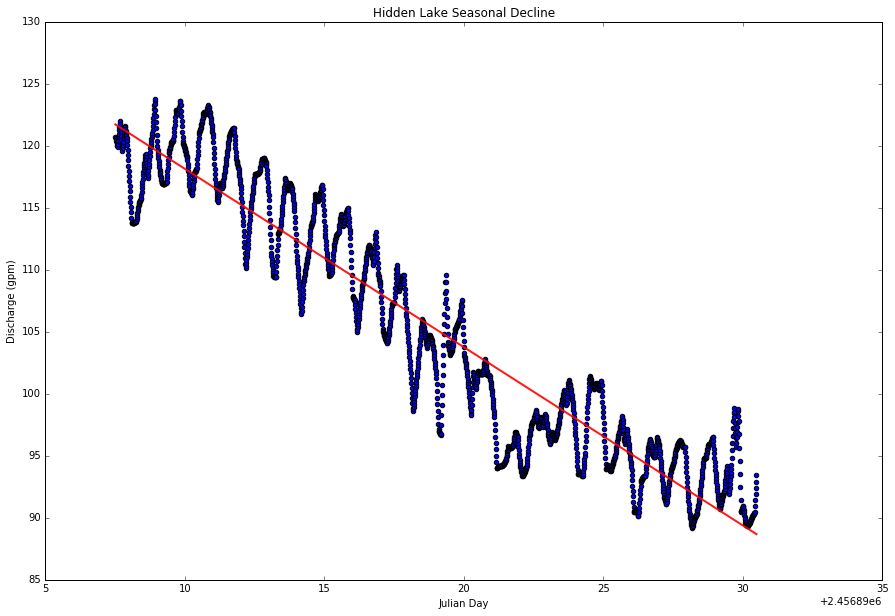

In [167]:
aHidLake = HidLake[(HidLake.index.to_datetime() < pd.datetime(2014,9,20))&(HidLake.index.to_datetime() > pd.datetime(2014,8,28))]
x0 = aHidLake.index.to_julian_date()
y = aHidLake['HL_JF_Q_gpm']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Hidden Lake Seasonal Decline')
plt.ylabel('Discharge (gpm)')
plt.xlabel('Julian Day')

3743
3743
                            OLS Regression Results                            
Dep. Variable:            HL_JF_Q_gpm   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.582e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:45:35   Log-Likelihood:                -10951.
No. Observations:                3743   AIC:                         2.191e+04
Df Residuals:                    3741   BIC:                         2.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.026e+06   1.61e+04    125.79

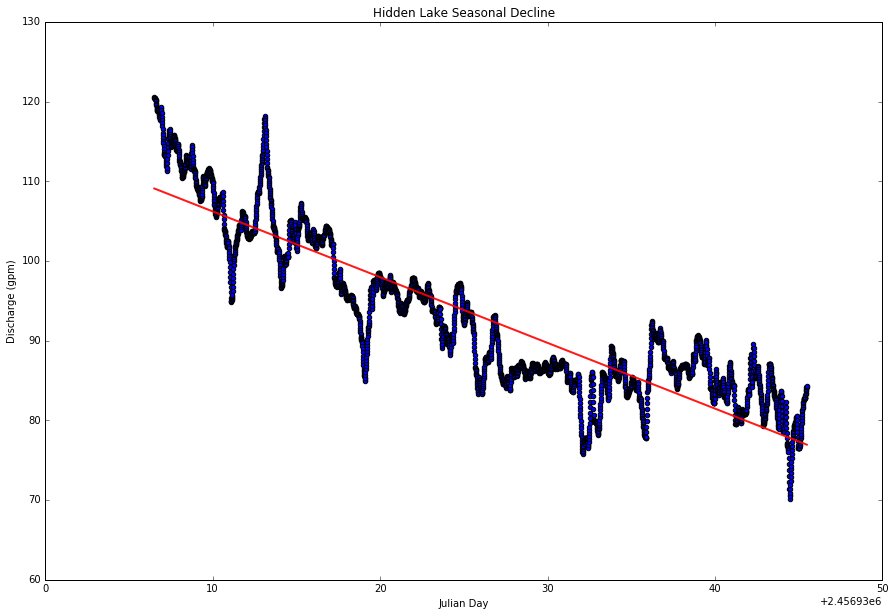

In [168]:
bHidLake = HidLake[(HidLake.index.to_datetime() < pd.datetime(2014,11,14))&(HidLake.index.to_datetime() > pd.datetime(2014,10,6))]
x0 = bHidLake.index.to_julian_date()
y = bHidLake['HL_JF_Q_gpm']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Hidden Lake Seasonal Decline')
plt.ylabel('Discharge (gpm)')
plt.xlabel('Julian Day')

In [169]:
HidLake = nodups(HidLake,All)

In [170]:
list(HidLake.columns.values)

['HL_LW_t_C',
 'HL_BP_LW_p_cm',
 'HL_BP_LW_t_C',
 'HL_BP_LW_p_ft',
 'HL_JF_t_C',
 'HL_LW_Q_gpm',
 'HL_JF_Q_gpm',
 'HL_JF_Q_cfs',
 'HL_LW_Q_cfs']

In [171]:
All = pd.merge(All, HidLake, left_index=True, right_index=True, how='outer')

In [172]:
#del (HidLake,HL_JF,HL_LW)

In [173]:
list(All.columns.values)

['USU_Avon_BP_mmHg_x',
 'USU_Avon_BP_mmHg_y',
 'USU_SF_PPT_in',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'USU_SF_BD_h_ft',
 'Site Id',
 'WTEQ.I-1 (in) ',
 'PREC.I-1 (in) ',
 'TOBS.I-1 (degC) ',
 'SNWD.I-1 (in) ',
 'SMS.I-1:-2 (pct)  (silt)',
 'SMS.I-1:-8 (pct)  (silt)',
 'SMS.I-1:-20 (pct)  (silt)',
 'STO.I-1:-2 (degC) ',
 'STO.I-1:-8 (degC) ',
 'STO.I-1:-20 (degC) ',
 'SAL.I-1:-2 (gram) ',
 'SAL.I-1:-8 (gram) ',
 'SAL.I-1:-20 (gram) ',
 'RDC.I-1:-2 (unit) ',
 'RDC.I-1:-8 (unit) ',
 'RDC.I-1:-20 (unit) ',
 'BATT.I-1 (volt) ',
 'Unnamed: 20',
 'SForkWolfCreek',
 'OtherQuartzite',
 'NorthForkofWolfCreek',
 'LeftysCreek',
 'JamesPeakFork',
 'HiddenLakeFork',
 'CobabeCreek',
 'NorthSide',
 'SouthSide',
 'UL_BP_LW_p_cm',
 'UL_BP_LW_p_ft',
 'UL_BP_LW_t_C',
 'UL_JF_Q_cfs',
 'UL_JF_Q_gpm',
 'UL_JF_t_C',
 'UL_LW_Q_cfs',
 'UL_LW_Q_gpm',
 'UL_LW_Q_lpm',
 'UL_LW_t_C',
 'LL_LW_t_C',
 'LL_JF_t_C',
 'LL_LW_Q_gpm',
 'LL_JF_Q_gpm',
 'LL_JF_Q_cfs',
 'LL_LW_Q_cfs',
 'LL_LW_Q_lpm',
 'LL_JF_Q_lpm',
 'HL_LW_t_C'

## North Boundary Weir

### Importing and Converting North Boundary Weir Data

[To top of page](#top)

Import North Boundary weir data from Loughlin. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=nb></a>

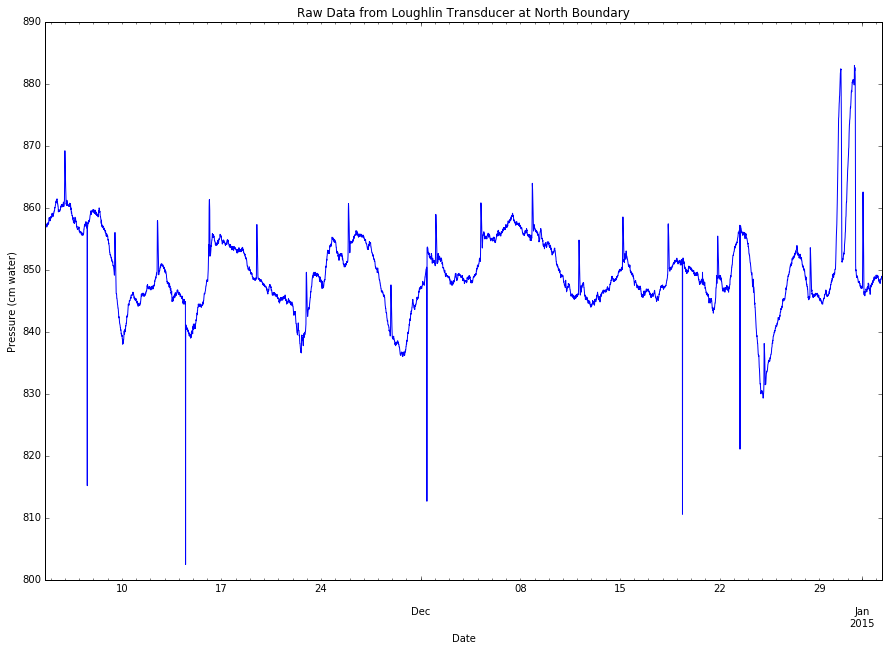

In [18]:
NB_LW = pd.read_csv(North_Boundary_Loughlin,
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, 
                    names=['dt','NB_LW_p_cm','NB_LW_t_C'], engine='python',na_values='' )

NB_LW['NB_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Raw Data from Loughlin Transducer at North Boundary')

In [19]:
NB_LW['NB_LW_dp_cm'] = NB_LW['NB_LW_p_cm'].diff()
NB_LW_Jump = NB_LW[abs(NB_LW['NB_LW_dp_cm'])>10][2:]
NB_LW_Jump['diff'] = abs(NB_LW['NB_LW_dp_cm'][2:]).diff()
mdiff = (abs(NB_LW_Jump['diff'][1])+abs(NB_LW_Jump['diff'][3]))/2
print mdiff
print NB_LW_Jump

3.471
                     NB_LW_p_cm  NB_LW_t_C  NB_LW_dp_cm    diff
dt                                                             
2014-11-14 11:30:00     802.500     13.420      -42.408  42.350
2014-11-14 11:45:00     841.175      3.847       38.675  -3.733
2014-12-01 10:30:00     812.708      9.127      -37.625  37.508
2014-12-01 10:45:00     853.542      4.163       40.834   3.209
2014-12-19 09:30:00     810.608      1.933      -40.950  40.600
2014-12-19 09:45:00     851.733      2.697       41.125   0.175
2014-12-23 10:30:00     821.108     -0.237      -36.109  35.875
2014-12-23 10:45:00     856.283      0.383       35.175  -0.934
2014-12-30 14:00:00     852.025      0.317      -11.958   2.624
2014-12-31 13:15:00     855.700      0.290      -18.492  11.434


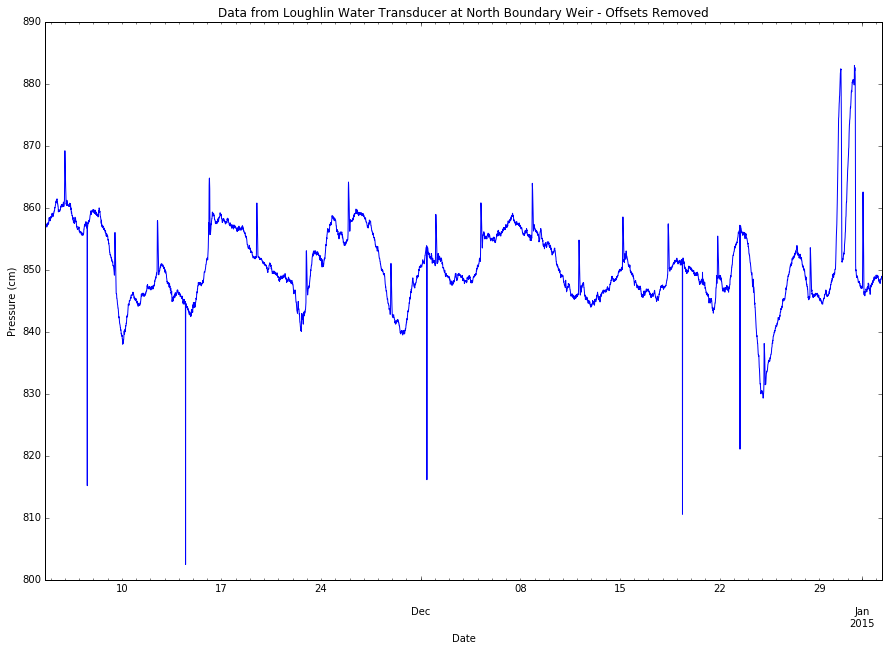

In [20]:
for i in NB_LW.index:
    if i >= NB_LW_Jump.index[1] and i <= NB_LW_Jump.index[2]:
        NB_LW['NB_LW_p_cm'][i]=NB_LW['NB_LW_p_cm'][i]+mdiff
    else:
        NB_LW['NB_LW_p_cm'][i] = NB_LW['NB_LW_p_cm'][i]

NB_LW['NB_LW_p_cm'].plot()
plt.ylabel('Pressure (cm)')
plt.xlabel('Date')
plt.title('Data from Loughlin Water Transducer at North Boundary Weir - Offsets Removed')

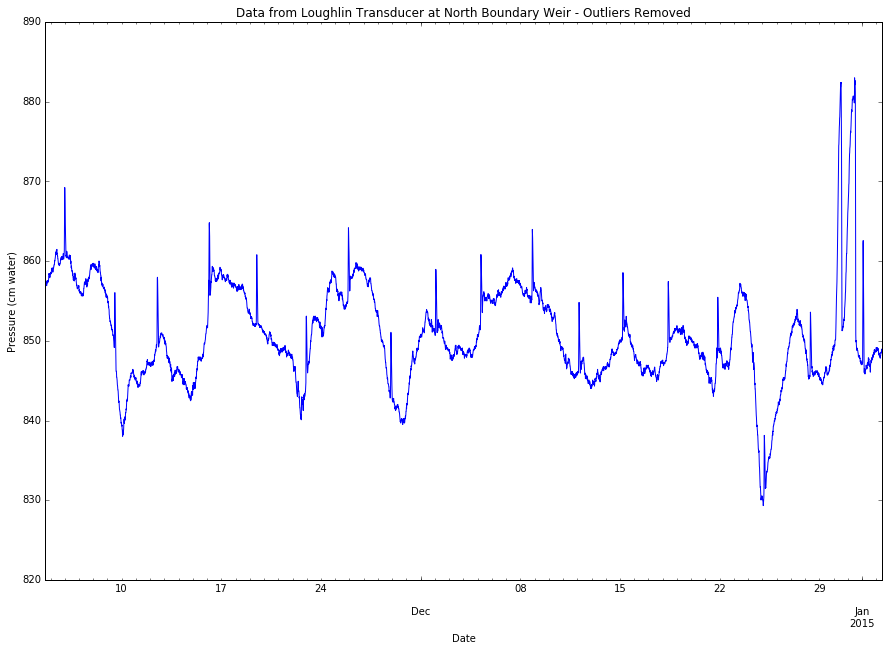

In [21]:
NB_LW = wt.smoother(NB_LW, 'NB_LW_p_cm', 50, 3)
NB_LW['NB_LW_p_cm'].plot()
plt.ylabel('Pressure (cm water)')
plt.xlabel('Date')
plt.title('Data from Loughlin Transducer at North Boundary Weir - Outliers Removed')

Import the barometric pressure data from the Hidden Lake weir barometer (north side barometer), maintained by Loughlin. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=nbbp></a>

In [22]:
HL_BP_LW = pd.read_csv(Hidden_Lake_Barometer_Loughlin, 
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, names=['dt','HL_BP_LW_p_cm','HL_BP_LW_t_C'], 
                    engine='python')

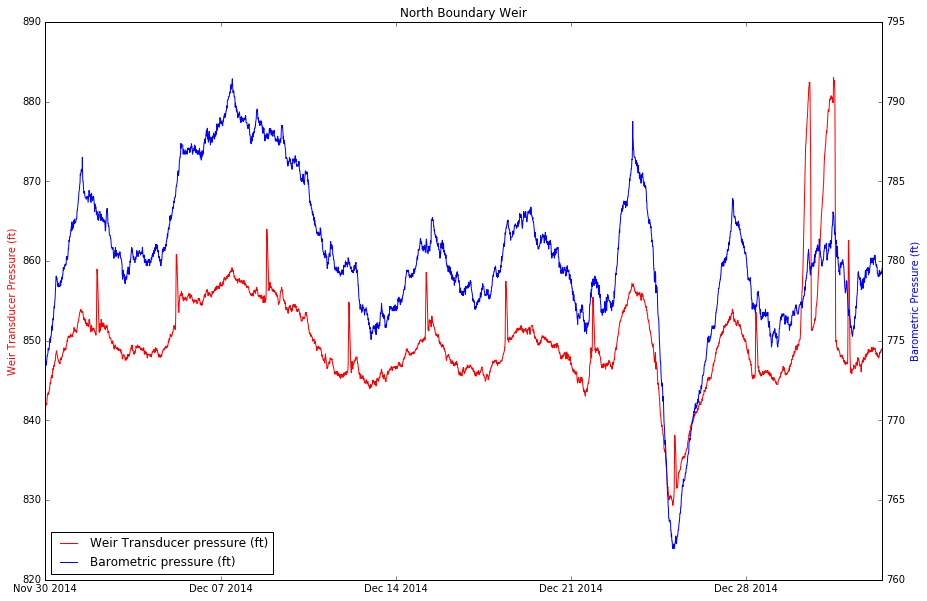

In [23]:
plt.figure()
x1 = NB_LW.index.to_datetime()
y1 = NB_LW['NB_LW_p_cm']

x2 = HL_BP_LW.index.to_datetime()
y2 = HL_BP_LW['HL_BP_LW_p_cm']

fig, ax1 = plt.subplots()
plt.title('North Boundary Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [24]:
NBound = pd.merge(NB_LW, HL_BP_LW, left_index=True, right_index=True, how='outer')
NBound['NB_LW_p_ft'] =(NBound['NB_LW_p_cm'] - NBound['HL_BP_LW_p_cm'])*0.0328084
NBound['HL_BP_LW_p_ft'] = NBound['HL_BP_LW_p_cm']*0.0328084

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\matplotlib\transforms.py:660: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


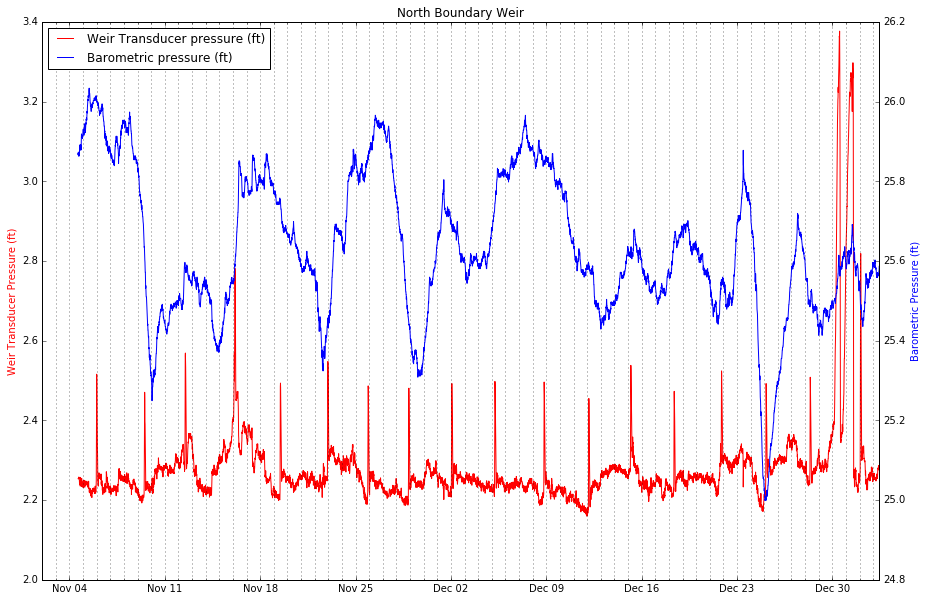

In [25]:
x = NBound.index.to_datetime()
y1 = NBound['NB_LW_p_ft']
y2 = NBound['HL_BP_LW_p_ft']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('North Boundary Weir')
ax1.plot(x,y1,c='r',label='Weir Transducer pressure (ft)')
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='r') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.set_xlim('11/2/2014',x[-1])
ax1.xaxis.set_minor_locator(dates.DayLocator())
ax1.xaxis.set_major_locator(dates.WeekdayLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
ax1.legend(h1+h2, l1+l2, loc=0)
ax1.xaxis_date()
ax1.autoscale_view()
ax1.grid(which='minor')
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Import the UGS data from the North Boundary weir. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=nbugs></a>

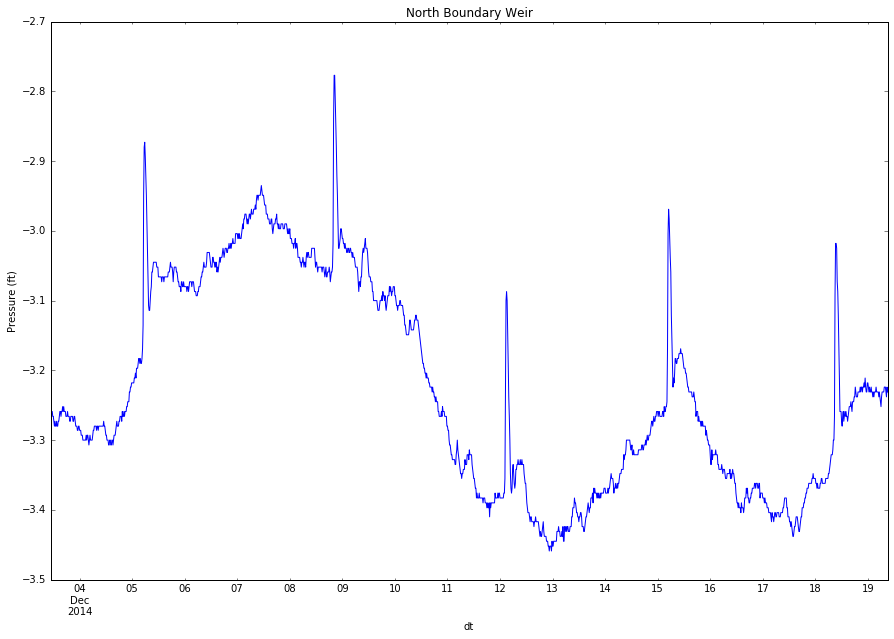

In [26]:
NB_US = pd.read_csv(North_Boundary_UGS, 
                     index_col=0, skiprows=17, skipfooter=1, parse_dates={'dt':[0,1]}, 
                     names=['date','time','ms','NB_US_p_ft','NB_US_t_C'], engine='python')
NB_US['NB_US_p_ft'].plot()
plt.title('North Boundary Weir')
plt.ylabel('Pressure (ft)')

Import manual data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=northman></a>

In [27]:
NB_manual = pd.read_excel(North_Boundary_Manual, 'NorthBoundWeir', index_col=0, 
                          parse_cols=[0,1,2], skiprows=0, na_values=['NA',''],
                          names=['NB_vdepth_in','NB_depth_in'], skip_footer=0)
NB_manual['NB_offset_ft'] = (NB_manual['NB_depth_in']/12-NB_manual['NB_vdepth_in']/12).mean()
NB_manual['NB_depth_ft'] = NB_manual['NB_vdepth_in']/12+NB_manual['NB_offset_ft']
NB_manual = NB_manual.sort_index()
NB_manual = NB_manual[ NB_manual.index.to_datetime()>pd.datetime(2014,7,25)]
print NB_manual

                     NB_vdepth_in  NB_depth_in  NB_offset_ft  NB_depth_ft
date_time                                                                
2014-08-27 14:00:00        5.0000          NaN      0.060897     0.477564
2014-09-15 14:05:00        4.8750       4.9375      0.060897     0.467147
2014-10-02 00:00:00        5.6250       6.5625      0.060897     0.529647
2014-10-28 00:00:00        4.8750       6.0000      0.060897     0.467147
2014-11-04 13:56:00        5.2500       5.9375      0.060897     0.498397
2014-11-04 14:42:00        5.1875       5.8750      0.060897     0.493189
2014-11-10 12:15:00        5.3750       5.9375      0.060897     0.508814
2014-11-14 11:23:00        5.1250       5.9375      0.060897     0.487981
2014-11-21 09:55:00        5.2500       5.8750      0.060897     0.498397
2014-12-01 10:36:00        4.8750       5.6250      0.060897     0.467147
2014-12-05 10:37:00        5.0000       6.1875      0.060897     0.477564
2014-12-12 09:29:00        4.9375     

In [28]:
meanDiff = rollmeandiff(NB_manual,'NB_depth_ft',NBound,'NB_LW_p_ft',5)
print meanDiff
NBound['NB_LW_h_ft'] = NBound['NB_LW_p_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


-1.778


In [29]:
NBound = pd.merge(NBound, NB_US, left_index=True, right_index=True, how='outer')

In [30]:
NBound['HL_BP_LW_p_ft']=NBound['HL_BP_LW_p_cm']/2.54/12
meanDiff = rollmeandiff(NBound,'NB_US_p_ft',NBound,'HL_BP_LW_p_ft',5)
print meanDiff
NBound['NB_US_p_adj_ft'] = NBound['NB_US_p_ft'] - meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


-28.825


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


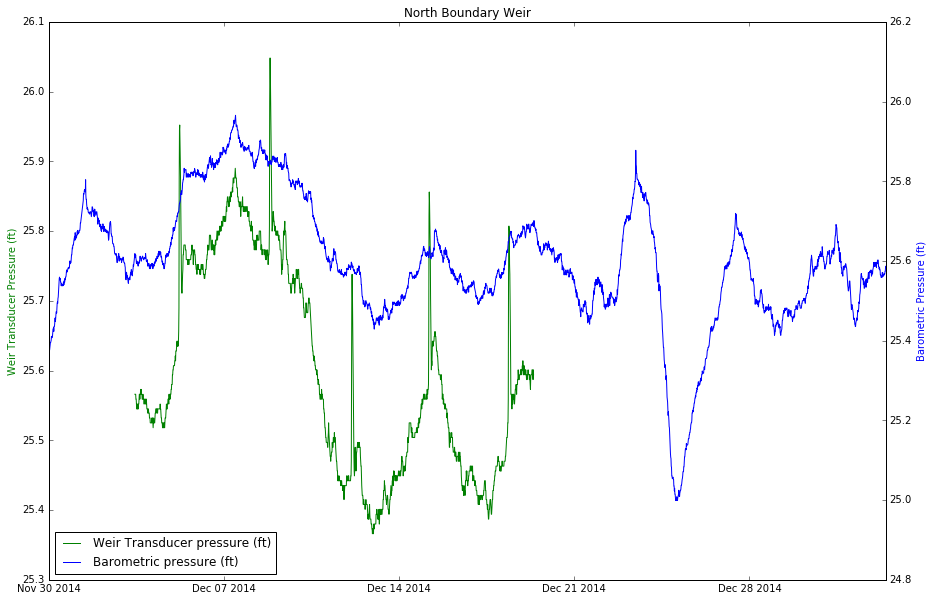

In [31]:
plt.figure()
x1 = NBound.index.to_datetime()

y1 = NBound['NB_US_p_adj_ft']
y2 = NBound['HL_BP_LW_p_ft']

fig, ax1 = plt.subplots()
plt.title('North Boundary Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='g',label='Weir Transducer pressure (ft)')
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Weir Transducer Pressure (ft)', color='g') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x2,y2,c='b',label='Barometric pressure (ft)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [32]:
NBound['NB_US_p_adj_noBP_ft']=NBound['NB_US_p_adj_ft']-NBound['HL_BP_LW_p_ft']

In [33]:
meanDiff = rollmeandiff(NB_manual,'NB_depth_ft',NBound,'NB_US_p_adj_noBP_ft',5)
print meanDiff
NBound['NB_US_h_ft'] = NBound['NB_US_p_adj_noBP_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


0.539


c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7200,center=True).mean()


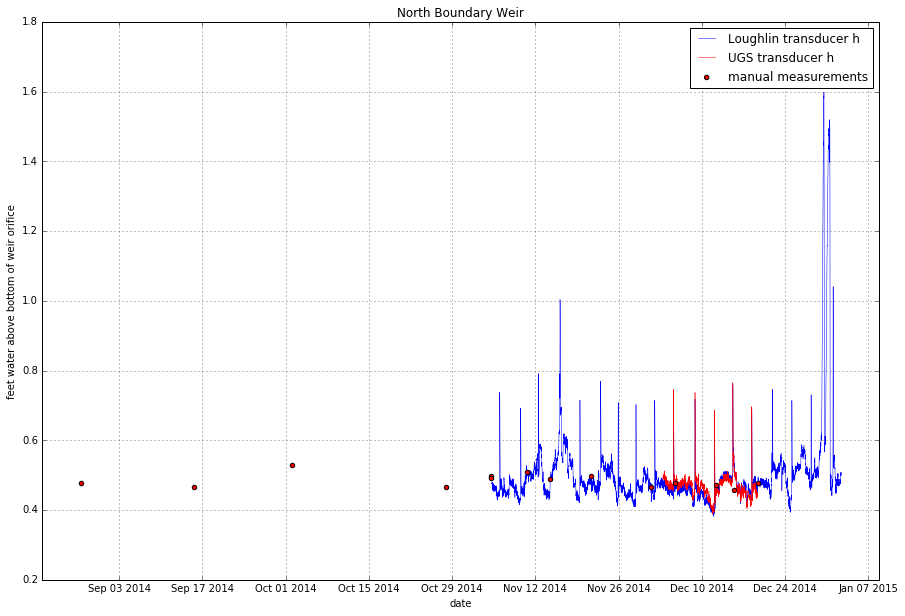

In [34]:
plt.figure()

x = NBound.index.to_datetime()
y = NBound['NB_LW_h_ft']

x1 = NB_manual.index.to_datetime()
y1 = NB_manual['NB_depth_ft']

y2 = NBound['NB_US_h_ft']

plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer h')
plt.plot(x, y2, zorder=2, c='red', linewidth=0.5, label='UGS transducer h')
plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
plt.title('North Boundary Weir')
plt.ylabel('feet water above bottom of weir orifice')
plt.xlabel('date')
plt.grid()
plt.legend(scatterpoints=1)


Once the transducer data were aligned with manual readings, we converted the height of water above the bottom of the weir orifice to discharge in both gpm and cfs.

To do this, we used equations from: U.S. Bureau of Reclamation, 2001, Water Measurement Manual - A water resources technical publication: online, https://www.usbr.gov/tsc/techreferences/mands/wmm/WMM_3rd_2001.pdf.

For Cipoletti (trapezoidal) weirs, the equation to calculate discharge from h is:
$$
Q= 1511\cdot L\cdot h^{\frac{3}{2}}
$$

<ul>
  <li>h = feet above bottom of weir orifice</li>
  <li>Q = discharge in gpm</li>
</ul>
$$
Q= 3.367\cdot L\cdot h^{\frac{3}{2}}
$$

In [35]:
NBound['NB_US_Q_gpm']=(NBound['NB_US_h_ft']**1.5)*1511
NBound['NB_LW_Q_gpm']=(NBound['NB_LW_h_ft']**1.5)*1511
NB_manual['NB_man_Q_ft'] = (NB_manual['NB_depth_ft']**1.5)*1511 
NBound['NB_US_Q_cfs']=0.00222800926*NBound['NB_US_Q_gpm']
NBound['NB_LW_Q_cfs']=0.00222800926*NBound['NB_LW_Q_gpm']

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=86,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=True).mean()


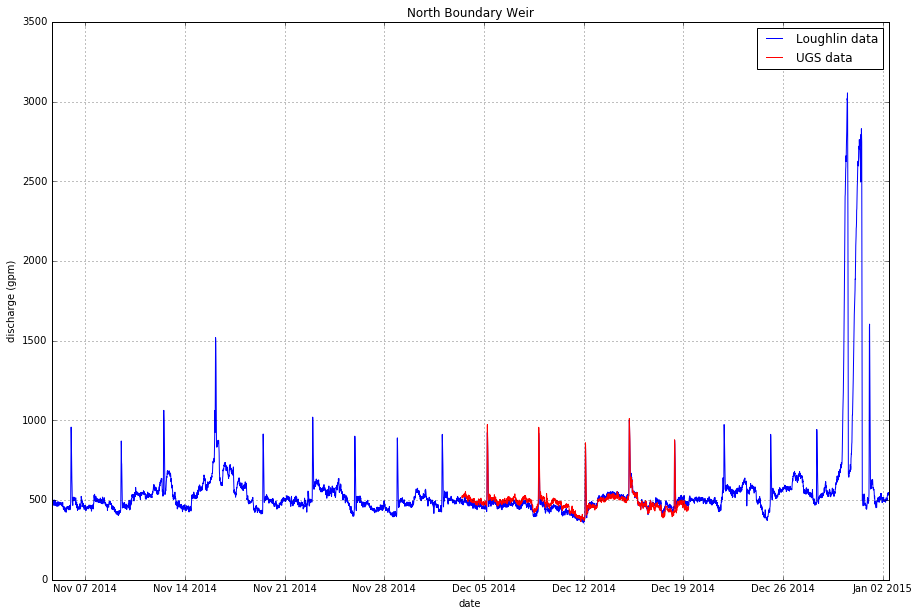

In [36]:
plt.figure()
x = NBound.index.to_datetime()
y1 = NBound['NB_LW_Q_gpm']
y2 = NBound['NB_US_Q_gpm']

y3 = pd.rolling_mean(y1, window=86, center=True)
y4 = pd.rolling_mean(y2, window=48, center=True)

plt.figure()
plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='UGS data')
plt.title('North Boundary Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.grid()

plt.legend()

#plt.savefig(rootlocal+'NorthBoundary.pdf')

In [37]:
NBound.to_csv('U:/GWP/Groundwater/PowderMt/2017_UGA/northboundarydata.csv')

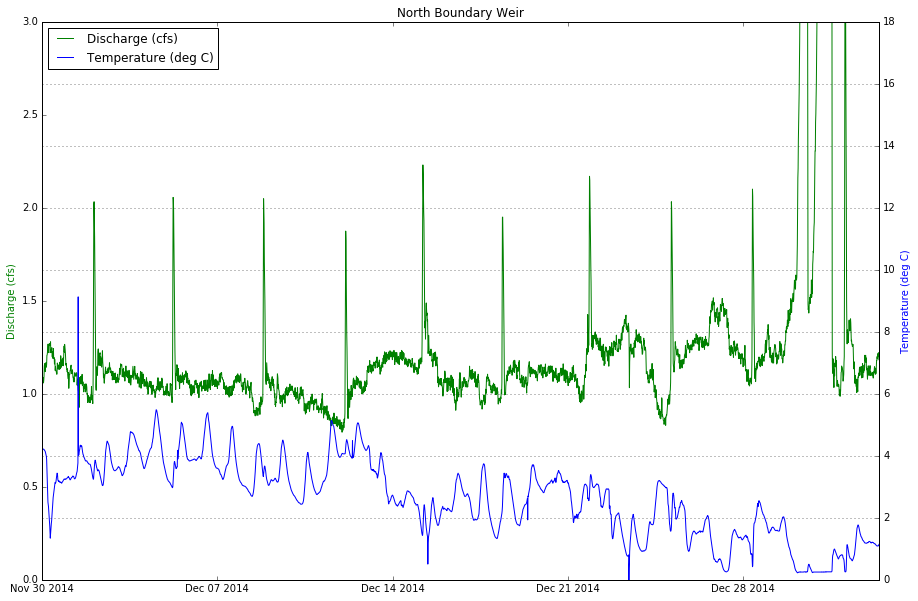

In [193]:
plt.figure()
x1 = NBound.index.to_datetime()

y1 = NBound['NB_LW_Q_cfs']
y2 = NBound['NB_LW_t_C']

fig, ax1 = plt.subplots()
plt.title('North Boundary Weir')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='g',label='Discharge (cfs)')
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylim(0,3)
ax2.set_ylim(0,18)
ax1.set_ylabel('Discharge (cfs)', color='g') 
ax2.set_ylabel('Temperature (deg C)', color='b') 
ax2.plot(x1,y2,c='b',label='Temperature (deg C)')
plt.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

plt.show()

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=86,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=True).mean()


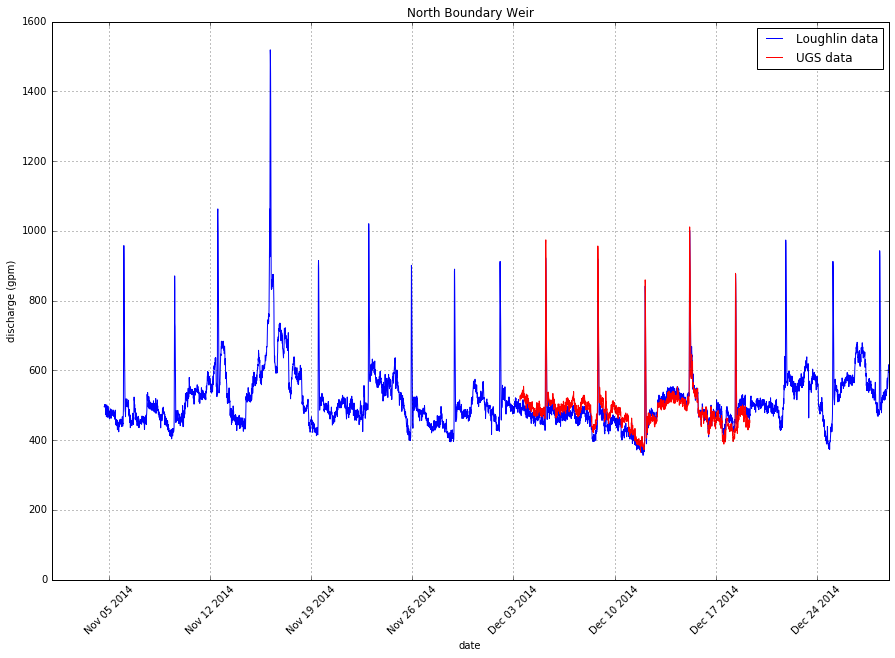

In [194]:
plt.figure()
x = NBound.index.to_datetime()
y1 = NBound['NB_LW_Q_gpm']
y2 = NBound['NB_US_Q_gpm']

y3 = pd.rolling_mean(y1, window=86, center=True)
y4 = pd.rolling_mean(y2, window=48, center=True)

plt.figure()
plt.plot(x,y1, color='blue', zorder=1, label='Loughlin data')
plt.plot(x,y2, color='red', zorder=2, label='UGS data')
plt.title('North Boundary Weir')
plt.ylabel('discharge (gpm)')
plt.xlabel('date')
plt.xlim('11/1/2014','12/29/2014')
plt.grid(which='both')
plt.xticks(rotation=45)
plt.ylim(0,1600)
plt.legend()
plt.savefig(rootlocal+"NorthBoundaryWeir.svg")

In [195]:
NBound = nodups(NBound,All)

In [196]:
list(NBound.columns.values)

['NB_LW_t_C',
 'NB_US_t_C',
 'NB_US_Q_gpm',
 'NB_LW_Q_gpm',
 'NB_US_Q_cfs',
 'NB_LW_Q_cfs']

In [197]:
All = pd.merge(All, NBound, left_index=True, right_index=True, how='outer')

In [198]:
#del (NB_LW,NBound)

## Wells

[Hidden Lake Well](#Hidden-Lake-Well)
[Exploration Well 2](#Exploration-Well-2)
[Aquifer Test Hydrographs](#Aquifer-Test-Hydrographs)

### Hidden Lake Well

[To Top](#top)

This is the pumping well. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hlw></a>

In [199]:
HLW = pd.read_excel(Hidden_Lake_Well, 'PowderMt-01-01-2014', index_col=0, 
                  skiprows=5, skipfooter=0, parse_cols=[0,2,3],
                  names=['HLW_h_ft','HLW_Q_gpm'])

In [200]:
HLW.head()

HLW_h_ft  HLW_Q_gpm
Date & Time                                   
2014-11-29 08:00:00.500  211.942592   0.009375
2014-11-29 08:05:00.500  211.920928   0.009375
2014-11-29 08:10:00.500  211.899264   0.009375
2014-11-29 08:15:00.500  211.920928   0.009375
2014-11-29 08:20:00.500  211.920928   0.009375

In [201]:
Hidden_Lake_Well2 = 'M:/PROJECTS/POWMOW/E5382-MonitoringData/GeokonData-EXPL2-2013-2016-to UGS.xlsx'
HLW2 = pd.read_excel(Hidden_Lake_Well2,'HL Well',skiprows=[0,1,2,3,87,88,153,154],
                     index_col=0,names=['HLW_h_ft','HLW_dtw_ft','days','HLW_del_ftday'])
HLW2.sort_index(inplace=True)
HLW = pd.concat([HLW,HLW2])

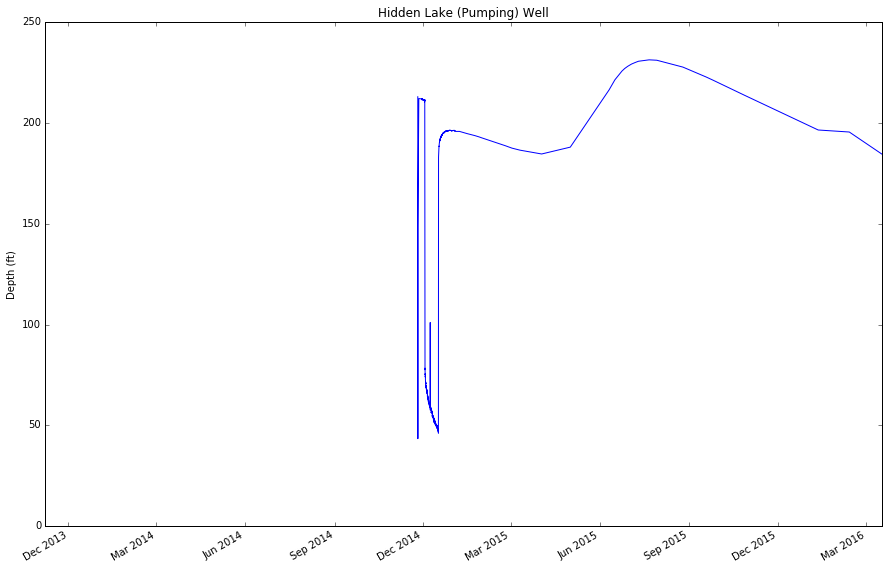

In [202]:
HLW['HLW_h_ft'].plot()
plt.title('Hidden Lake (Pumping) Well')
plt.ylabel('Depth (ft)')

The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=hlwman></a>

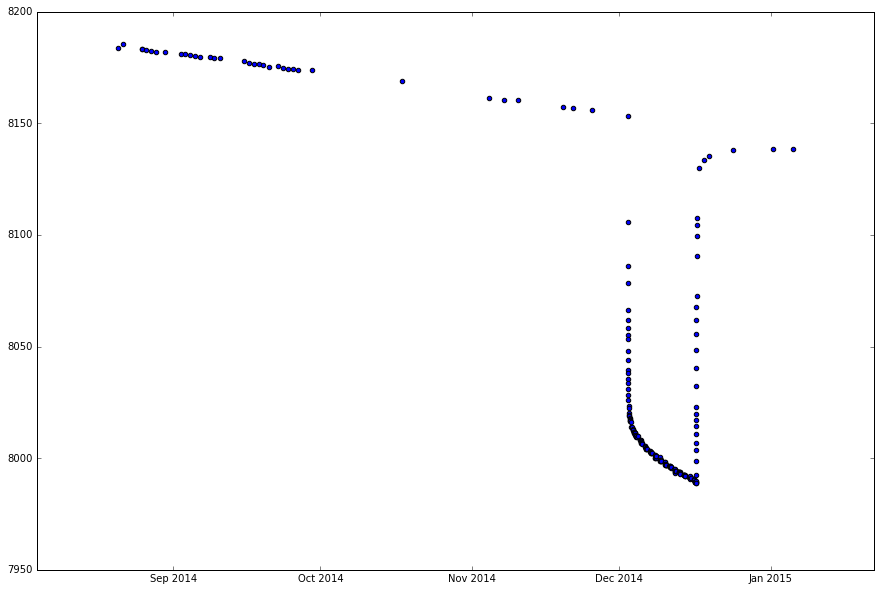

In [203]:
HLWM = pd.read_excel(Hidden_Lake_Well_Manual, 'HiddenLakeWell', index_col=0, 
                     skiprows=0, parse_cols=[0,1], names=['hlw_dtw_man_ft'])
HLWM['HLWM_wl_elev'] = 8904-HLWM['hlw_dtw_man_ft']

x1 = HLWM.index.to_datetime()
y1 = HLWM['HLWM_wl_elev']

plt.figure()
plt.scatter(x1,y1)

In [204]:
meanDiff = rollmeandiff(HLWM,'HLWM_wl_elev',HLW,'HLW_h_ft',2)
print meanDiff
HLW['HLW_wl_elev_ft'] = HLW['HLW_h_ft'] + meanDiff

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2880,center=True).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2880,center=True).mean()


7942.272


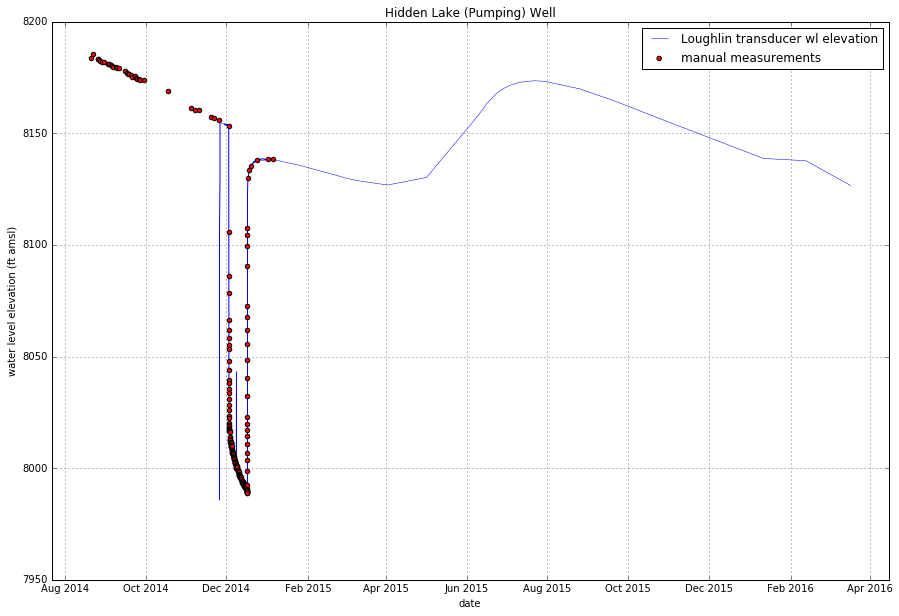

In [205]:
plt.figure()

x = HLW.index.to_datetime()
y = HLW['HLW_wl_elev_ft']

x1 = HLWM.index.to_datetime()
y1 = HLWM['HLWM_wl_elev']

plt.plot(x, y, zorder=1, c='blue', linewidth=0.5, label='Loughlin transducer wl elevation')
plt.scatter(x1, y1, c='red', zorder=3, label='manual measurements')
plt.title('Hidden Lake (Pumping) Well')
plt.ylabel('water level elevation (ft amsl)')
plt.xlabel('date')
plt.grid()
plt.legend(scatterpoints=1)

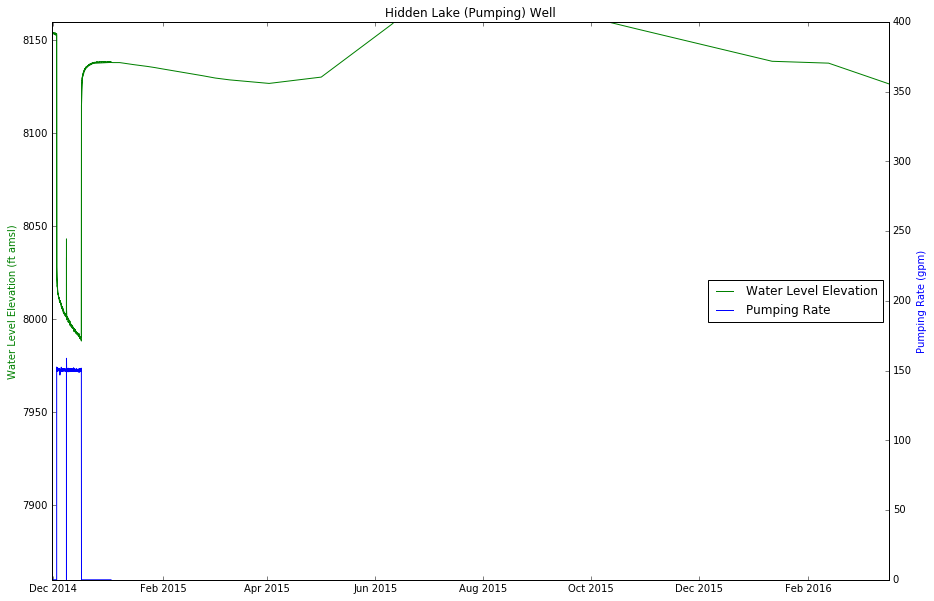

In [206]:
plt.figure()

x1 = HLW.index.to_datetime()
y1 = HLW['HLW_wl_elev_ft']

x2 = HLW.index.to_datetime()
y2 = HLW['HLW_Q_gpm']


fig, ax1 = plt.subplots()
plt.title('Hidden Lake (Pumping) Well')
ax2 = ax1.twinx()
ax1.plot(x1,y1,c='g',label='Water Level Elevation', zorder=1)
ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Water Level Elevation (ft amsl)', color='g') 
ax2.set_ylabel('Pumping Rate (gpm)', color='b') 
ax2.plot(x2,y2,c='b',label='Pumping Rate', zorder=2)
#plt.gca().invert_yaxis()
ax1.set_ylim(7860,8160)
ax2.set_ylim(0,400)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=7)


plt.show()

2013-11-07 09:00:00
                            OLS Regression Results                            
Dep. Variable:         HLW_wl_elev_ft   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Jun 2016   Prob (F-statistic):                nan
Time:                        07:46:12   Log-Likelihood:                    nan
No. Observations:                 983   AIC:                               nan
Df Residuals:                     981   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const             nan        nan

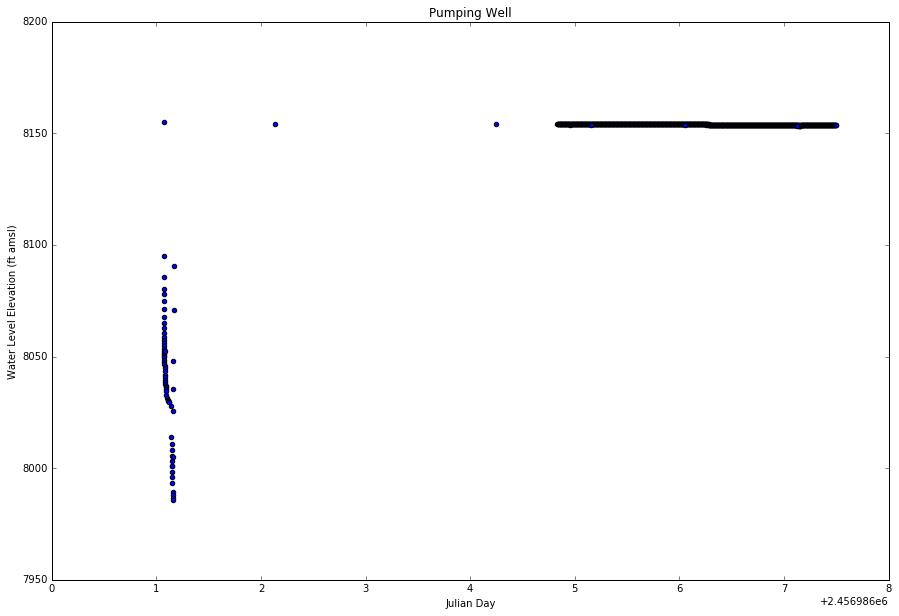

In [207]:
y = HLW['HLW_wl_elev_ft'][HLW.index.to_datetime() < pd.datetime(2014,12,2,0,0)]
x0 = HLW.index.to_julian_date()[HLW.index.to_datetime() < pd.datetime(2014,12,2,0,0)]
x = sm.add_constant(x0)
print(min(HLW.index))
plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Pumping Well')
plt.ylabel('Water Level Elevation (ft amsl)')
plt.xlabel('Julian Day')

2014-08-20 15:00:00
                            OLS Regression Results                            
Dep. Variable:           HLWM_wl_elev   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8583.
Date:                Wed, 15 Jun 2016   Prob (F-statistic):           1.83e-41
Time:                        07:46:13   Log-Likelihood:                -26.454
No. Observations:                  35   AIC:                             56.91
Df Residuals:                      33   BIC:                             60.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7.476e+05   7980.969

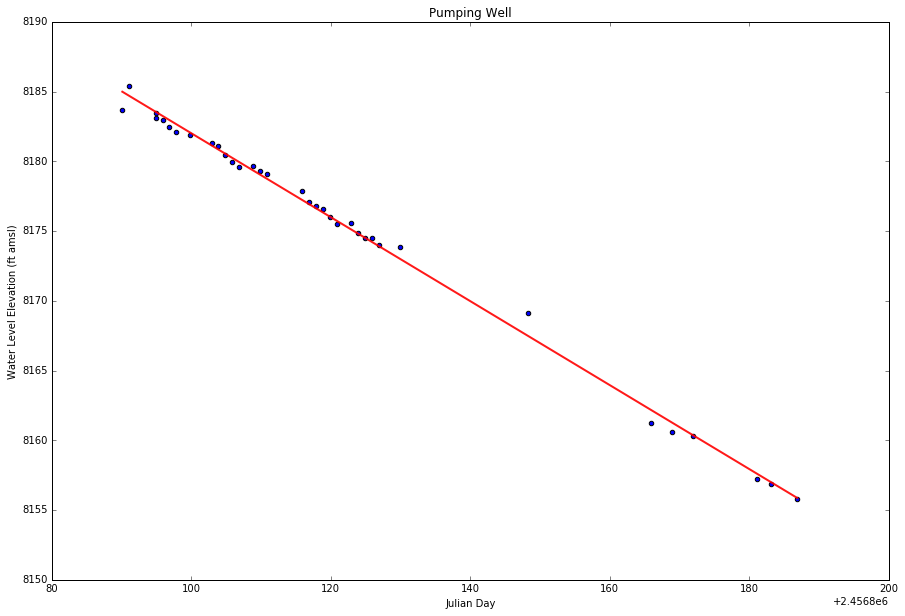

In [208]:
y = HLWM['HLWM_wl_elev'][HLWM.index.to_datetime() < pd.datetime(2014,12,2,0,0)]
x0 = HLWM.index.to_julian_date()[HLWM.index.to_datetime() < pd.datetime(2014,12,2,0,0)]
x = sm.add_constant(x0)
print min(HLWM.index)
plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Pumping Well')
plt.ylabel('Water Level Elevation (ft amsl)')
plt.xlabel('Julian Day')

In [209]:
HLW = HLW.resample('1Min', how='mean')
HLW = HLW.interpolate(method='time', limit=90)
HLW = HLW.resample('5Min', how='mean')

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [210]:
HLW15 = HLW.resample('15Min', how='mean')

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


In [211]:
All=pd.merge(All, HLW15, left_index=True, right_index=True, how='outer')

In [212]:
list(All.columns.values)

['USU_Avon_BP_mmHg_x',
 'USU_Avon_BP_mmHg_y',
 'USU_SF_PPT_in',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'USU_SF_BD_h_ft',
 'Site Id',
 'WTEQ.I-1 (in) ',
 'PREC.I-1 (in) ',
 'TOBS.I-1 (degC) ',
 'SNWD.I-1 (in) ',
 'SMS.I-1:-2 (pct)  (silt)',
 'SMS.I-1:-8 (pct)  (silt)',
 'SMS.I-1:-20 (pct)  (silt)',
 'STO.I-1:-2 (degC) ',
 'STO.I-1:-8 (degC) ',
 'STO.I-1:-20 (degC) ',
 'SAL.I-1:-2 (gram) ',
 'SAL.I-1:-8 (gram) ',
 'SAL.I-1:-20 (gram) ',
 'RDC.I-1:-2 (unit) ',
 'RDC.I-1:-8 (unit) ',
 'RDC.I-1:-20 (unit) ',
 'BATT.I-1 (volt) ',
 'Unnamed: 20',
 'SForkWolfCreek',
 'OtherQuartzite',
 'NorthForkofWolfCreek',
 'LeftysCreek',
 'JamesPeakFork',
 'HiddenLakeFork',
 'CobabeCreek',
 'NorthSide',
 'SouthSide',
 'UL_BP_LW_p_cm',
 'UL_BP_LW_p_ft',
 'UL_BP_LW_t_C',
 'UL_JF_Q_cfs',
 'UL_JF_Q_gpm',
 'UL_JF_t_C',
 'UL_LW_Q_cfs',
 'UL_LW_Q_gpm',
 'UL_LW_Q_lpm',
 'UL_LW_t_C',
 'LL_LW_t_C',
 'LL_JF_t_C',
 'LL_LW_Q_gpm',
 'LL_JF_Q_gpm',
 'LL_JF_Q_cfs',
 'LL_LW_Q_cfs',
 'LL_LW_Q_lpm',
 'LL_JF_Q_lpm',
 'HL_LW_t_C'

### Exploration Well 2

[To Top](#top)

The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=exw></a>

In [213]:
EXW = pd.read_csv(Exploration_Well_2, index_col=0, parse_dates=True,
                  skiprows=89, usecols=[0,2,3], names=['date','EXW_p_psi','EXW_t_C'])
EXW['EXW_p_ft']=EXW['EXW_p_psi']*2.307

In [214]:
EXW2a = pd.read_excel(Exploration_Well_2_total, 'Prior1', index_col=0, skiprows=[0,1,2], 
                     names=['EXW_dtw_ft'], parse_cols=1)
EXW2a.sort_index(inplace=True)
EXW2a.dropna(inplace=True)
EXW2a = EXW2a.resample('1H').mean()
EXW2a['julian'] = EXW2a.index.to_julian_date()
EXW2a.drop_duplicates(subset='julian', inplace=True)

EXW2b = pd.read_excel(Exploration_Well_2_total, 'Prior2', index_col=0, skiprows=[0,1,2], 
                     names=['EXW_dtw_ft'], parse_cols=1)
EXW2b.sort_index(inplace=True)
EXW2b.dropna(inplace=True)
EXW2b = EXW2b.resample('1H').mean()
EXW2b['julian'] = EXW2b.index.to_julian_date()
EXW2b.drop_duplicates(subset='julian', inplace=True)

EXW2c = pd.read_excel(Exploration_Well_2_total, 'Troll', index_col=0, skiprows=[0,1,2], 
                     names=['EXW_dtw_ft'], parse_cols=1)
EXW2c.sort_index(inplace=True)
EXW2c = EXW2c.resample('1H').mean()
EXW2c.dropna(inplace=True)
EXW2c['julian'] = EXW2c.index.to_julian_date()
EXW2c.drop_duplicates(subset='julian', inplace=True)


EXW2d = pd.read_excel(Exploration_Well_2_total, 'VWP-2015', index_col=0, skiprows=[0,1,2], 
                     names=['EXW_dtw_ft'], parse_cols=[13,14])
EXW2d.sort_index(inplace=True)
EXW2d.dropna(inplace=True)
EXW2a = EXW2a.resample('1H').mean()
EXW2d['julian'] = EXW2d.index.to_julian_date()
EXW2d.drop_duplicates(subset='julian', inplace=True)


In [215]:
EXW2 = pd.concat([EXW2a,EXW2b,EXW2c,EXW2d])
EXW2.sort_index(inplace=True)
EXW2 = EXW2.resample('1H').mean()
EXW2['EXW_wl_elev_ft'] =  8901 - EXW2['EXW_dtw_ft']
EXW2.drop(['julian'], axis=1,inplace=True)

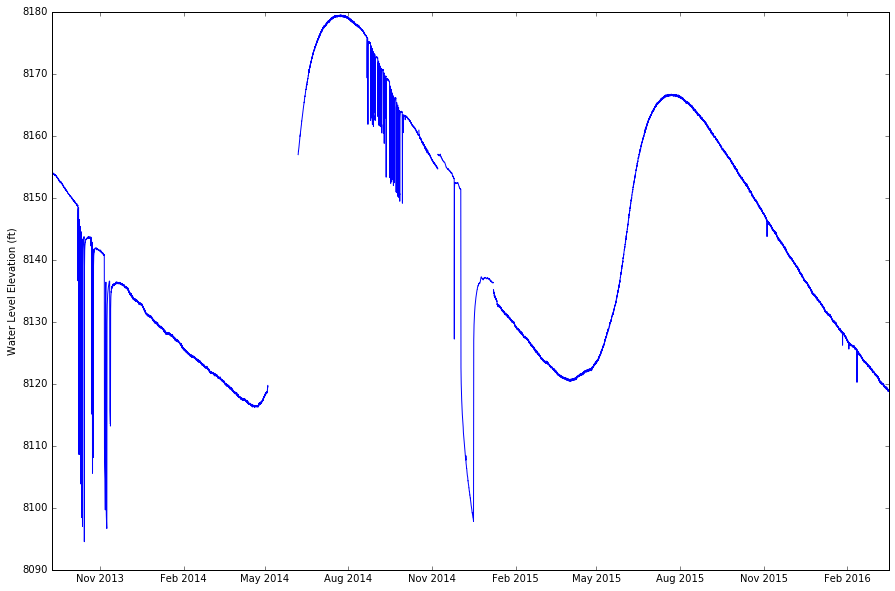

In [216]:
x = EXW2.index
y = EXW2['EXW_wl_elev_ft']

plt.plot(x,y, label='Exploration Well 2')
plt.ylabel('Water Level Elevation (ft)')
EXWall = EXW2
plt.savefig(figout+"15_Exp_Well_2.svg")

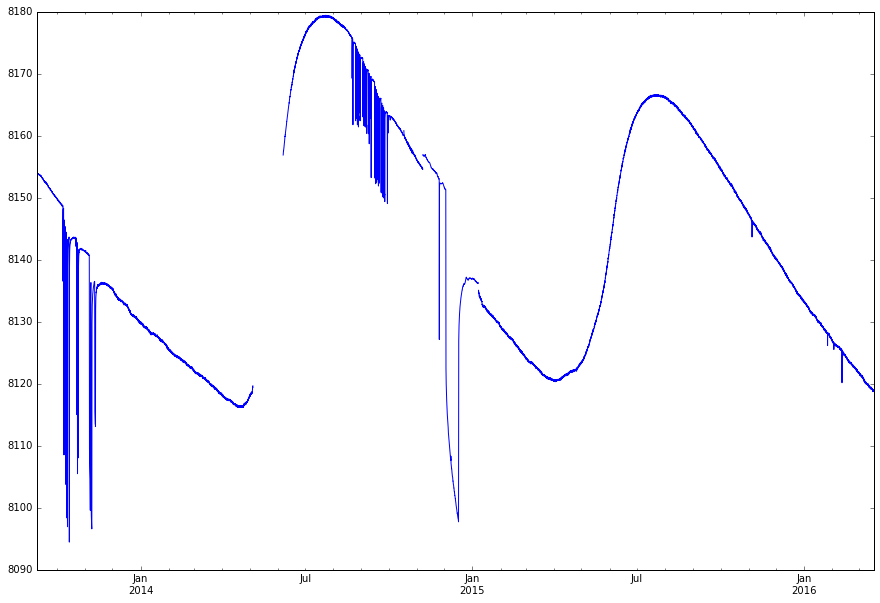

In [217]:
EXW2['EXW_wl_elev_ft'].plot()

In [218]:
EXW2.ix[(EXW2.index > pd.datetime(2014,11,7,9,0))&(EXW2.index < pd.datetime(2015,1,7,18,0)),'EXW_wl_elev_ft'] = EXW2.ix[(EXW2.index > pd.datetime(2014,11,7,9,0))&(EXW2.index < pd.datetime(2015,1,7,18,0)),'EXW_wl_elev_ft'] - 2.1


The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=exman></a>

In [219]:
EXWM = pd.read_excel(Exploration_Well_2_Manual,'ExpWell2',names=['EXWM_h_ft'],index_col=0)
print EXWM

                     EXWM_h_ft
date_time                     
2014-10-17 13:30:00     735.32
2014-11-07 11:34:00     743.94


In [220]:
#oldwl = pd.read_excel(oldwls2013,'Sheet1',names=['EXW_h_ft','pumpMin','s_ft','rateGPM'],index_col=0)

In [221]:
#EXW['EXW_wl_elev_ft'] = EXW['EXW_p_ft']+7896.5
#oldwl['EXW_wl_elev_ft'] = 8901 - oldwl['EXW_h_ft']

In [222]:
#EXWall = pd.concat([EXW, oldwl],axis=0)
EXWall.sort_index(inplace=True)

In [223]:
EXWall.dropna(subset=['EXW_wl_elev_ft'],inplace=True)

In [224]:
#oldUpperLeftys = pd.read_excel(oldwls2013,'Lefty Flow',index_col=0)
#names=['date','EXW_h_ft','pumpMin','s_ft','rateGPM']
All = pd.merge(All, EXWall, left_index=True, right_index=True)

## EXW and Leftys

In [225]:
LeftAnalys = pd.merge(EXW2, Leftys, left_index=True, right_index=True, how='left')

8179.50872295


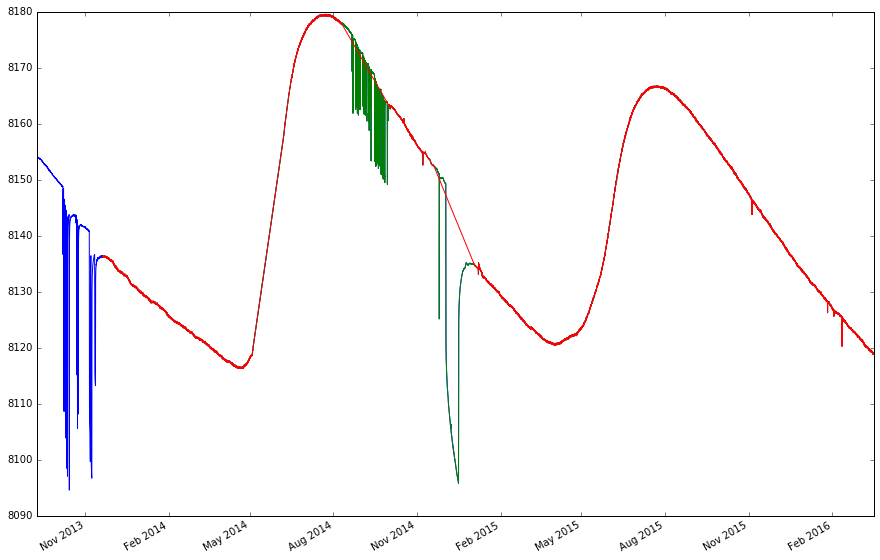

In [226]:
LeftAnalys['EXW_wl_elev_ft'].plot() #  1.09167792e-05   3.52015191e+00]
LeftAnalys['mod_gpm'] = (1.09167792e-05)*(LeftAnalys['EXW_wl_elev_ft'] - 8082.0)**3.52015191e+00
LFilt = LeftAnalys[(LeftAnalys.index > pd.datetime(2013,11,20))]
LFilt.EXW_wl_elev_ft.plot()
LFilt = LFilt[(LFilt.index < pd.datetime(2014,8,10)) | (LFilt.index > pd.datetime(2014,10,1))]
LFilt = LFilt[(LFilt.index < pd.datetime(2014,11,20)) | (LFilt.index > pd.datetime(2015,1,3))]
#LFilt = LFilt[(LFilt.index < pd.datetime(2014,4,20)) | (LFilt.index > pd.datetime(2014,7,27))]
#LFilt = LFilt[(LFilt.index < pd.datetime(2015,3,25)) | (LFilt.index > pd.datetime(2015,7,27))]
LFilt.EXW_wl_elev_ft.plot()
print(LFilt.EXW_wl_elev_ft.max())

In [227]:
SNOTELcsvs = "http://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/582:UT:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END/WTEQ::value,PREC::value,TMAX::value,TMIN::value,TAVG::value,PRCP::value"
STL = pd.read_csv(SNOTELcsvs, skiprows=7, parse_dates=True, index_col=0)

In [228]:
STLs = STL[(STL.index > pd.datetime(2013,10,1))&(STL.index < pd.datetime(2016,4,1))]

STLs.columns

Index([u'Snow Water Equivalent (in)', u'Precipitation Accumulation (in)',
       u'Air Temperature Maximum (degF)', u'Air Temperature Minimum (degF)',
       u'Air Temperature Average (degF)', u'Precipitation Increment (in)'],
      dtype='object')

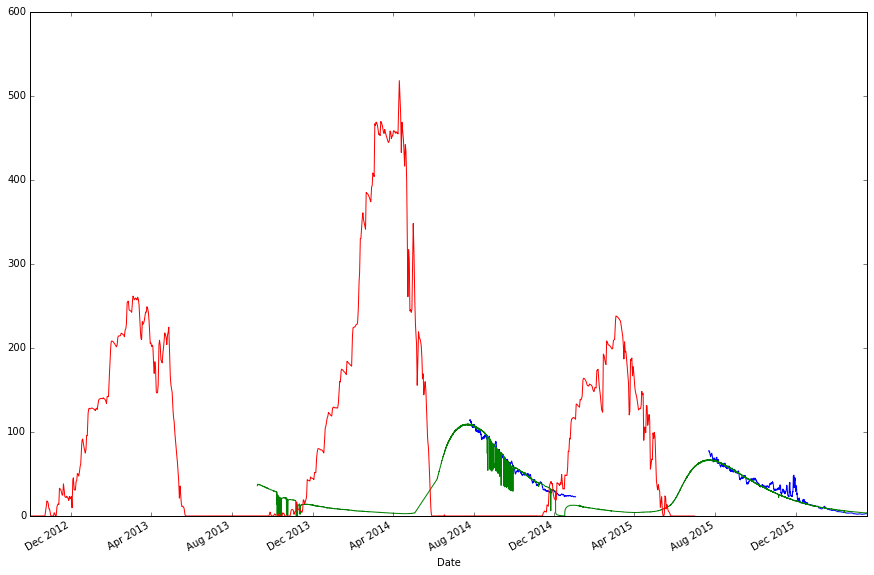

In [229]:
#LFilt.UL_LW_Q_gpm.plot()
LFilt = LFilt[(LFilt.index < pd.datetime(2015,11,1)) | (LFilt.index > pd.datetime(2015,12,10))]
LeftAnalys.UL_LW_Q_gpm.rolling(window=30, center=True).mean().plot()
LeftAnalys['mod_gpm'].plot()
#plt.twinx()
SNODAS['SouthSide'].plot()

[  2.70547450e-06   3.52524111e+00]


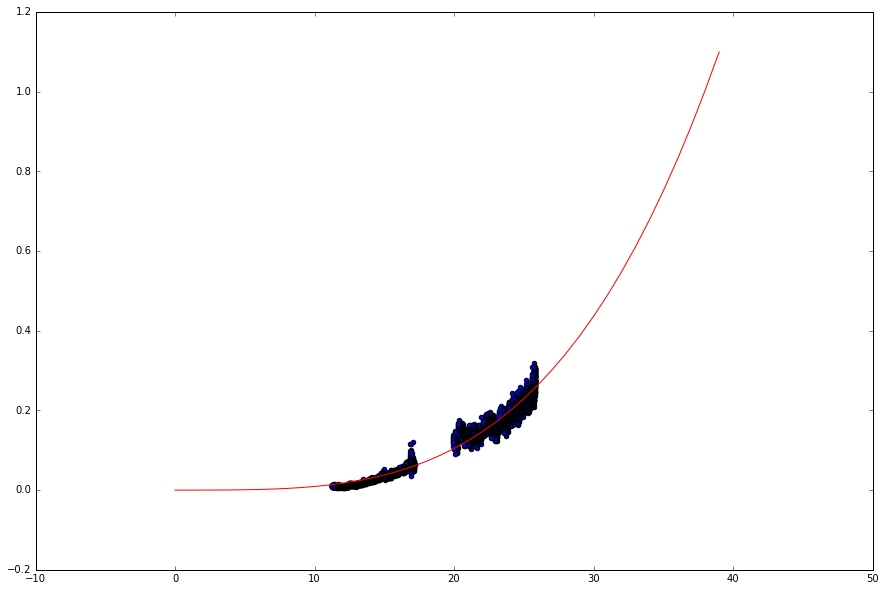

In [230]:
LFilt['EXW_wl_abv_sp_m'] = (LFilt['EXW_wl_elev_ft'] - 8082.0)/(3.28084)
LFilt['UL_LW_Q_m3pm'] = LFilt['UL_LW_Q_lpm'] * 0.001
LFilt.dropna(subset=['EXW_wl_abv_sp_m','UL_LW_Q_m3pm'],inplace=True)
x = LFilt['EXW_wl_abv_sp_m']
y = LFilt['UL_LW_Q_m3pm']
plt.scatter(x,y)


from scipy.optimize import curve_fit
def func(x, a, c):
    return a*x**c
popt, pcov = curve_fit(func, x, y, p0=(0.1, 1e-1))#, bounds = [0,40000], method='trf')
print(popt)
x1 = np.arange(0,40,1.0)
plt.plot(x1,[popt[0]*i**popt[1] for i in x1], color='red')



1.42345945331
[  1.08432342e-05   3.52524109e+00]
[[  5.14731715e-13  -1.08808685e-08]
 [ -1.08808685e-08   2.30140174e-04]]


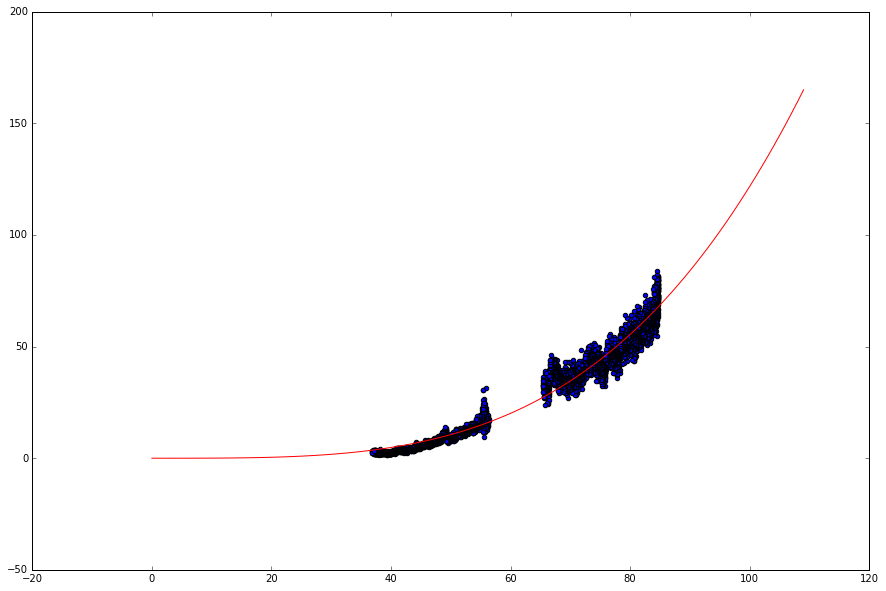

In [231]:
LFilt['EXW_wl_abv_sp_ft'] = (LFilt['EXW_wl_elev_ft'] - 8082.0)

x2 = LFilt['EXW_wl_abv_sp_ft']
y2 = LFilt['UL_LW_Q_gpm']
plt.scatter(x2,y2)

print(LFilt['UL_LW_Q_gpm'].min())

from scipy.optimize import curve_fit
def func(x, a, c):
    return a*x**c
popt2, pcov2 = curve_fit(func, x2, y2, p0=(0.1, 1e-1))#, bounds = [0,40000], method='trf')
print(popt2)
print(pcov2)
x1 = np.arange(0,110,1.0)
plt.plot(x1,[popt2[0]*i**popt2[1] for i in x1], color='red')

Based on potentiometric surface map, water table has ellipsoid shape above Lefty's Spring.
$$
V= {\frac{2}{3}}\cdot\pi l w h
$$
where l and w are the length and width radii of the ellipsoid, and h is the height of the center of the water table above the spring.  This assumes constant head boundaries.

The volume calculated using a constant elevation of 8050 ft, which is the elevation of the spring, and the water table surface is 11,299,067 $m^3$ (9200 ac-ft). Based on the estimated effective porosity of 0.07 from the aquifer test, about 650 ac-ft is available in the aquifer above the spring if there is 10 m of head.  The water table surface we constructed represents an h about 10 meters above the spring.

This only accounts for natural variation in head, as pumping would create a water table shape deviating from the ellipsoid.


In [232]:
print(0.66*3.14*1160.0/2*1500.0/2*10)*0.000810714*.07

511.597664701


In [233]:
LFilt.columns

Index([u'EXW_dtw_ft', u'EXW_wl_elev_ft', u'UL_BP_LW_p_cm', u'UL_BP_LW_p_ft',
       u'UL_BP_LW_t_C', u'UL_JF_Q_cfs', u'UL_JF_Q_gpm', u'UL_JF_t_C',
       u'UL_LW_Q_cfs', u'UL_LW_Q_gpm', u'UL_LW_Q_lpm', u'UL_LW_t_C',
       u'mod_gpm', u'EXW_wl_abv_sp_m', u'UL_LW_Q_m3pm', u'EXW_wl_abv_sp_ft'],
      dtype='object')

In [234]:
LFilt.to_clipboard()

4820
4820
                            OLS Regression Results                            
Dep. Variable:           UL_LW_Q_m3pm   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 8.941e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:48:06   Log-Likelihood:                 12072.
No. Observations:                4820   AIC:                        -2.414e+04
Df Residuals:                    4818   BIC:                        -2.413e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -0.2124      

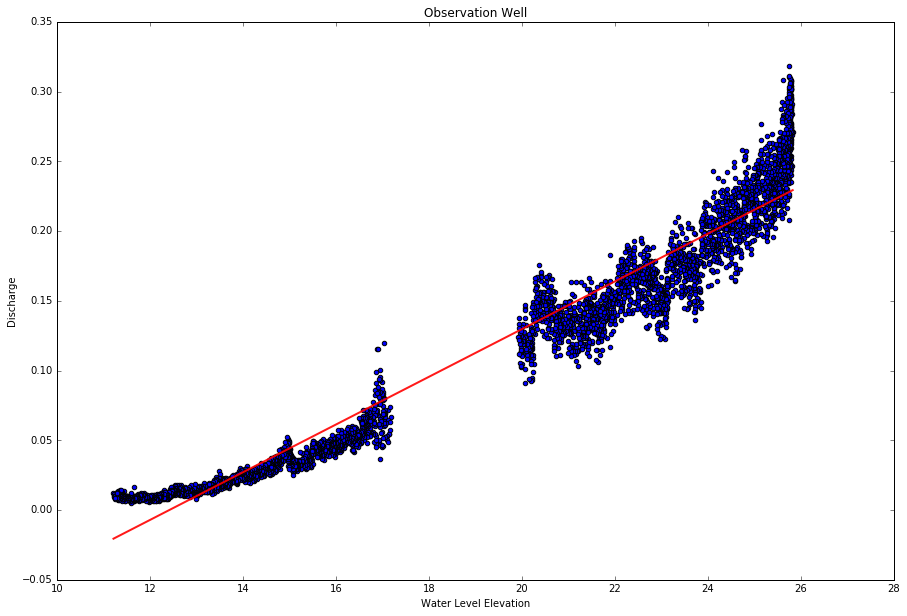

In [235]:
LFilt.dropna(subset=['EXW_wl_abv_sp_m','UL_LW_Q_m3pm'],inplace=True)
x0 = LFilt['EXW_wl_abv_sp_m']
y = LFilt['UL_LW_Q_m3pm']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Observation Well')
plt.ylabel('Discharge')
plt.xlabel('Water Level Elevation')

## EXW and Lower Leftys

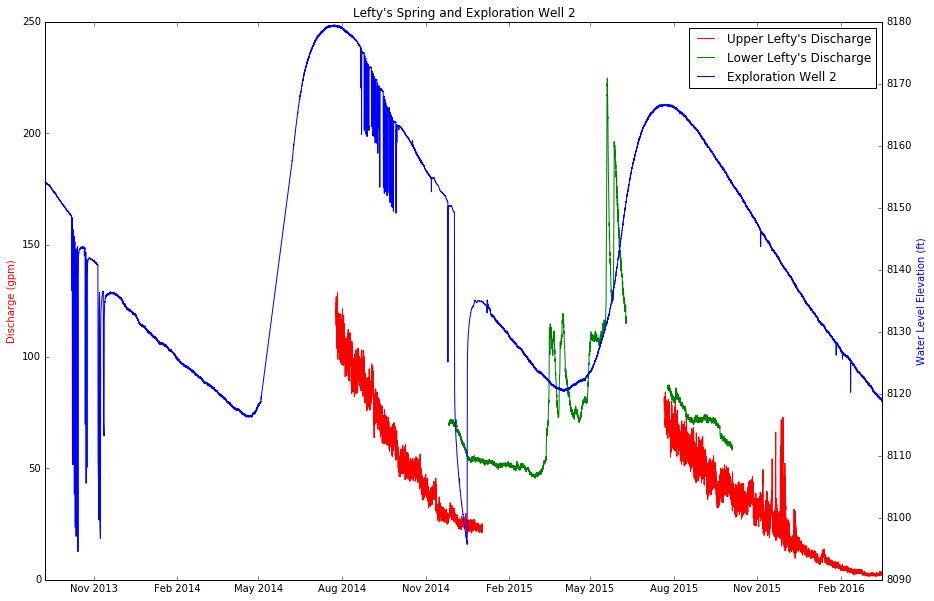

In [236]:
ULsub = All[All.index > pd.datetime(2014,1,1)]
x = All.index
x1 = All[All.index > pd.datetime(2014,1,1,1,1)].index
y1 = All[All.index > pd.datetime(2014,1,1,1,1)]["UL_LW_Q_gpm"]
y2 = All.LL_JF_Q_gpm
y3 = All.EXW_wl_elev_ft


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('Lefty\'s Spring and Exploration Well 2')
ax1.plot(x1,y1,c='r',label='Upper Lefty\'s Discharge')
ax1.plot(x,y2,c='g',label='Lower Lefty\'s Discharge')
ax1.set_ylabel('Discharge (gpm)', color='r') 
ax2.set_ylabel('Water Level Elevation (ft)', color='b') 
ax2.plot(x, y3, c='b',label='Exploration Well 2')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#ax1.set_xlim('8/23/2014',All.index.to_datetime()[-1])
ax1.legend(h1+h2, l1+l2, loc=0)

#plt.show()
#plt.savefig(rootlocal+"HiddenLakeWeir2.pdf")
plt.savefig(figout+"springs and well.svg")
plt.savefig(figout+"springs and well.pdf")

In [237]:
LowLeftysAnalys = pd.merge(EXW2, LowLeftys, left_index=True, right_index=True, how='inner')

In [238]:
LowLeftysAnalys.columns

Index([u'EXW_dtw_ft', u'EXW_wl_elev_ft', u'LL_LW_t_C', u'LL_JF_t_C',
       u'LL_LW_Q_gpm', u'LL_JF_Q_gpm', u'LL_JF_Q_cfs', u'LL_LW_Q_cfs',
       u'LL_LW_Q_lpm', u'LL_JF_Q_lpm'],
      dtype='object')

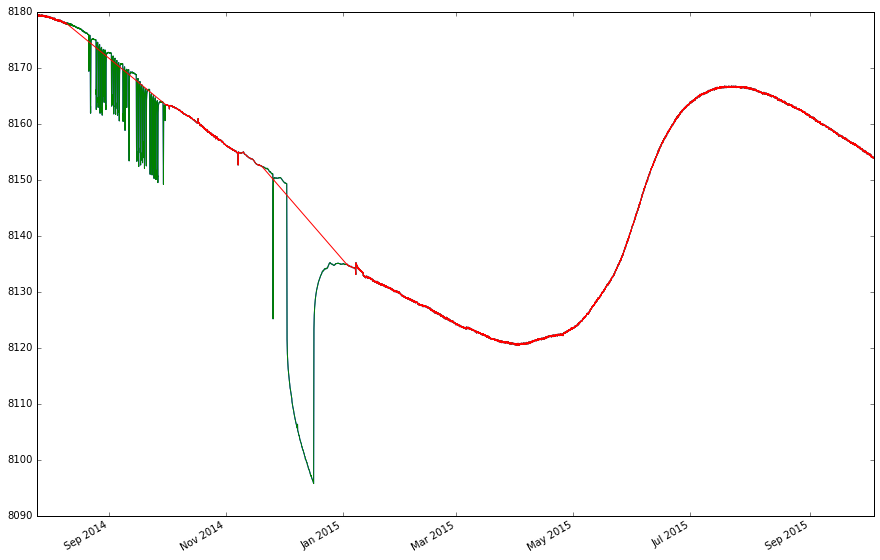

In [239]:
LowLeftysAnalys['EXW_wl_elev_ft'].plot() #  1.09167792e-05   3.52015191e+00]
#LowLeftAnalys['mod_gpm'] = (1.09167792e-05)*(LeftAnalys['EXW_wl_elev_ft'] - 8082.0)**3.52015191e+00
LFilt = LowLeftysAnalys[(LowLeftysAnalys.index > pd.datetime(2013,11,20))]
LFilt.EXW_wl_elev_ft.plot()
LFilt = LFilt[(LFilt.index < pd.datetime(2014,8,10)) | (LFilt.index > pd.datetime(2014,10,1))]
LFilt = LFilt[(LFilt.index < pd.datetime(2014,11,20)) | (LFilt.index > pd.datetime(2015,1,3))]
#LFilt = LFilt[(LFilt.index < pd.datetime(2014,4,20)) | (LFilt.index > pd.datetime(2014,7,27))]
#LFilt = LFilt[(LFilt.index < pd.datetime(2015,3,25)) | (LFilt.index > pd.datetime(2015,7,27))]
LFilt.EXW_wl_elev_ft.plot()

45.609165829
[  7.60526722e+01   1.05433735e-02]
[[  1.00628524e+02  -2.95926604e-01]
 [ -2.95926604e-01   8.71705089e-04]]


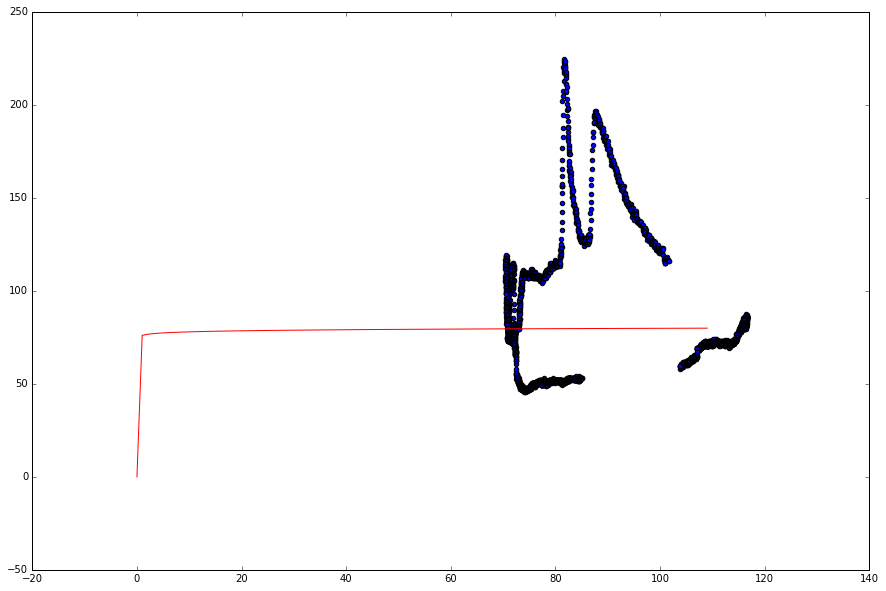

In [240]:
LFilt['EXW_wl_abv_sp_ft'] = (LFilt['EXW_wl_elev_ft'] - 8050.0)
LFilt.dropna(subset=['EXW_wl_abv_sp_ft','LL_JF_Q_gpm'], inplace=True)

x2 = LFilt['EXW_wl_abv_sp_ft']
y2 = LFilt['LL_JF_Q_gpm']
plt.scatter(x2,y2)

print(LFilt['LL_JF_Q_gpm'].min())

from scipy.optimize import curve_fit
def func(x, a, c):
    return a*x**c
popt2, pcov2 = curve_fit(func, x2, y2, p0=(0.1, 1e-1))#, bounds = [0,40000], method='trf')
print(popt2)
print(pcov2)
x1 = np.arange(0,110,1.0)
plt.plot(x1,[popt2[0]*i**popt2[1] for i in x1], color='red')

# Analysis

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()


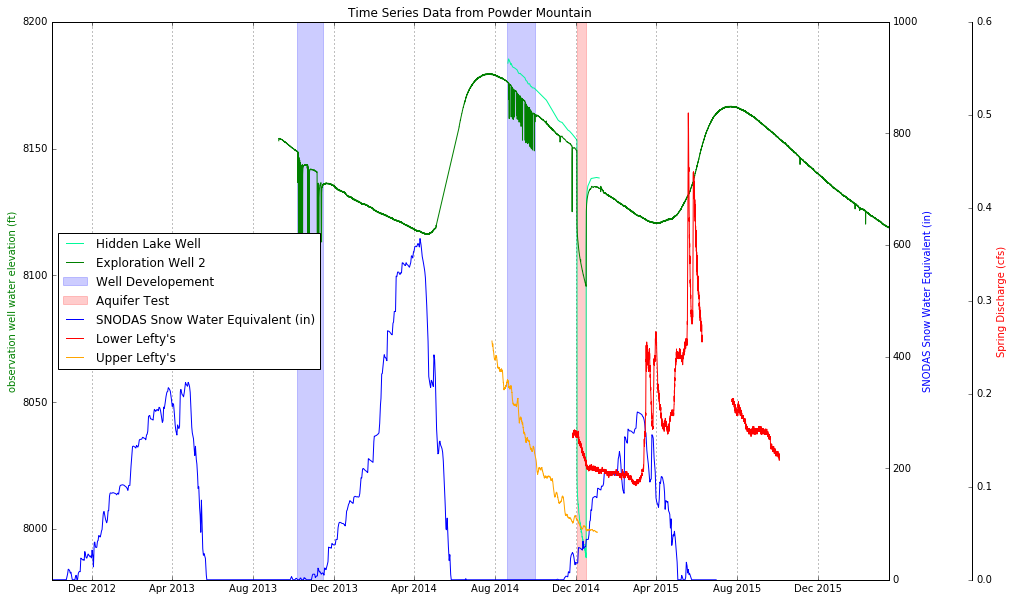

In [241]:
rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')
EXWM['EXWM_wl_elev'] = 8901 - EXWM['EXWM_h_ft']

x1 = EXWM.index.to_datetime()
y1 = EXWM['EXWM_wl_elev']

x2 = SNODAS.index.to_datetime()
y2 = SNODAS.LeftysCreek

fig, ax1 = plt.subplots()

x5 = HLWM.index.to_datetime()
y5 = HLWM['HLWM_wl_elev']

x6 = EXWall.index.to_datetime()
y6 = EXWall['EXW_wl_elev_ft']


ax1.plot(x5,y5, color='mediumspringgreen', label = 'Hidden Lake Well')
ax1.plot(x6, y6, color='green', label='Exploration Well 2')
#ax1.scatter(x1,y1, c='green', label = 'manual measurement')
ax1.set_ylabel('observation well water elevation (ft)', color='green')

ax1.set_ylim(7980,8200)
ax1.grid(which='both',axis='x')
ax1.fill_between([pd.datetime(2014,8,20),pd.datetime(2014,10,1)],[8200,8200],[7980,7980], color='blue', alpha=0.2,label='Well Developement')
ax1.fill_between([pd.datetime(2013,10,7),pd.datetime(2013,11,14)],[8200,8200],[7980,7980], color='blue', alpha=0.2)

ax1.fill_between([pd.datetime(2014,12,2,18),pd.datetime(2014,12,16,18)],[8200,8200],[7980,7980], color='red', alpha=0.2,label='Aquifer Test')

ax2 = ax1.twinx()
ax2.plot(x2, y2, label = 'SNODAS Snow Water Equivalent (in)')
ax2.set_ylabel('SNODAS Snow Water Equivalent (in)', color='blue')
ax2.set_ylim(0,1000)

y3 = pd.rolling_mean(LowLeftys.LL_JF_Q_cfs, 1)
x3 = y3.index.to_datetime()
y4 = pd.rolling_mean(Leftys.UL_LW_Q_cfs, 200)
x4 = y4.index.to_datetime()

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(x3, y3, color='red', label='Lower Lefty\'s')
ax3.plot(x4, y4, color='orange', label='Upper Lefty\'s')
ax3.set_ylabel('Spring Discharge (cfs)', color='red')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2+h3, l1+l2+l3, loc=6, scatterpoints=1)
plt.title('Time Series Data from Powder Mountain')
#frame.set_alpha(0)

#plt.xlim(datetime(2013,11,1),datetime(2015,6,15))
#plt.savefig("C:\\Users\\PAULINKENBRANDT\\Google Drive\\WORK\\Powder Mountain\\Exp_Well_2_Long_Term_Hydrograph.pdf")
plt.savefig(figout + 'All_Long_Term_Hydrograph.pdf')

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()


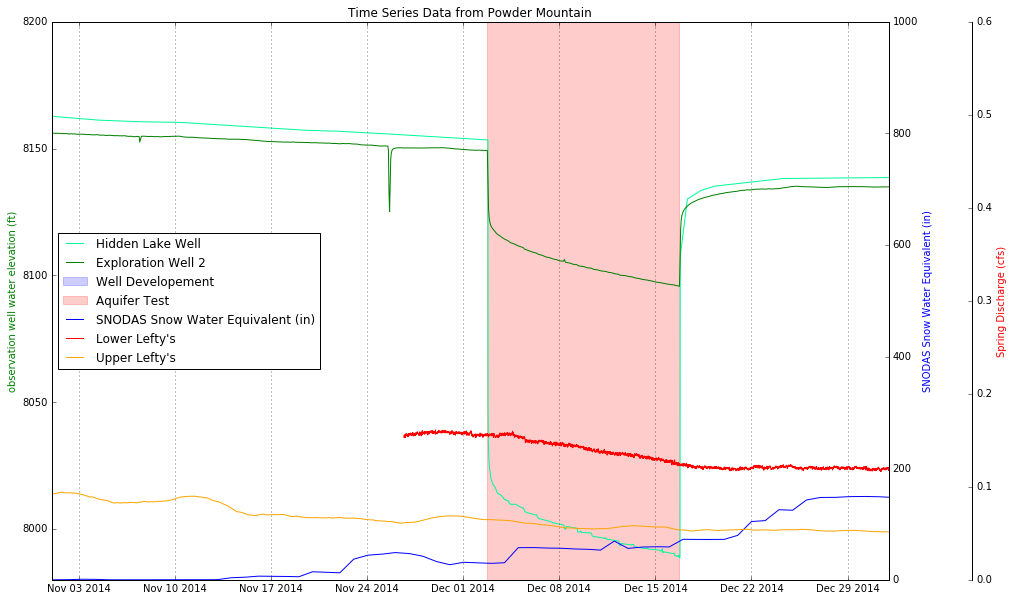

In [242]:
EXWM['EXWM_wl_elev'] = 8901 - EXWM['EXWM_h_ft']

x1 = EXWM.index.to_datetime()
y1 = EXWM['EXWM_wl_elev']

x2 = SNODAS.index.to_datetime()
y2 = SNODAS.LeftysCreek

fig, ax1 = plt.subplots()

x5 = HLWM.index.to_datetime()
y5 = HLWM['HLWM_wl_elev']

x6 = EXWall.index.to_datetime()
y6 = EXWall['EXW_wl_elev_ft']


ax1.plot(x5,y5, color='mediumspringgreen', label = 'Hidden Lake Well')
ax1.plot(x6, y6, color='green', label='Exploration Well 2')
#ax1.scatter(x1,y1, c='green', label = 'manual measurement')
ax1.set_ylabel('observation well water elevation (ft)', color='green')

ax1.set_ylim(7980,8200)
ax1.grid(which='both',axis='x')
ax1.fill_between([pd.datetime(2014,8,20),pd.datetime(2014,9,5)],[8200,8200],[7980,7980], color='blue', alpha=0.2,label='Well Developement')
ax1.fill_between([pd.datetime(2013,10,7),pd.datetime(2013,11,14)],[8200,8200],[7980,7980], color='blue', alpha=0.2)

ax1.fill_between([pd.datetime(2014,12,2,18),pd.datetime(2014,12,16,18)],[8200,8200],[7980,7980], color='red', alpha=0.2,label='Aquifer Test')

ax2 = ax1.twinx()
ax2.plot(x2, y2, label = 'SNODAS Snow Water Equivalent (in)')
ax2.set_ylabel('SNODAS Snow Water Equivalent (in)', color='blue')
ax2.set_ylim(0,1000)

y3 = pd.rolling_mean(LowLeftys.LL_JF_Q_cfs, 1)
x3 = y3.index.to_datetime()
y4 = pd.rolling_mean(Leftys.UL_LW_Q_cfs, 200)
x4 = y4.index.to_datetime()

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(x3, y3, color='red', label='Lower Lefty\'s')
ax3.plot(x4, y4, color='orange', label='Upper Lefty\'s')
ax3.set_ylabel('Spring Discharge (cfs)', color='red')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2+h3, l1+l2+l3, loc=6, scatterpoints=1)
plt.title('Time Series Data from Powder Mountain')
#frame.set_alpha(0)

plt.xlim(datetime(2014,11,1),datetime(2015,1,1))
#plt.savefig("C:\\Users\\PAULINKENBRANDT\\Google Drive\\WORK\\Powder Mountain\\Exp_Well_2_Long_Term_Hydrograph.pdf")
plt.savefig(rootlocal + 'Exp_Well_2_Long_Term_Hydrograph.pdf')

In [243]:
All['julian'] = All.index.to_julian_date()

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()


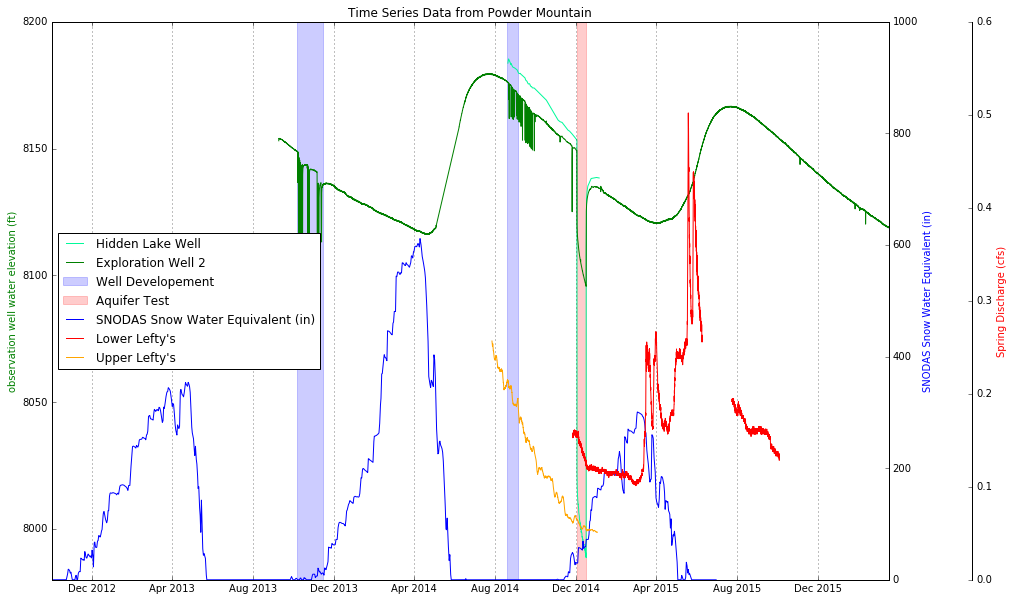

In [244]:
EXWM['EXWM_wl_elev'] = 8901 - EXWM['EXWM_h_ft']

x1 = EXWM.index.to_datetime()
y1 = EXWM['EXWM_wl_elev']

x2 = SNODAS.index.to_datetime()
y2 = SNODAS.LeftysCreek

fig, ax1 = plt.subplots()

x5 = HLWM.index.to_datetime()
y5 = HLWM['HLWM_wl_elev']

x6 = EXWall.index.to_datetime()
y6 = EXWall['EXW_wl_elev_ft']


ax1.plot(x5,y5, color='mediumspringgreen', label = 'Hidden Lake Well')
ax1.plot(x6, y6, color='green', label='Exploration Well 2')
#ax1.scatter(x1,y1, c='green', label = 'manual measurement')
ax1.set_ylabel('observation well water elevation (ft)', color='green')

ax1.set_ylim(7980,8200)
ax1.grid(which='both',axis='x')
ax1.fill_between([pd.datetime(2014,8,20),pd.datetime(2014,9,5)],[8200,8200],[7980,7980], color='blue', alpha=0.2,label='Well Developement')
ax1.fill_between([pd.datetime(2013,10,7),pd.datetime(2013,11,14)],[8200,8200],[7980,7980], color='blue', alpha=0.2)

ax1.fill_between([pd.datetime(2014,12,2,18),pd.datetime(2014,12,16,18)],[8200,8200],[7980,7980], color='red', alpha=0.2,label='Aquifer Test')

ax2 = ax1.twinx()
ax2.plot(x2, y2, label = 'SNODAS Snow Water Equivalent (in)')
ax2.set_ylabel('SNODAS Snow Water Equivalent (in)', color='blue')
ax2.set_ylim(0,1000)

y3 = pd.rolling_mean(LowLeftys.LL_JF_Q_cfs, 1)
x3 = y3.index.to_datetime()
y4 = pd.rolling_mean(Leftys.UL_LW_Q_cfs, 200)
x4 = y4.index.to_datetime()

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
ax3.plot(x3, y3, color='red', label='Lower Lefty\'s')
ax3.plot(x4, y4, color='orange', label='Upper Lefty\'s')
ax3.set_ylabel('Spring Discharge (cfs)', color='red')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(h1+h2+h3, l1+l2+l3, loc=6, scatterpoints=1)
plt.title('Time Series Data from Powder Mountain')
#frame.set_alpha(0)

#plt.xlim(datetime(2013,11,1),datetime(2015,6,15))
#plt.savefig("C:\\Users\\PAULINKENBRANDT\\Google Drive\\WORK\\Powder Mountain\\Exp_Well_2_Long_Term_Hydrograph.pdf")

plt.savefig(rootlocal + 'Exp_Well_2_Long_Term_Hydrograph.pdf')

In [246]:
All['doy'] = (All.index.dayofyear)

In [247]:
def scatterReg(x,y,w,dif=0,shft=0):
    import matplotlib as mpl
    import matplotlib.cm as cm
    cmap = plt.cm.get_cmap('RdYlBu')
    
    
    if dif == 1:
        x=x.diff()[1:]
        y=y.diff()[1:]
    else:
        pass
    if shft > 0:
        x =x.diff()[shft:-1*shft]
        y =y.diff().shift(shft)[shft:-1*shft]
    minin = w.min()
    maxin = w.max()
    norm = mpl.colors.Normalize(vmin=minin, vmax=maxin)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    sc = plt.scatter(x, y, label='', color = m.to_rgba(w))
    #plt.colorbar(sc)
    fit= np.polyfit(x,y,1,full=True)
    r2 = 1 - fit[1] / (y.size * y.var())
    z = np.poly1d(fit[0])
    plt.plot(x, z(x),color='red', label='m =' + str(round(fit[0][0],2)) + ' '+r'$ r^2 =$' +str(round(r2[0],2)))
    plt.legend()
    print fit
    

c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\paulinkenbrandt\documents\github\env\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

(array([ 1.42961639, -0.05338001]), array([ 0.03801071]), 2, array([ 1.4140323 ,  0.02264202]), 2.5512925105886097e-13)
(array([ 1.7167748 , -0.02385544]), array([ 0.23417085]), 2, array([ 1.41274781,  0.06437096]), 1.5965007094109751e-13)
(array([ 0.05558994,  0.07054543]), array([ 0.00440447]), 2, array([ 1.41198489,  0.07936419]), 1.9095836023552692e-13)
(array([ 4.47120675, -0.04609906]), array([ 0.34160418]), 2, array([ 1.41344148,  0.04672467]), 1.5965007094109751e-13)


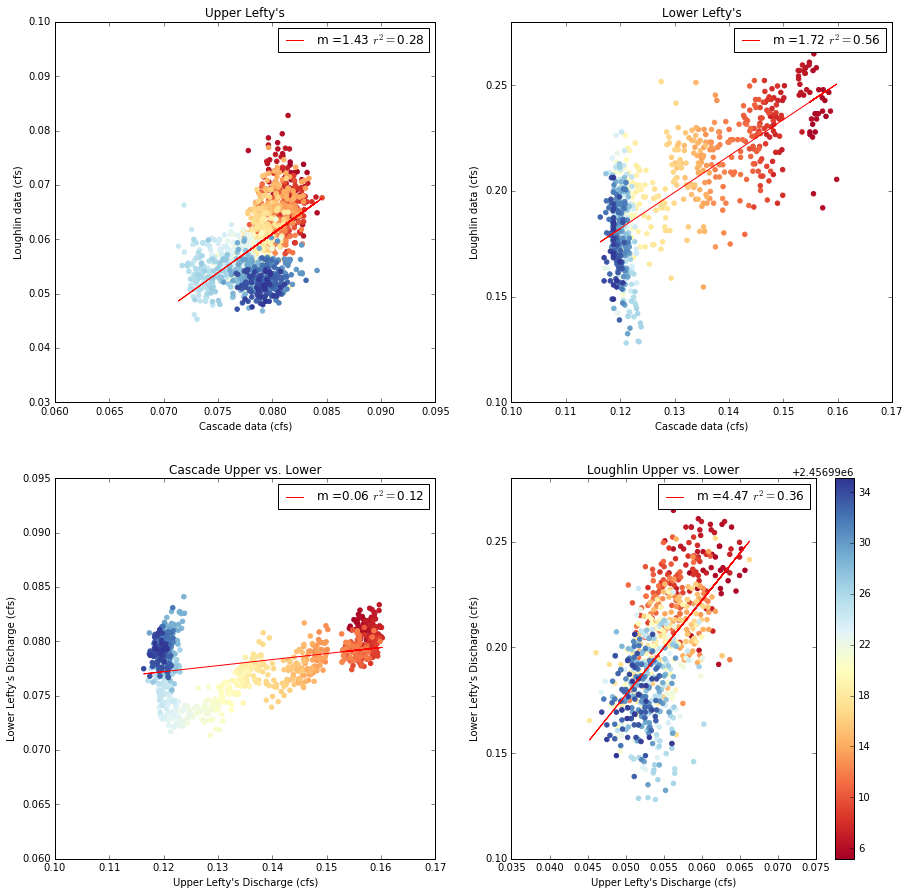

In [248]:
df1 = All.dropna(subset=['UL_JF_Q_cfs','UL_LW_Q_cfs'])
df2 = All.dropna(subset=['LL_JF_Q_cfs','LL_LW_Q_cfs'])
df3 = All.dropna(subset=['UL_JF_Q_cfs','LL_JF_Q_cfs'])
df4 = All.dropna(subset=['UL_LW_Q_cfs','LL_LW_Q_cfs'])

df1['dateindex'] = (df1.julian-df1.julian.min()+0.000001)/(df1.julian.max()-df1.julian.min())
df2['dateindex'] = (df2.julian-df2.julian.min()+0.000001)/(df2.julian.max()-df2.julian.min())
df3['dateindex'] = (df3.julian-df3.julian.min()+0.000001)/(df3.julian.max()-df3.julian.min())
df4['dateindex'] = (df4.julian-df4.julian.min()+0.000001)/(df4.julian.max()-df4.julian.min())

plt.figure(figsize=[15,15])

plt.subplot(221)
x = df1.UL_JF_Q_cfs
y = df1.UL_LW_Q_cfs
w = df1.julian
plt.title('Upper Lefty\'s')
plt.xlabel('Cascade data (cfs)')
plt.ylabel('Loughlin data (cfs)')
scatterReg(x,y,w,0)

plt.subplot(222)
x = df2.LL_JF_Q_cfs
y = df2.LL_LW_Q_cfs
w = df2.julian
plt.title('Lower Lefty\'s')
plt.xlabel('Cascade data (cfs)')
plt.ylabel('Loughlin data (cfs)')
scatterReg(x,y,w,0)

plt.subplot(223)
x = df3.LL_JF_Q_cfs
y = df3.UL_JF_Q_cfs
w = df3.julian
plt.title('Cascade Upper vs. Lower')
plt.xlabel('Upper Lefty\'s Discharge (cfs)')
plt.ylabel('Lower Lefty\'s Discharge (cfs)')
scatterReg(x,y,w,0)

plt.subplot(224)
x = df4.UL_LW_Q_cfs
y = df4.LL_LW_Q_cfs
w = df4.julian
plt.title('Loughlin Upper vs. Lower')
plt.xlabel('Upper Lefty\'s Discharge (cfs)')
plt.ylabel('Lower Lefty\'s Discharge (cfs)')
scatterReg(x,y,w,0)


import matplotlib as mpl
import matplotlib.cm as cm
cmap = plt.cm.get_cmap('RdYlBu')
minin = w.min()
maxin = w.max()
norm = mpl.colors.Normalize(vmin=minin, vmax=maxin)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(w)
plt.colorbar(m)

plt.savefig(rootlocal+"scatterPlots.pdf")

623
623
                            OLS Regression Results                            
Dep. Variable:         EXW_wl_elev_ft   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.691e+05
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:52:30   Log-Likelihood:                 840.51
No. Observations:                 623   AIC:                            -1677.
Df Residuals:                     621   BIC:                            -1668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         5.1e+05    825.919    617.446 

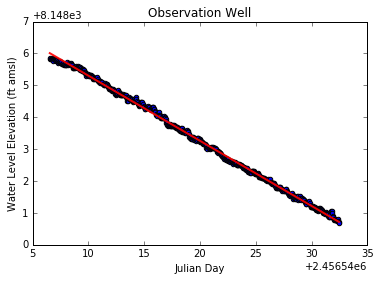

In [251]:
EXWsamp = EXWall[(EXWall.index.to_datetime() > pd.datetime(2013,9,11))&(EXWall.index.to_datetime() < pd.datetime(2013,10,7))]
x0 = EXWsamp.index.to_julian_date()
y = EXWsamp['EXW_wl_elev_ft']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Observation Well')
plt.ylabel('Water Level Elevation (ft amsl)')
plt.xlabel('Julian Day')

3623
3623
                            OLS Regression Results                            
Dep. Variable:         EXW_wl_elev_ft   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.928e+05
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:52:35   Log-Likelihood:                -1595.7
No. Observations:                3623   AIC:                             3195.
Df Residuals:                    3621   BIC:                             3208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.408e+05    352.132    967.95

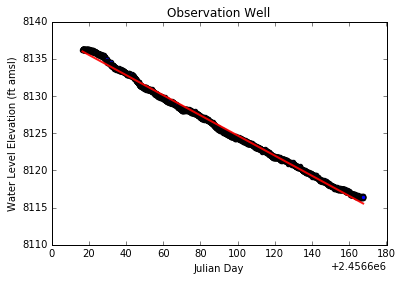

In [252]:
EXWsamp = EXWall[(EXWall.index.to_datetime() > pd.datetime(2013,11,20))&(EXWall.index.to_datetime() < pd.datetime(2014,4,20))]
x0 = EXWsamp.index.to_julian_date()
y = EXWsamp['EXW_wl_elev_ft']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Observation Well')
plt.ylabel('Water Level Elevation (ft amsl)')
plt.xlabel('Julian Day')

383
383
                            OLS Regression Results                            
Dep. Variable:         EXW_wl_elev_ft   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.014e+04
Date:                Wed, 15 Jun 2016   Prob (F-statistic):               0.00
Time:                        07:52:39   Log-Likelihood:                 431.50
No. Observations:                 383   AIC:                            -859.0
Df Residuals:                     381   BIC:                            -851.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.123e+05   2142.874    145.724 

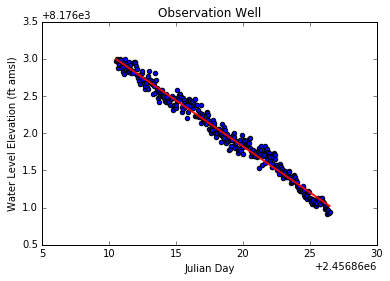

In [253]:
EXWsamp = EXWall[(EXWall.index.to_datetime() > pd.datetime(2014,8,1))&(EXWall.index.to_datetime() < pd.datetime(2014,8,17))]
x0 = EXWsamp.index.to_julian_date()
y = EXWsamp['EXW_wl_elev_ft']
x = sm.add_constant(x0)
print len(x0)
print len(y)

plt.figure()
plt.scatter(x0,y)

est = sm.OLS(y, x)
est = est.fit()
print est.summary()

x_prime = np.linspace(x0.min(),x0.max(),100)[:, np.newaxis]
x_prime = sm.add_constant(x_prime)
y_hat = est.predict(x_prime)

plt.plot(x_prime[:, 1], y_hat, c='red', alpha=0.9, zorder = 3, linewidth=2.0, label='OLS fit')

plt.title('Observation Well')
plt.ylabel('Water Level Elevation (ft amsl)')
plt.xlabel('Julian Day')

In [254]:
EXWall = EXWall.resample('1Min').mean()
EXWall = EXWall.interpolate(method='time', limit=90)
EXWall = EXWall.resample('5Min').mean()

In [264]:
EXW15 = EXWall.resample('15Min').mean()
All=pd.merge(All, EXW15, left_index=True, right_index=True, how='outer')

In [256]:
#list(All.columns.values)

In [259]:
All.to_csv(OUT)

In [269]:
Res = All.resample('1D').mean()
Res.to_csv(rootlocal+"abbrevdata2.csv")

In [ ]:
All.columns

In [265]:
stations = [u'UL_JF_Q_gpm', u'UL_LW_Q_gpm', u'LL_LW_Q_gpm', u'LL_JF_Q_gpm', u'HL_LW_Q_gpm', u'HL_JF_Q_gpm', 
            u'NB_US_Q_gpm', u'NB_LW_Q_gpm', u'HLW_wl_elev_ft', u'EXW_wl_elev_ft']

(                count         mean         std          min  25%  50%  75%  \
 EXW_wl_elev_ft  890.0  8141.925884   18.996542  8096.970571  NaN  NaN  NaN   
 HLW_wl_elev_ft   65.0  8113.990705   61.761171  7991.207457  NaN  NaN  NaN   
 HL_JF_Q_gpm     134.0    93.661979   19.920636    60.246818  NaN  NaN  NaN   
 HL_LW_Q_gpm      60.0    81.538287   15.438199    55.457467  NaN  NaN  NaN   
 LL_JF_Q_gpm     269.0    77.018298   30.292080    46.603688  NaN  NaN  NaN   
 LL_LW_Q_gpm      31.0    89.072746   10.469701    67.695835  NaN  NaN  NaN   
 NB_LW_Q_gpm      60.0   546.492216  181.205666   397.124883  NaN  NaN  NaN   
 NB_US_Q_gpm      17.0   489.076579   36.329228   411.100399  NaN  NaN  NaN   
 UL_JF_Q_gpm      49.0    35.381219    1.064333    32.782117  NaN  NaN  NaN   
 UL_LW_Q_gpm     468.0    37.155528   29.247631   -43.689639  NaN  NaN  NaN   
 
                         max   fin_date start_date  
 EXW_wl_elev_ft  8179.329408 2016-03-17 2013-09-08  
 HLW_wl_elev_ft  8173.5

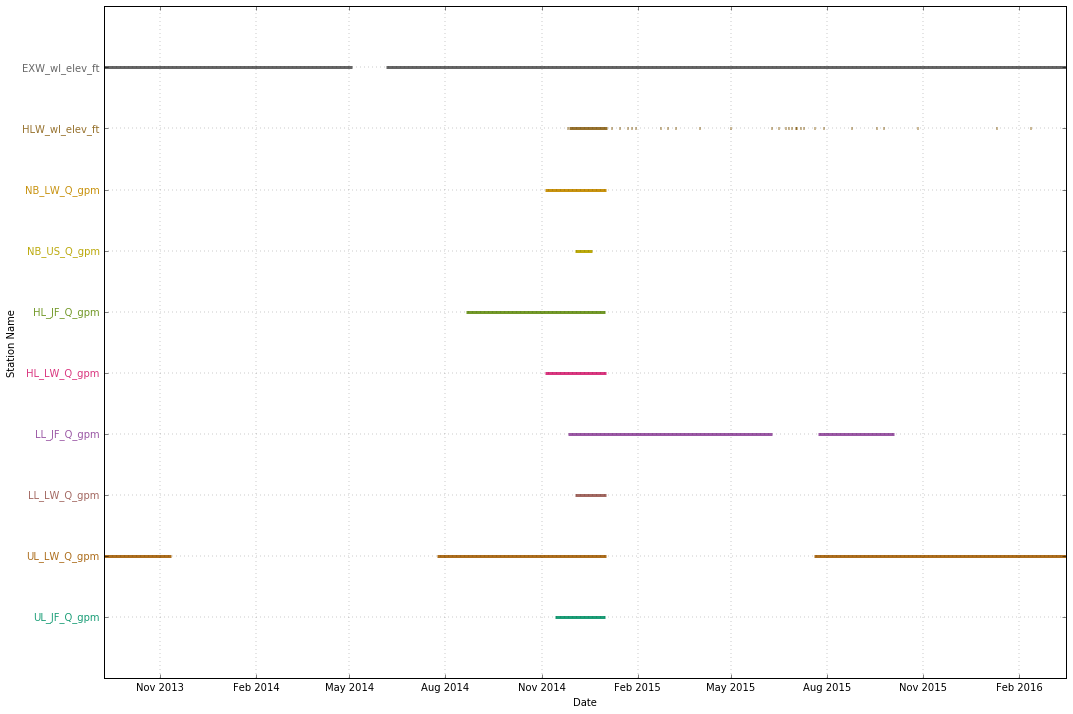

In [270]:
rcParams['figure.figsize'] = 15, 10
plt.rc('svg', fonttype = 'svgfont')
wa.gantt(Res, stations)

### Aquifer Test Hydrographs

Import barometric pressure data. The path to the input file can be found in the [data sources](#Data-Sources) section.<a id=exbp></a>

In [ ]:
UL_BP = pd.read_csv(Upper_Leftys_Barometer_Loughlin, usecols=[0,1],
                    index_col=0, skiprows=52, skipfooter=1, parse_dates=True, names=['dt','UL_BP_p_cm'], 
                    engine='python')
UL_BP['UL_BP_ft'] = UL_BP['UL_BP_p_cm']/2.54/12
UL_BP = UL_BP.drop(['UL_BP_p_cm'],axis=1)
UL_BP = UL_BP.resample('1Min', how='mean')
UL_BP = UL_BP.interpolate(method='time', limit=90)
UL_BP = UL_BP.resample('5Min', how='mean')

Create a dataframe for aquifer test analysis and hydrograph veiwing.

In [ ]:
try:
    del Wells
except (NameError):
    pass
Wells = pd.merge(HLW,EXW, left_index=True, right_index=True, how='outer')
Wells = Wells.drop(['EXW_p_psi','EXW_p_ft','HLW_h_ft'],axis=1)
Wells = pd.merge(Wells,UL_BP, left_index=True, right_index=True, how='left')
list(Wells.columns.values)

In [ ]:
x = Wells.index.to_datetime()
y2 = Wells['UL_BP_ft']
y1 = Wells['EXW_wl_elev_ft']

plt.figure()

fig, ax1 = plt.subplots()
plt.title('Aquifer Test Antecedant Trends')
ax2 = ax1.twinx()
ax1.plot(x,y1,c='g',label='Well Water Level (ft amsl)')
ax1.set_xlim(left='11/7/2014',right='11/24/2014')
ax1.yaxis.get_major_formatter().set_powerlimits((-10, 10))
ax1.set_ylim(8152,8158)
#ax2.set_ylim(0,18)
ax1.set_ylabel('Well Water Level (ft amsl)', color='g') 
ax2.set_ylabel('Barometric Pressure (ft)', color='b') 
ax2.plot(x,y2,c='b',label='Barometric Pressure (ft)')
plt.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [ ]:
# Slope from OLS of antecedent trends
correction_factor = 0.30

Wells = Wells[Wells.index.to_datetime() >= pd.datetime(2014,12,2,18,55)]

Wells['pumping_day'] = Wells.index.to_julian_date() - Wells.index.to_julian_date()[0]
Wells['pumping_min'] = (Wells['pumping_day']*24*60).round(2)
Wells['HLW_corr_elev_ft'] = Wells['HLW_wl_elev_ft'] + Wells['pumping_day']*correction_factor
Wells['EXW_corr_elev_ft'] = Wells['EXW_wl_elev_ft'] + Wells['pumping_day']*correction_factor
Wells['HLW_S_ft'] = (Wells['HLW_corr_elev_ft'][0] - Wells['HLW_corr_elev_ft']).round(2)
Wells['EXW_S_ft'] = (Wells['EXW_corr_elev_ft'][0] - Wells['EXW_corr_elev_ft']).round(2)
Wells['HLW_Q_gpm'] = Wells['HLW_Q_gpm'].round(0)
Wells['HLW_Q_gpm'] = Wells['HLW_Q_gpm'].fillna(0)

Wells = Wells.drop(['HLW_wl_elev_ft', 'EXW_wl_elev_ft', 'pumping_day', 'UL_BP_ft', 'HLW_corr_elev_ft', 'EXW_corr_elev_ft'], axis=1)
list(Wells.columns.values)

In [ ]:
x = Wells['pumping_min'] 
y1 = Wells['HLW_S_ft']
y2 = Wells['EXW_S_ft']
y3 = Wells['HLW_Q_gpm']

plt.figure()

fig, ax1 = plt.subplots()
plt.title('Aquifer Test')
ax2 = ax1.twinx()
ax1.plot(x,y1,c='g',label='Pumping Well')
ax1.plot(x,y2,c='r',label='Observation Well')
#ax1.yaxis.get_major_formatter().set_powerlimits((-10, 10))
#ax2.set_ylim(0,18)
ax1.set_ylabel('Drawdown (ft)') 
ax2.set_ylabel('Pumping Rate (gpm)', color='b') 
ax2.plot(x,y3,c='b',label='Pumping Rate')
plt.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

In [ ]:
Wells1 = Wells[Wells.index.to_datetime() < pd.datetime(2014,12,4,12)]
Wells2 = Wells[(Wells.index.to_datetime() > pd.datetime(2014,12,4,12)) & (Wells.index.to_datetime() < pd.datetime(2014,12,15,12))]
Wells3 = Wells[(Wells.index.to_datetime() > pd.datetime(2014,12,15,12)) & (Wells.index.to_datetime() < pd.datetime(2014,12,18,12))]
Wells4 = Wells[(Wells.index.to_datetime() > pd.datetime(2014,12,18,12))].resample('30Min', how='mean')

WellsShort = Wells1
WellsShort = pd.concat([WellsShort, Wells2.resample('30Min', how='mean')])
WellsShort = pd.concat([WellsShort, Wells3])
WellsShort = pd.concat([WellsShort, Wells4])

In [ ]:
Wells = Wells.set_index(keys=['pumping_min'])
WellsShort = WellsShort.set_index(keys=['pumping_min']) 
#['HLW_Q_gpm', 'EXW_t_C', 'UL_BP_ft', 'pumping_min', 'HLW_S_ft', 'EXW_S_ft']

In [ ]:
writer = pd.ExcelWriter(rootlocal + 'AquiferTest.xlsx', engine='xlsxwriter')
Wells.to_excel(writer,'Complete_Data')
WellsShort.to_excel(writer,'Shortened_Data')
writer.save()

## Analysis

### North Boundary Weir Analysis

In [ ]:
All['USU_SF_AD_h_ft'].plot()

In [ ]:
try:
    del df
except (NameError):
    pass
df = All[(All.index.to_datetime() < pd.datetime(2014,12,29,20,0))&(All.index.to_datetime() > pd.datetime(2014,11,12,13,30))]

In [ ]:
df['USU_Avon_BP_ft'] = 0.04460334762*df.loc[:,'USU_Avon_BP_mmHg']
df['HLW_Q_cfs'] = 0.00222800926*df.loc[:,'HLW_Q_gpm']
df['USU_SF_PPT_ft'] = df.loc[:,'USU_SF_PPT_in']/12

df['USU_Avon_std_BP_ft'] = (df.loc[:,'USU_Avon_BP_ft'] - df.loc[:,'USU_Avon_BP_ft'].mean()) / df.loc[:,'USU_Avon_BP_ft'].std()
df['HLW_std_Q_cfs'] = (df.loc[:,'HLW_Q_cfs'] - df.loc[:,'HLW_Q_cfs'].mean()) / df.loc[:,'HLW_Q_cfs'].std()
df['EXW_std_wl_elev_ft'] = (df.loc[:,'EXW_wl_elev_ft'] - df.loc[:,'EXW_wl_elev_ft'].mean()) / df.loc[:,'EXW_wl_elev_ft'].std()
df['USU_SF_AD_std_h_ft'] = (df.loc[:,'USU_SF_AD_h_ft'] - df.loc[:,'USU_SF_AD_h_ft'].mean()) / df.loc[:,'USU_SF_AD_h_ft'].std()
df['NB_LW_std_Q_cfs'] = (df.loc[:,'NB_LW_Q_cfs'] - df.loc[:,'NB_LW_Q_cfs'].mean()) / df.loc[:,'NB_LW_Q_cfs'].std()
df['HL_BP_LW_std_t_C'] = (df.loc[:,'HL_BP_LW_t_C'] - df.loc[:,'HL_BP_LW_t_C'].mean()) / df.loc[:,'HL_BP_LW_t_C'].std()


In [ ]:
df1 = df[(df.index.to_datetime() < pd.datetime(2014,12,29,20,0))&(df.index.to_datetime() > pd.datetime(2014,12,1,0))]
x0 = df1.index.to_julian_date()
x = [(x0[i]-x0[0])*24*60 for i in range(len(x0))]
y1 = df1['USU_Avon_std_BP_ft'] 
y2 = df1['HLW_std_Q_cfs']
y3 = df1['EXW_std_wl_elev_ft']
y4 = df1['USU_SF_AD_std_h_ft'] 
y5 = df1['NB_LW_std_Q_cfs']
y6 = (df1['HL_JF_Q_cfs']-df1['HL_JF_Q_cfs'].mean())/df1['HL_JF_Q_cfs'].std()
y7 = (df1['LL_JF_Q_cfs']-df1['LL_JF_Q_cfs'].mean())/df1['LL_JF_Q_cfs'].std()
y8 = df1['USU_SF_PPT_ft']

In [ ]:
y3a = y3.diff()
y4a = y4.diff()
y7a = y7.diff()
plt.figure()
plt.scatter(y3a,y7a)

plt.figure()
# Three subplots sharing both x/y axes
f, ax1 = plt.subplots(1, sharex=True, sharey=True)
ax1.plot(x, y3a, label='Observation Well Water Elevation (ft amsl)')
ax1.plot(x,y4a,label='Little Bear River Gage Height (ft)')
ax1.plot(x,y7a, label='Lower Lefty\'s')
#ax1.set_xscale('log')

ax1.set_ylabel('Z')
ax1.set_title('Semilog Graph of Normalized Pumping and Weir Discharge')
ax1a = ax1.twinx()
ax1a.plot(x,y8, color='black', label='Precipitation (ft)')
ax1a.set_ylabel('feet')
ax1a.set_ylim(bottom=0,top=1)
h1, l1 = ax1.get_legend_handles_labels()
h1a, l1a = ax1a.get_legend_handles_labels()
ax1.legend(h1+h1a, l1+l1a, loc=2)

In [ ]:
df1 = df[(df.index.to_datetime() < pd.datetime(2014,12,29,20,0))&(df.index.to_datetime() > pd.datetime(2014,12,1,0))]
x0 = df1.index.to_julian_date()
x = [(x0[i]-x0[0])*24*60 for i in range(len(x0))]
y1 = df1['USU_Avon_std_BP_ft'] 
y2 = df1['HLW_std_Q_cfs']
y3 = df1['EXW_std_wl_elev_ft']
y4 = df1['USU_SF_AD_std_h_ft'] 
y5 = df1['NB_LW_std_Q_cfs']
y6 = (df1['HL_JF_Q_cfs']-df1['HL_JF_Q_cfs'].mean())/df1['HL_JF_Q_cfs'].std()
y7 = (df1['LL_JF_Q_cfs']-df1['LL_JF_Q_cfs'].mean())/df1['LL_JF_Q_cfs'].std()
y8 = df1['USU_SF_PPT_ft']

plt.figure()
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.plot(x, y3, label='Observation Well Water Elevation (ft amsl)')
ax1.plot(x,y4,label='Little Bear River Gage Height (ft)')
ax1.set_xscale('log')
ax1.set_ylabel('Z')
ax1.set_title('Semilog Graph of Normalized Pumping and Weir Discharge')
ax1a = ax1.twinx()
ax1a.plot(x,y8, color='black', label='Precipitation (ft)')
ax1a.set_ylabel('feet')
ax1a.set_ylim(bottom=0,top=1)
h1, l1 = ax1.get_legend_handles_labels()
h1a, l1a = ax1a.get_legend_handles_labels()
ax1.legend(h1+h1a, l1+l1a, loc=2)

ax2.plot(x,y3)
ax2.plot(x,y5,label='North Boundary Weir Discharge (cfs)',color='red')
ax2.set_xscale('log')
ax2.set_ylabel('Z')
ax2.legend(loc=2)
ax2a = ax2.twinx()
ax2a.plot(x,y8, color='black')
ax2a.set_ylabel('feet')
ax2a.set_ylim(bottom=0,top=1)
ax2.legend(loc=2)

ax3.plot(x,y3)
ax3.plot(x,y6,label='Hidden Lake Weir Discharge (cfs)',color='purple')
ax3.set_xscale('log')
ax3.set_ylabel('Z')
ax3.legend(loc=2)
ax3a = ax3.twinx()
ax3a.plot(x,y8, color='black')
ax3a.set_ylim(bottom=0,top=1)
ax3a.set_ylabel('feet')

ax4.plot(x,y3)
ax4.plot(x,y7, label='Lower Lefty\'s Weir Discharge (cfs)',color='orange')
ax4.set_xscale('log')
ax4.set_ylabel('Z')
ax4.legend(loc=2)
ax4a = ax4.twinx()
ax4a.plot(x,y8, color='black')
ax4a.set_ylim(bottom=0,top=1)
ax3a.set_ylabel('feet')

plt.xlabel('Time (min)')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.tight_layout()
plt.savefig(rootlocal+'Semilog_All.pdf')

In [ ]:
x0 = df.index.to_julian_date()
x = [(x0[i]-x0[0])*24*60 for i in range(len(x0))]
y3 = df['EXW_std_wl_elev_ft']#.diff()
y4 = df['USU_SF_AD_std_h_ft']#.diff() 
y5 = df['NB_LW_std_Q_cfs']#.diff()

correls = pd.rolling_corr(y4,y3,  500)
covar = pd.rolling_cov(y4,y3,  500)


plt.figure()

fig, ax1 = plt.subplots()
plt.title('Aquifer Test')
ax2 = ax1.twinx()
ax1.plot(x,correls,c='g',label='Correlation')
ax1.plot(x,covar,c='r',label='Covariance')
#ax1.yaxis.get_major_formatter().set_powerlimits((-10, 10))
#ax2.set_ylim(0,18)
ax1.set_ylabel('r squared') 
ax2.set_ylabel('standard deviations', color='b') 
ax2.plot(x,y3,c='b',label='Obs Well WL')
ax2.plot(x,y4,c='black',label='Little Bear River')
plt.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

correls = pd.rolling_corr(y5,y3,  500)
covar = pd.rolling_cov(y5,y3,  500)

plt.figure()

fig, ax1 = plt.subplots()
plt.title('Aquifer Test')
ax2 = ax1.twinx()
ax1.plot(x,correls,c='g',label='Correlation')
ax1.plot(x,covar,c='r',label='Covariance')
#ax1.yaxis.get_major_formatter().set_powerlimits((-10, 10))
#ax2.set_ylim(0,18)
ax1.set_ylabel('r squared') 
ax2.set_ylabel('standard deviations', color='b') 
ax2.plot(x,y3,c='b',label='Obs Well WL')
ax2.plot(x,y5,c='black',label='North Boundary Discharge')
plt.grid()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1)

plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
df['HL_BP_LW_dt_C'] = df['HL_BP_LW_t_C'].diff()
df['NB_LW_dQ_cfs'] = df['NB_LW_Q_cfs'].diff()
df['PPT_CDM'] = (df['USU_SF_PPT_in'] - df['USU_SF_PPT_in'].mean()).cumsum()
df['jday'] = df.index.to_julian_date()

In [ ]:
df1 = df[(df.index.to_datetime() < pd.datetime(2014,12,29,20,0))&(df.index.to_datetime() > pd.datetime(2014,12,2,18,45))]

From <a href=http://www.datarobot.com/blog/multiple-regression-using-statsmodels/>Data Robot</a> 

In [ ]:
x0 = df1['jday']
time = [(x0[i]-x0[0])*24*60 for i in range(len(x0))]
#BP = df1['USU_Avon_BP_ft'] 
lil_bear = df1['USU_SF_AD_std_h_ft']
#PPT_CDM = df1['PPT_CDM']
temp = df1['HL_BP_LW_std_t_C'].get_values()
#SWE = df1['WTEQ.I-1 (in) ']
Q = df1['NB_LW_std_Q_cfs']

plt.figure()
plt.scatter(temp, Q, alpha=0.3)
plt.ylabel('North Boundary Discharge')
plt.xlabel('Temperature')

est = smf.ols(formula='Q ~ time + lil_bear + temp', data=df1).fit()

xp = pd.DataFrame({'temp': np.linspace(temp.min(), temp.max(), 100)})

poly3 = smf.ols(formula='Q ~ 1 + temp + I(temp ** 2.0) + I(temp ** 3.0)', data=df1).fit()
plt.plot(xp.temp,poly3.predict(xp), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly3.rsquared)
plt.legend()

print est.summary()

In [ ]:
(df1['NB_LW_std_Q_cfs']-est.resid).plot()

In [ ]:
poly3.resid.plot()

### Hidden Lake Weir Analysis

In [ ]:
try:
    del df
except (NameError):
    pass
df = All[(All.index.to_datetime() < pd.datetime(2014,12,25))&(All.index.to_datetime() > pd.datetime(2014,10,12))]
dflist = ['HL_JF_Q_cfs','USU_SF_BD_h_ft','USU_SF_AD_h_ft','HL_JF_t_C','EXW_wl_elev_ft','HLW_wl_elev_ft','USU_SF_PPT_in']
for i in list(df.columns.values):
    if i not in dflist:
        df = df.drop(i,axis=1)

In [ ]:
df['PPT_CDM'] = (df['USU_SF_PPT_in'] - df['USU_SF_PPT_in'].mean()).cumsum()
df['jday'] = df.index.to_julian_date()

In [ ]:
from pandas.tools.plotting import scatter_matrix

In [ ]:
list(df.columns.values)

In [ ]:
df1 = df.drop(['USU_SF_PPT_in','EXW_wl_elev_ft','USU_SF_BD_h_ft'],axis=1)

plt.figure()
scatter_matrix(df1, alpha=0.2, diagonal='hist')
plt.savefig(rootlocal+'Reg_Matrix.pdf')

In [ ]:
df1['dUSU_SF_AD_h_ft'] = df1['USU_SF_AD_h_ft'].diff()
df1['dHL_JF_t_C'] = df1['HL_JF_t_C'].diff()
df1['dHL_JF_Q_cfs'] = df1['HL_JF_Q_cfs'].diff()
df1['dHLW_wl_elev_ft'] = df1['HLW_wl_elev_ft'].diff()
df1['dPPT_CDM'] = df1['PPT_CDM'].diff()

df1['nUSU_SF_AD_h_ft'] = (df1['USU_SF_AD_h_ft']-df1['USU_SF_AD_h_ft'].mean())/df1['USU_SF_AD_h_ft'].std()
df1['nHL_JF_t_C'] = (df1['HL_JF_t_C']-df1['HL_JF_t_C'].mean())/df1['HL_JF_t_C'].std()
df1['nHL_JF_Q_cfs'] = (df1['HL_JF_Q_cfs']-df1['HL_JF_Q_cfs'].mean())/df1['HL_JF_Q_cfs'].std()
df1['nHLW_wl_elev_ft'] = (df1['HLW_wl_elev_ft']-df1['HLW_wl_elev_ft'].mean())/df1['HLW_wl_elev_ft'].std()
df1['nPPT_CDM'] = (df1['PPT_CDM']-df1['PPT_CDM'].mean())/df1['PPT_CDM'].std()


In [ ]:
df2 = df1.drop(['nUSU_SF_AD_h_ft','nHL_JF_t_C','nHL_JF_Q_cfs','nHLW_wl_elev_ft','nPPT_CDM',
                'USU_SF_AD_h_ft','USU_SF_AD_h_ft','HL_JF_Q_cfs','HLW_wl_elev_ft','PPT_CDM','HL_JF_t_C'],axis=1)
df3 = df1.drop(['dUSU_SF_AD_h_ft','dHL_JF_t_C','dHL_JF_Q_cfs','dHLW_wl_elev_ft','dPPT_CDM',
                'USU_SF_AD_h_ft','USU_SF_AD_h_ft','HL_JF_Q_cfs','HLW_wl_elev_ft','PPT_CDM','HL_JF_t_C'],axis=1)

In [ ]:
flow = df['HL_JF_Q_cfs']#.diff()
time = df['jday']
lil_bear = df['USU_SF_AD_h_ft']#.diff()
temp = df['HL_JF_t_C']#.diff()
precip = df['USU_SF_PPT_in']
pump_well = df['HLW_wl_elev_ft']
ppt_cdm = df['PPT_CDM']#.diff()


est = smf.ols(formula='flow ~ ppt_cdm + lil_bear + temp', data=df).fit()
print est.summary()

In [ ]:
df['resid']=est.resid
df['modeled']=df['HL_JF_Q_cfs']-df['resid']

In [ ]:
y0 = df['HL_JF_Q_cfs']
x0 = df['jday']
x1 = df['USU_SF_AD_h_ft']
x2 = df['HL_JF_t_C']
x3 = df['HLW_wl_elev_ft']
x4 = df['USU_SF_PPT_in']
x5 = df['PPT_CDM']
x6 = df['modeled']
x7 = df['resid']


df[['HL_JF_Q_cfs','modeled','USU_SF_PPT_in','resid','HLW_wl_elev_ft']].plot(subplots=True)

In [ ]:
df.to_csv(rootlocal+'hidden_lake_out.csv')

In [ ]:
plt.figure()

x0 = df.index.to_datetime()
x1 = df['USU_SF_AD_h_ft']
x2 = df['HL_JF_t_C']
x3 = df['HLW_wl_elev_ft']
x4 = df['USU_SF_PPT_in']
x5 = df['PPT_CDM']
x6 = df['modeled']
x7 = df['resid']
y0 = df['HL_JF_Q_cfs']

fig, ax1 = plt.subplots()
plt.title('Hidden Lake Weir')
ax2 = ax1.twinx()
ax1.plot(x0,y0,c='b',label='Hidden Lake Weir Flow')
ax1.plot(x0,x6,c='g',label='Modeled Weir Flow')
ax1.plot(x0,x7,c='black',label='Residual Weir Flow')
#ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Discharge (cfs)', color='r') 
ax2.set_ylabel('Pumping Water Elevation (ft)', color='b') 
ax2.plot(x0,x3,c='r',label='Pumping Well Water Elevation')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=6)
plt.savefig(rootlocal + '/HL_Model.pdf')
plt.show()


In [ ]:
x0 = df.index.to_datetime().values
y0 = df['HL_JF_Q_cfs'].values
start_day = x0[0]
last_day = x0[-1]
date_diff = (df['jday'][-1]-df['jday'][0])
num_samps = len(x0)
interval = ((df['jday'][-1]-df['jday'][0])/len(x0))
print start_day
print last_day
print date_diff
print num_samps
print interval

### Lefty's Spring Analysis

[To Top](#top)

In [ ]:
try:
    del df
except (NameError):
    pass
df = All[(All.index.to_datetime() < pd.datetime(2015,1,1))&(All.index.to_datetime() > pd.datetime(2014,11,27))]


In [ ]:
dflist = ['LL_LW_Q_cfs','UL_LW_Q_cfs', 'UL_JF_t_C','WTEQ.I-1 (in) ', 'USU_SF_AD_h_ft',
          'HLW_wl_elev_ft', 'USU_SF_PPT_in',
          'UL_JF_Q_cfs','EXW_wl_elev_ft','LL_JF_Q_cfs', 'LL_JF_t_C',
          'UL_BP_LW_p_ft']
for i in list(df.columns.values):
    if i not in dflist:
        df = df.drop(i,axis=1)

In [ ]:
df.columns

In [ ]:
df['dT'] = df['LL_JF_t_C'].diff()
df['dJFulQ'] = df['UL_JF_Q_cfs'].diff()
df['dJFllQ'] = df['LL_JF_Q_cfs'].diff()
df['dLWulQ'] = df['UL_LW_Q_cfs'].diff()
df['dLWllQ'] = df['LL_LW_Q_cfs'].diff()
df[u'dSNO'] = df[u'WTEQ.I-1 (in) '].diff() 
df['dWL'] = df['EXW_wl_elev_ft'].diff()
df['PPT_CDM'] = (df['USU_SF_PPT_in'] - df['USU_SF_PPT_in'].mean()).cumsum()
df['jday'] = df.index.to_julian_date()    


In [ ]:
df = df.resample('1H')
df = df.interpolate()

In [ ]:
df[['UL_JF_Q_cfs', u'LL_LW_Q_cfs', u'UL_LW_Q_cfs',u'LL_JF_Q_cfs']].plot()

In [ ]:
df[['dJFulQ', 'dJFllQ', 'dLWulQ', 'dLWllQ']].plot()

http://conference.scipy.org/proceedings/scipy2011/pdfs/statsmodels.pdf

In [ ]:
df1= df[(df.index.to_datetime() < pd.datetime(2015,1,1))&(df.index.to_datetime() > pd.datetime(2014,12,4))]

In [ ]:
mdata = df1[['dJFllQ', 'dT', 'dSNO', 'dWL', 'PPT_CDM']]
model = sm.tsa.VAR(mdata)

In [ ]:
res = model.fit(2)
res.summary()

In [ ]:
res.plot_sample_acorr()


In [ ]:
irf = res.irf(10) # 10 periods
irf.plot()

In [ ]:
res.test_causality('dJFllQ','dT')

In [ ]:
res.test_causality('dJFllQ','dWL')

In [ ]:
from scipy import signal

In [ ]:
corr = signal.correlate(df.dllQ,df.dWL, mode='same')
corr1 = signal.correlate(df.dllQ,df.dT, mode='same')
corr2 = signal.correlate(df.dllQ,df.dulQ, mode='same')
#corr2 = signal.correlate(df.dUL_JF_Q_cfs, df.dSNO, mode='full')

In [ ]:
fig, (ax_orig, ax_upstream, ax_noise, ax_corr, ax_corr1, ax_corr2) = plt.subplots(6, 1, sharex=True)
#plt.figure()

df['ind'] = range(0,len(df))
ax_orig.plot(df.ind, df.dllQ)
ax_orig.set_title('Original signal')
ax_upstream.plot(df.ind, df.dulQ)
ax_upstream.set_title('Upstream signal')
ax_noise.plot(df.ind, df.dT)
ax_noise.set_title('Temp signal')
#df.dWL.plot()
#df.dQ.plot()
#plt.figure()
#plt.plot(df.dEXW_wl_elev_ft)
ax_corr.plot(corr1)
ax_corr.set_title('')
ax_corr1.plot(corr)
ax_corr2.plot(corr2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv("M:/PROJECTS/POWMOW/LowerLeftys.csv")
df1.to_csv("M:/PROJECTS/POWMOW/SmallLeftys.csv")

In [ ]:
strt = df1.index[0]
lst = df1.index[-1]

In [ ]:
%%R -i strt, lst ulspring -o QTS
library(chron)
library(MASS)
y0<-ulspring
strt <-as.Date("07/28/2014 08:00:00", format='%m/%d/%Y %H:%M:%S');
lst <-as.Date("12/24/2014 16:45:00", format='%m/%d/%Y %H:%M:%S');
yser <- ts(y0, start=strt, end=lst, frequency=48)

QTS<- decompose(yser)
plot(QTS)
#y1<-boxcox(y0)
#qqnorm(y1)
#abline(0,1)

In [ ]:
import statsmodels.formula.api as smf
flow = df['LL_JF_Q_cfs']
time = df['jday']
lil_bear = df['USU_SF_AD_h_ft']
temp = df['LL_JF_t_C']
pump_well = df['HLW_wl_elev_ft']
ppt_cdm = df['PPT_CDM']
swe = df['WTEQ.I-1 (in) ']
obs_well = df['EXW_wl_elev_ft']

print("\nOLS with Climate Only")
est = smf.ols(formula='flow ~ swe + temp + lil_bear', data=df).fit()
print est.summary()

print("\n\nOLS with OBS Well")
est2 = smf.ols(formula='flow ~ swe + temp + lil_bear + obs_well', data=df).fit()
print est2.summary()


In [ ]:
plt.figure()

df['resid_nonpump']=est.resid
df['modeled']=df['LL_JF_Q_cfs']-df['resid_nonpump']
df['resid_nonpump'].plot()

df['resid_pump']=est2.resid
df['modeled']=df['LL_JF_Q_cfs']-df['resid_pump']
df['resid_pump'].plot()

x0 = df.index.to_datetime()
x1 = df['USU_SF_AD_h_ft']
x2 = df['LL_JF_t_C']
x3 = df['HLW_wl_elev_ft']
x4 = df['USU_SF_PPT_in']
x5 = df['PPT_CDM']
x6 = df['modeled']
x7 = df['resid_nonpump']
x8 = df['resid_pump']
y0 = df['LL_JF_Q_cfs']

fig, ax1 = plt.subplots()
plt.title('Lefty\'s Weir')
ax2 = ax1.twinx()
ax1.plot(x0,y0,c='b',label='Lefty\'s Weir Flow')
ax1.plot(x0,x6,c='g',label='Modeled Weir Flow')
ax1.plot(x0,x7,c='black',label='Residual Weir Flow No pumping')
ax1.plot(x0,x8,c='purple',label='Residual Weir Flow pumping')

#ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Discharge (cfs)', color='r') 
ax2.set_ylabel('Pumping Water Elevation (ft)', color='b') 
ax2.plot(x0,x3,c='r',label='Pumping Well Water Elevation')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=7)

plt.show()

In [ ]:
df.columns

In [ ]:
df1= df[(df.index.to_datetime() < pd.datetime(2015,1,1))&(df.index.to_datetime() > pd.datetime(2014,12,4))]

flow = df['LL_JF_Q_cfs']#.diff()
time = df['jday']
lil_bear = df['USU_SF_AD_h_ft']#.diff()
temp = df['LL_JF_t_C']#.diff()
pump_well = df['HLW_wl_elev_ft']#.diff()
ppt_cdm = df['PPT_CDM']#.diff()
swe = df['WTEQ.I-1 (in) ']#.diff()
obs_well = df['EXW_wl_elev_ft']#.diff()

df1 = df[['LL_JF_Q_cfs','LL_JF_t_C','PPT_CDM','EXW_wl_elev_ft']].diff()

#data = np.log(df1).diff().dropna()

# make a VAR model
model = sm.tsa.VAR(df1)

results = model.fit(2)

df1['modeled'] = df1['LL_JF_Q_cfs'][2:] - results.resid['LL_JF_Q_cfs']

df1[['modeled','LL_JF_Q_cfs']].plot()

In [ ]:
results.plot()

In [ ]:
model.select_order(15)

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
results.test_causality('LL_JF_Q_cfs',['LL_JF_t_C','PPT_CDM','EXW_wl_elev_ft'], kind='f')

In [ ]:
flow = df['LL_JF_Q_cfs']
time = df['jday']
lil_bear = df['USU_SF_AD_h_ft']
temp = df['LL_JF_t_C']
pump_well = df['HLW_wl_elev_ft']
ppt_cdm = df['PPT_CDM']
swe = df['WTEQ.I-1 (in) ']
obs_well = df['EXW_wl_elev_ft']

est1 = smf.ols(formula='flow ~ temp + lil_bear + ppt_cdm + obs_well', data=df).fit()
print est1.summary()



#xp = pd.DataFrame({'pump_well': np.linspace(pump_well.min(), pump_well.max(), 100), 
#                  'lil_bear': np.linspace(lil_bear.min(), lil_bear.max(), 100),
#                  'time':np.linspace(time.min(), time.max(), 100)})

#poly3 = smf.ols(formula='flow ~ 1 + temp + lil_bear + ppt_cdm', data=df).fit()
#plt.plot(xp.time,est.predict(xp), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % est.rsquared)
#plt.scatter(time,flow)
#plt.legend()

In [ ]:
plt.figure()

x0 = df.index.to_datetime()
x1 = df['USU_SF_AD_h_ft']
x2 = df['LL_JF_t_C']
x3 = df['HLW_wl_elev_ft']
x4 = df['USU_SF_PPT_in']
x5 = df['PPT_CDM']
x6 = df['modeled']
x7 = df['resid']
y0 = df['LL_JF_Q_cfs']

fig, ax1 = plt.subplots()
plt.title('Lefty\'s Weir')
ax2 = ax1.twinx()
ax1.plot(x0,y0,c='b',label='Lefty\'s Weir Flow')
ax1.plot(x0,x6,c='g',label='Modeled Weir Flow')
ax1.plot(x0,x7,c='black',label='Residual Weir Flow')
#ax1.set_xlim(left='11/30/2014',right=x1[-1])
ax1.set_ylabel('Discharge (cfs)', color='r') 
ax2.set_ylabel('Pumping Water Elevation (ft)', color='b') 
ax2.plot(x0,x3,c='r',label='Pumping Well Water Elevation')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=7)

plt.show()

In [ ]:
df['resid']=est.resid
df['modeled']=df['LL_JF_Q_cfs']-df['resid']
df['resid'].plot()


In [ ]:
flow = df['LL_JF_Q_cfs']
time = df['jday']
lil_bear = df['USU_SF_AD_h_ft']
temp = df['UL_JF_t_C']
pump_well = df['HLW_wl_elev_ft']
ppt_cdm = df['PPT_CDM']
swe = df['WTEQ.I-1 (in) ']

df1 = df
dflist = ['LL_JF_Q_cfs','jday','USU_SF_AD_h_ft','HLW_wl_elev_ft','PPT_CDM','WTEQ.I-1 (in) ','HLW_wl_elev_ft']
for i in list(df.columns.values):
    if i not in dflist:
        df1 = df1.drop(i,axis=1)

scatter_matrix(df1, alpha=0.2, diagonal='hist')

In [ ]:
y0 = df['LL_JF_Q_cfs']
x0 = df['jday']
x1 = df['USU_SF_AD_h_ft']
x2 = df['UL_JF_t_C']
x3 = df['HLW_wl_elev_ft']
x4 = df['USU_SF_PPT_in']
x5 = df['PPT_CDM']
x6 = df['modeled']
x7 = df['resid']


df[['LL_JF_Q_cfs','USU_SF_AD_h_ft','USU_SF_PPT_in','PPT_CDM','HLW_wl_elev_ft']].plot(subplots=True)

In [ ]:

x0 = df['jday']
x = [(x0[i]-x0[0])*24*60 for i in range(len(x0))]

df['LL_JF_std_Q_cfs'] = (df['LL_JF_Q_cfs']-df['LL_JF_Q_cfs'].mean())/df['LL_JF_Q_cfs'].std()
df['EXW_std_wl_elev_ft'] = (df['EXW_wl_elev_ft']-df['EXW_wl_elev_ft'].mean())/df['EXW_wl_elev_ft'].std()

y5 = df['LL_JF_std_Q_cfs']
y3 = df['EXW_std_wl_elev_ft']

plt.figure()
#plt.plot(x,y1,label='USU_Avon_std_BP_ft')
#plt.plot(x,y2,label='HLW_std_Q_cfs')
plt.plot(x,y3,label='Observation Well Elevation (ft amsl)')
plt.plot(x,y5,label='Lower Lefty\'s Weir Discharge (cfs)')
plt.title('Comparison of Standardized Variables in relation to Lower Lefty\'s Weir')
plt.xlabel('Standard Deviations')
plt.ylabel('minutes of pumping')
plt.grid()
plt.ylim(-4,6)
plt.legend(loc=2)
plt.xscale('log')
plt.savefig('M:\\POWMOW\\Figures\\Semilog_Leftys_and_Obs_Well.pdf')


print df[['EXW_std_wl_elev_ft','LL_JF_std_Q_cfs']].corr(method='spearman')
print df[['EXW_std_wl_elev_ft','LL_JF_std_Q_cfs']].corr(method='kendall')
print df[['EXW_std_wl_elev_ft','LL_JF_std_Q_cfs']].corr(method='pearson')


### Upper Lefty's Spring Analysis

In [ ]:
list(All.columns.values)

In [ ]:
try:
    del df
except (NameError):
    pass
df = All[(All.index.to_datetime() < pd.datetime(2015,1,1))&(All.index.to_datetime() > pd.datetime(2014,11,27,12))]

In [ ]:
well = df['HLW_wl_elev_ft'].diff().values
obswell = df['EXW_wl_elev_ft'].diff().values
pump = df['HLW_Q_gpm'].diff().values
llstream = df['LL_JF_Q_cfs'].diff().values
ulstream = df['UL_JF_Q_cfs'].diff().values

In [ ]:
df[['EXW_wl_elev_ft','LL_JF_Q_cfs']].plot()

In [ ]:
plt.xcorr(obswell[1:],llstream[1:],maxlags=40)
plt.grid()

In [ ]:
from IPython.display import display

In [ ]:
%load_ext rpy2.ipython 
%R require(ggplot2)

<a href=http://www.r-bloggers.com/chicken-or-the-egg-granger-causality-for-the-masses/>From r-bloggers</a>

In [ ]:
%R -i well,llstream library(MSBVAR); df <- data.frame(well,llstream); print(granger.test(df, 1))

In [ ]:
%R -i well,pump library(MSBVAR); df <- data.frame(well,pump); print(granger.test(df, 1))

In [ ]:
%R -i obswell,pump library(MSBVAR); df <- data.frame(obswell,pump); print(granger.test(df, 1))

In [ ]:
%R -i well,ulstream library(MSBVAR); df <- data.frame(well,ulstream); print(granger.test(df, 1))

In [ ]:
print ulstream

In [ ]:
print obswell


In [ ]:
well


In [ ]:
%R -i obswell,llstream library(lmtest); print(grangertest(llstream~obswell,order=12,na.action = na.omit))

In [ ]:
for i in list(All.columns.values):
    print i
    print All[i].count()

In [ ]:
try:
    del dfa
except (NameError):
    pass
dfa = All[(All.index.to_datetime() < pd.datetime(2014,12,2))&(All.index.to_datetime() > pd.datetime(2014,7,28))]

ulspring = dfa['UL_LW_Q_cfs'].diff().values[100:-100]
ppt = dfa['USU_PPT_CDM'].diff().values[100:-100]
time = dfa.index.to_datetime()
spngstd = (dfa['UL_LW_Q_cfs']-dfa['UL_LW_Q_cfs'].mean())/dfa['UL_LW_Q_cfs'].std()
pptstd = (dfa['USU_PPT_CDM']-dfa['USU_PPT_CDM'].mean())/dfa['USU_PPT_CDM'].std()
plt.xcorr(ulspring,ppt,maxlags=50)
plt.figure()
plt.plot(time,spngstd)
plt.plot(time, pptstd)

In [ ]:
%%R -i ulspring -o QTS
library(chron)
library(MASS)
y0<-ulspring
strt <-as.Date("07/28/2014 08:00:00", format='%m/%d/%Y %H:%M:%S');
lst <-as.Date("12/24/2014 16:45:00", format='%m/%d/%Y %H:%M:%S');
yser <- ts(y0, start=strt, end=lst, frequency=48)

QTS<- decompose(yser)
plot(QTS)
#y1<-boxcox(y0)
#qqnorm(y1)
#abline(0,1)


In [ ]:
try:
    del df
except (NameError):
    pass
df = All[(All.index.to_datetime() < pd.datetime(2014,12,30))&(All.index.to_datetime() > pd.datetime(2014,11,4,15,15))]

In [ ]:
print df['NB_LW_Q_cfs']

In [ ]:
plt.figure(figsize=(16, 10))

df['NBMax'] = pd.rolling_max(df['NB_LW_Q_cfs'],4*24*4,center=True)
dg = df[df['NB_LW_Q_cfs']==df['NBMax']]
df['NBStd'] = pd.rolling_std(df['NB_LW_Q_cfs'],4*24*4,center=True)+ pd.rolling_mean(df['NB_LW_Q_cfs'],4*24*4,center=True)
df['TrdNBStd'] = pd.rolling_std(df['NB_LW_Q_cfs'],4*24,center=True)+ pd.rolling_mean(df['NB_LW_Q_cfs'],4*24*4,center=True)
df['NBMean'] = pd.rolling_mean(df['NB_LW_Q_cfs'],4*24*4,center=True)
df['NBMax'].plot()
df['NBStd'].plot()
df['NBMean'].plot()
df['NB_LW_Q_cfs'].plot()
df['TrdNBStd'].plot()

#dg.to_csv("E:\\POWMOW\\burp_time.csv")

In [ ]:
plt.figure(figsize=(16, 10))

df['SmoothNB'] = df['NB_LW_Q_cfs'][df['NB_LW_Q_cfs']<df['NBStd']]

df['SmoothNB'] = df['SmoothNB'].interpolate(method='time', limit=30) 
df['SmoothNBMean'] = pd.rolling_mean(df['SmoothNB'],window=4*24*3,center=True)
df['SmoothNBStd'] = pd.rolling_std(df['SmoothNB'],window=4*24*3,center=True)+df['SmoothNBMean']

df['time'] = df.index.to_julian_date()
df['time_change'] = df['time'].diff()
df['Vol_Out']= (df['NB_LW_Q_cfs']-df['SmoothNBStd'])*646316.883*df['time_change']
df['Vol_Out'] = df['Vol_Out'][df['Vol_Out']>750]
df['Tot_Vol'] = pd.rolling_sum(df['Vol_Out'].fillna(0),window=4*24*3,center=True)
#df['SmoothNB'].plot()
df['Tot_Vol'].plot()
(df['NB_LW_Q_cfs']*10000).plot()
dg = df[df['NB_LW_Q_cfs']==df['NBMax']]
dg.to_csv("E:\\POWMOW\\Volumes1.csv")
#df.to_csv("E:\\POWMOW\\Volumes2.csv")

## VAR Model

In [ ]:
from statsmodels.graphics.api import qqplot

In [ ]:
try:
    del df
except (NameError):
    pass
#df = All[(All.index.to_datetime() < pd.datetime(2014,12,29))&(All.index.to_datetime() > pd.datetime(2014,10,5))]
df= All[(All.index.to_datetime() < pd.datetime(2015,1,1))&(All.index.to_datetime() > pd.datetime(2014,12,4))]

In [ ]:
dflist = ['LL_LW_Q_cfs','EXW_wl_elev_ft',
 'USU_PPT_CDM',
 'USU_SF_AD_h_ft',
 'WTEQ.I-1 (in) ',
 'UL_BP_LW_t_C']
for i in list(df.columns.values):
    if i not in dflist:
        df = df.drop(i,axis=1)
df.head(n=5)

In [ ]:
mdata = df.diff()#.drop(['UL_BP_LW_p_ft','USU_SF_PPT_in','UL_JF_t_C','USU_Avon_BP_mmHg','UL_JF_Q_cfs','HLW_wl_elev_ft','UL_BP_LW_t_C'],axis=1)
names = mdata.columns.values.tolist()
data = mdata.dropna()
model = sm.tsa.VAR(data)
res = model.fit(2)

In [ ]:
res.summary()

In [ ]:
res.plot()

In [ ]:
res.plot_acorr(20)

In [ ]:
model.select_order(15)

In [ ]:
results = model.fit(maxlags=15, ic='bic')

In [ ]:
results.summary()

In [ ]:
irf = res.irf(15)

In [ ]:
irf.plot(orth=False, impulse='WTEQ.I-1 (in) ')

In [ ]:
irf.plot(orth=False, impulse='LL_JF_t_C')

In [ ]:
irf.plot(orth=False, impulse='EXW_wl_elev_ft')

In [ ]:
irf.plot_cum_effects(orth=False, impulse='WTEQ.I-1 (in) ')

In [ ]:
irf.plot_cum_effects(orth=False, impulse='EXW_wl_elev_ft')

In [ ]:
res.test_causality('LL_JF_Q_cfs', ['EXW_wl_elev_ft'], kind='f')

## DynamicVAR

In [ ]:
var = sm.tsa.DynamicVAR(data, lag_order=2, window_type='expanding')

In [ ]:
var.coefs.major_xs(datetime(2014, 11, 30)).T